<header>
    <h1>
    <div style="color:white;
           display:fill;
           border-radius:4px;
           background-color:cornflowerblue;
           font-size:120%;
           padding: 10px;">
    <center>
        <header style= "font-family: Lucida Calligraphy;
                        font-size: 40px;">Heart Disease Prediction</header>
    </center>
    </div>
    </h1>
</header>
 

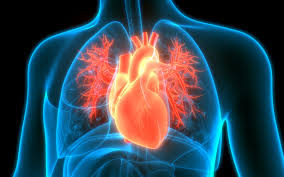


<h1> <b>Importing Libraries</b></h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import plot_confusion_matrix, roc_auc_score, roc_curve, f1_score, accuracy_score
from sklearn.metrics import make_scorer, precision_score, precision_recall_curve, plot_precision_recall_curve
from sklearn.metrics import recall_score, plot_roc_curve
import warnings
warnings.filterwarnings('ignore')
import pprint

In [2]:
 sns.set_theme(context='notebook',
                style='white',
                palette='deep',
                font='Lucida Calligraphy',
                font_scale=1.5,
                color_codes=True,
                rc=None)
    
import matplotlib
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['figure.facecolor'] = '#F0F8FF'
plt.rcParams['figure.titlesize'] = 'medium'
plt.rcParams['figure.dpi'] = 70
plt.rcParams['figure.edgecolor'] = 'blue'
plt.rcParams['figure.frameon'] = True
plt.rcParams["figure.autolayout"] = True

plt.rcParams['axes.facecolor'] = '#F5F5DC'
plt.rcParams['axes.titlesize'] = 25
plt.rcParams["axes.titleweight"] = 'normal'
plt.rcParams["axes.titlecolor"] = 'Blue'
plt.rcParams['axes.edgecolor'] = 'pink'
plt.rcParams["axes.linewidth"] = 2
plt.rcParams["axes.grid"] = True
plt.rcParams['axes.titlelocation'] = 'center'
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["axes.labelpad"] = 2
plt.rcParams['axes.labelweight'] = 1
plt.rcParams["axes.labelcolor"] = 'Blue'
plt.rcParams["axes.axisbelow"] = False
plt.rcParams['axes.xmargin'] = .2
plt.rcParams["axes.ymargin"] = .2

plt.rcParams["xtick.bottom"] = True
plt.rcParams['xtick.color'] = '#A52A2A'
plt.rcParams["ytick.left"] = True
plt.rcParams['ytick.color'] = '#A52A2A'

plt.rcParams['axes.grid'] = True
plt.rcParams['grid.color'] = 'Blue'
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.linewidth'] = .5
plt.rcParams['grid.alpha'] = .3

plt.rcParams['legend.loc'] = 'best'
plt.rcParams['legend.facecolor'] = 'NavajoWhite'
plt.rcParams['legend.edgecolor'] = 'pink'
plt.rcParams['legend.shadow'] = True
plt.rcParams['legend.fontsize'] = 20 

plt.rcParams['font.family'] = 'Sans Serif'
plt.rcParams['font.size'] = 10

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.edgecolor'] = 'Blue'

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option("display.precision", 2)

In [4]:
heart1 = pd.read_csv('../Heart Disease Prediction/heart.csv')
heart1.head().style.set_properties(**{'background-color': 'Cornflowerblue',
                             'color': 'white',
                             'border-color': 'darkblack'})

<h1> <b>Attributes:</b></h1>

<ul>
    <li> <b>Age:</b> Age of the patient [in years]</li><br>
    <li> <b>Sex:</b> Sex of the patient [M: Male, F: Female]</li><br>
    <li> <b>Chest Pain Type:</b> Chest Pain Type [TA: Typical Angina, ATA: Atypical Angina, NAP:Non-Anginal Pain, ASY:Asymptotic] </li><br>
    <li> <b>Resting BP:</b> Resting Blood Pressure [mm Hg]</li><br>
    <li> <b>Cholesterol:</b> Serum Cholesterol[mm/dl]</li><br>
    <li> <b>FastingBS:</b> Fasting Blood Sugar[1: if FastingBS > 120 mg/dl, 0: otherwise] </li><br>
    <li> <b>RestingECG:</b> Resting Electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality(T wave inversions and/or ST elevation or depression of > 0.05mV), LVH: showing probable or definite left venticular hypertrophy by Estes' criteria]</li><br>
    <li> <b>MaxHR:</b> Maximum heart rate achieved [Numeric value between 60 and 202] </li><br>
    <li> <b>ExerciseAngina:</b> Excercise-induced Angina [Y: Yes, N: No]</li><br>
    <li> <b>OldPeak:</b> Oldpeak = ST [Numeric value measured in depression]</li><br>
    <li> <b>ST_Slope:</b> The Slope of peak exercise ST segment[Up: upsloping, Flat: flat, Down: downsloping]</li><br>
    <li> <b>HeartDisease:</b> Output Class[1: heart disease, 0:Normal</li><br>

In [5]:
display(heart1.shape)
display(heart1.size)

(918, 12)

11016

In [6]:
heart1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
heart1.describe()

Age  RestingBP  Cholesterol  FastingBS   MaxHR  Oldpeak  \
count  918.00     918.00       918.00     918.00  918.00   918.00   
mean    53.51     132.40       198.80       0.23  136.81     0.89   
std      9.43      18.51       109.38       0.42   25.46     1.07   
min     28.00       0.00         0.00       0.00   60.00    -2.60   
25%     47.00     120.00       173.25       0.00  120.00     0.00   
50%     54.00     130.00       223.00       0.00  138.00     0.60   
75%     60.00     140.00       267.00       0.00  156.00     1.50   
max     77.00     200.00       603.00       1.00  202.00     6.20   

       HeartDisease  
count        918.00  
mean           0.55  
std            0.50  
min            0.00  
25%            0.00  
50%            1.00  
75%            1.00  
max            1.00

In [8]:
 heart1.isnull().mean()*100

Age               0.0
Sex               0.0
ChestPainType     0.0
RestingBP         0.0
Cholesterol       0.0
FastingBS         0.0
RestingECG        0.0
MaxHR             0.0
ExerciseAngina    0.0
Oldpeak           0.0
ST_Slope          0.0
HeartDisease      0.0
dtype: float64

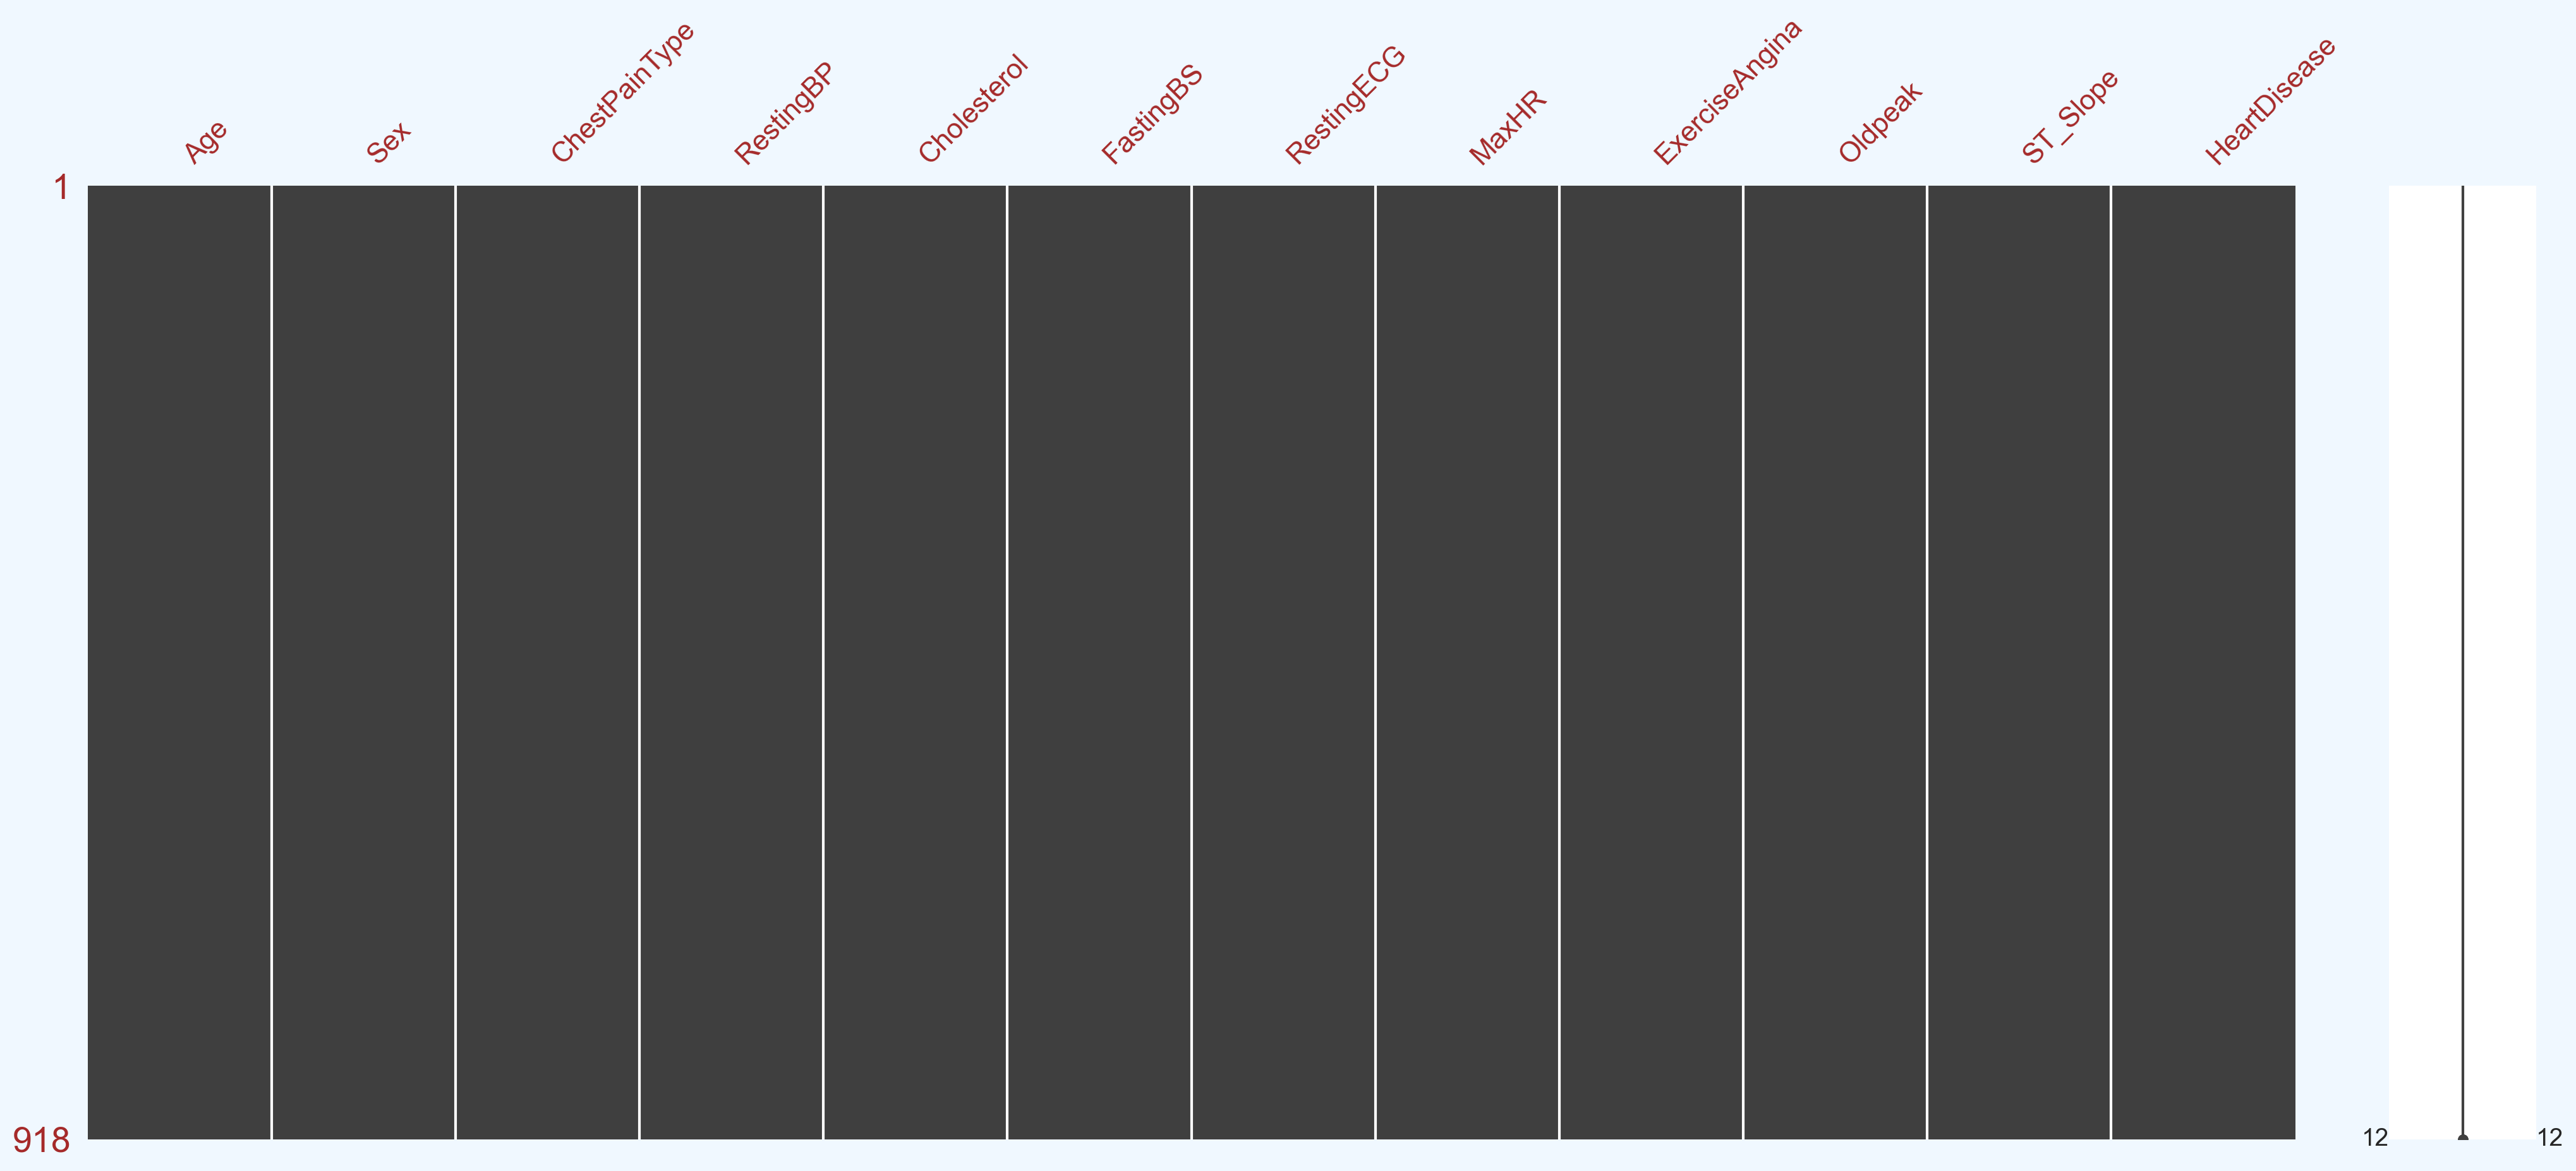

In [9]:
import missingno as msno
msno.matrix(heart1)
plt.show()

In [10]:
Women = heart1.loc[heart1['Sex'] == 'F']["HeartDisease"]
rate_women = (Women.sum()/len(Women)).round(2)*100
print("Percentage of Women with probability of HeartDisease:", rate_women,"%")
Men = heart1.loc[heart1['Sex'] == 'M']["HeartDisease"]
rate_men = (Men.sum()/len(Men)).round(2)*100
print("Percentage of Men with probability of HeartDisease:", rate_men,"%")

Percentage of Women with probability of HeartDisease: 26.0 %
Percentage of Men with probability of HeartDisease: 63.0 %


In [11]:
print(f'We have {heart1.shape[0]} instances withthe {heart1.shape[1]-1} features and 1 output variable')

We have 918 instances withthe 11 features and 1 output variable


In [12]:
pd.DataFrame(abs(heart1.corr()['HeartDisease']))

HeartDisease
Age                   0.28
RestingBP             0.11
Cholesterol           0.23
FastingBS             0.27
MaxHR                 0.40
Oldpeak               0.40
HeartDisease          1.00

In [13]:
## Combining Data
heart1.agg(
 {
 "Age": ["min", "max", "median", "mean", "skew", 'std'],
 "RestingBP": ["min", "max", "median", "mean", "skew", 'std'],
 "Cholesterol": ["min", "max", "median", "mean", "skew", 'std'],
 "Oldpeak":["min", "max", "median", "mean", "skew", 'std'],
 "MaxHR":["min", "max", "median", "mean", "skew", 'std']
 }
 )


Age  RestingBP  Cholesterol  Oldpeak   MaxHR
min     28.00       0.00         0.00    -2.60   60.00
max     77.00     200.00       603.00     6.20  202.00
median  54.00     130.00       223.00     0.60  138.00
mean    53.51     132.40       198.80     0.89  136.81
skew    -0.20       0.18        -0.61     1.02   -0.14
std      9.43      18.51       109.38     1.07   25.46

<AxesSubplot:xlabel='Cholesterol', ylabel='Density'>

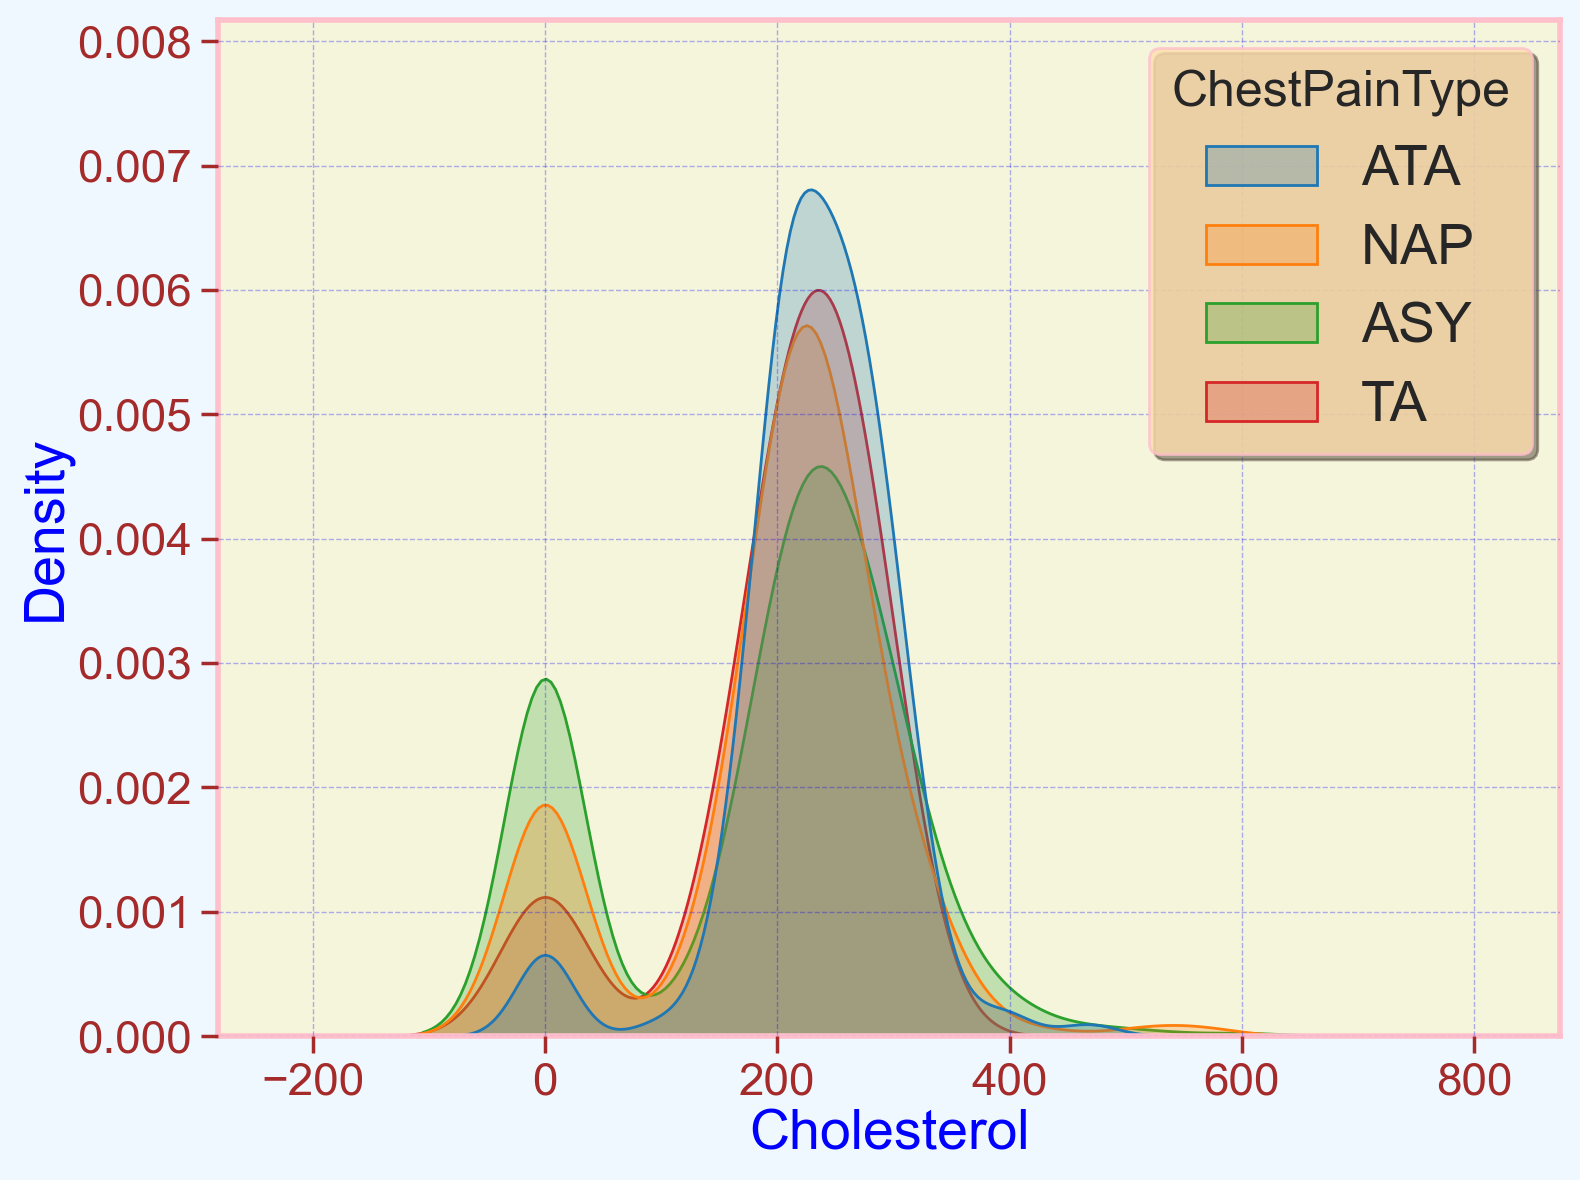

In [14]:
sns.kdeplot( data=heart1, x="Cholesterol", hue="ChestPainType", fill=True, common_norm=False, palette="tab10")

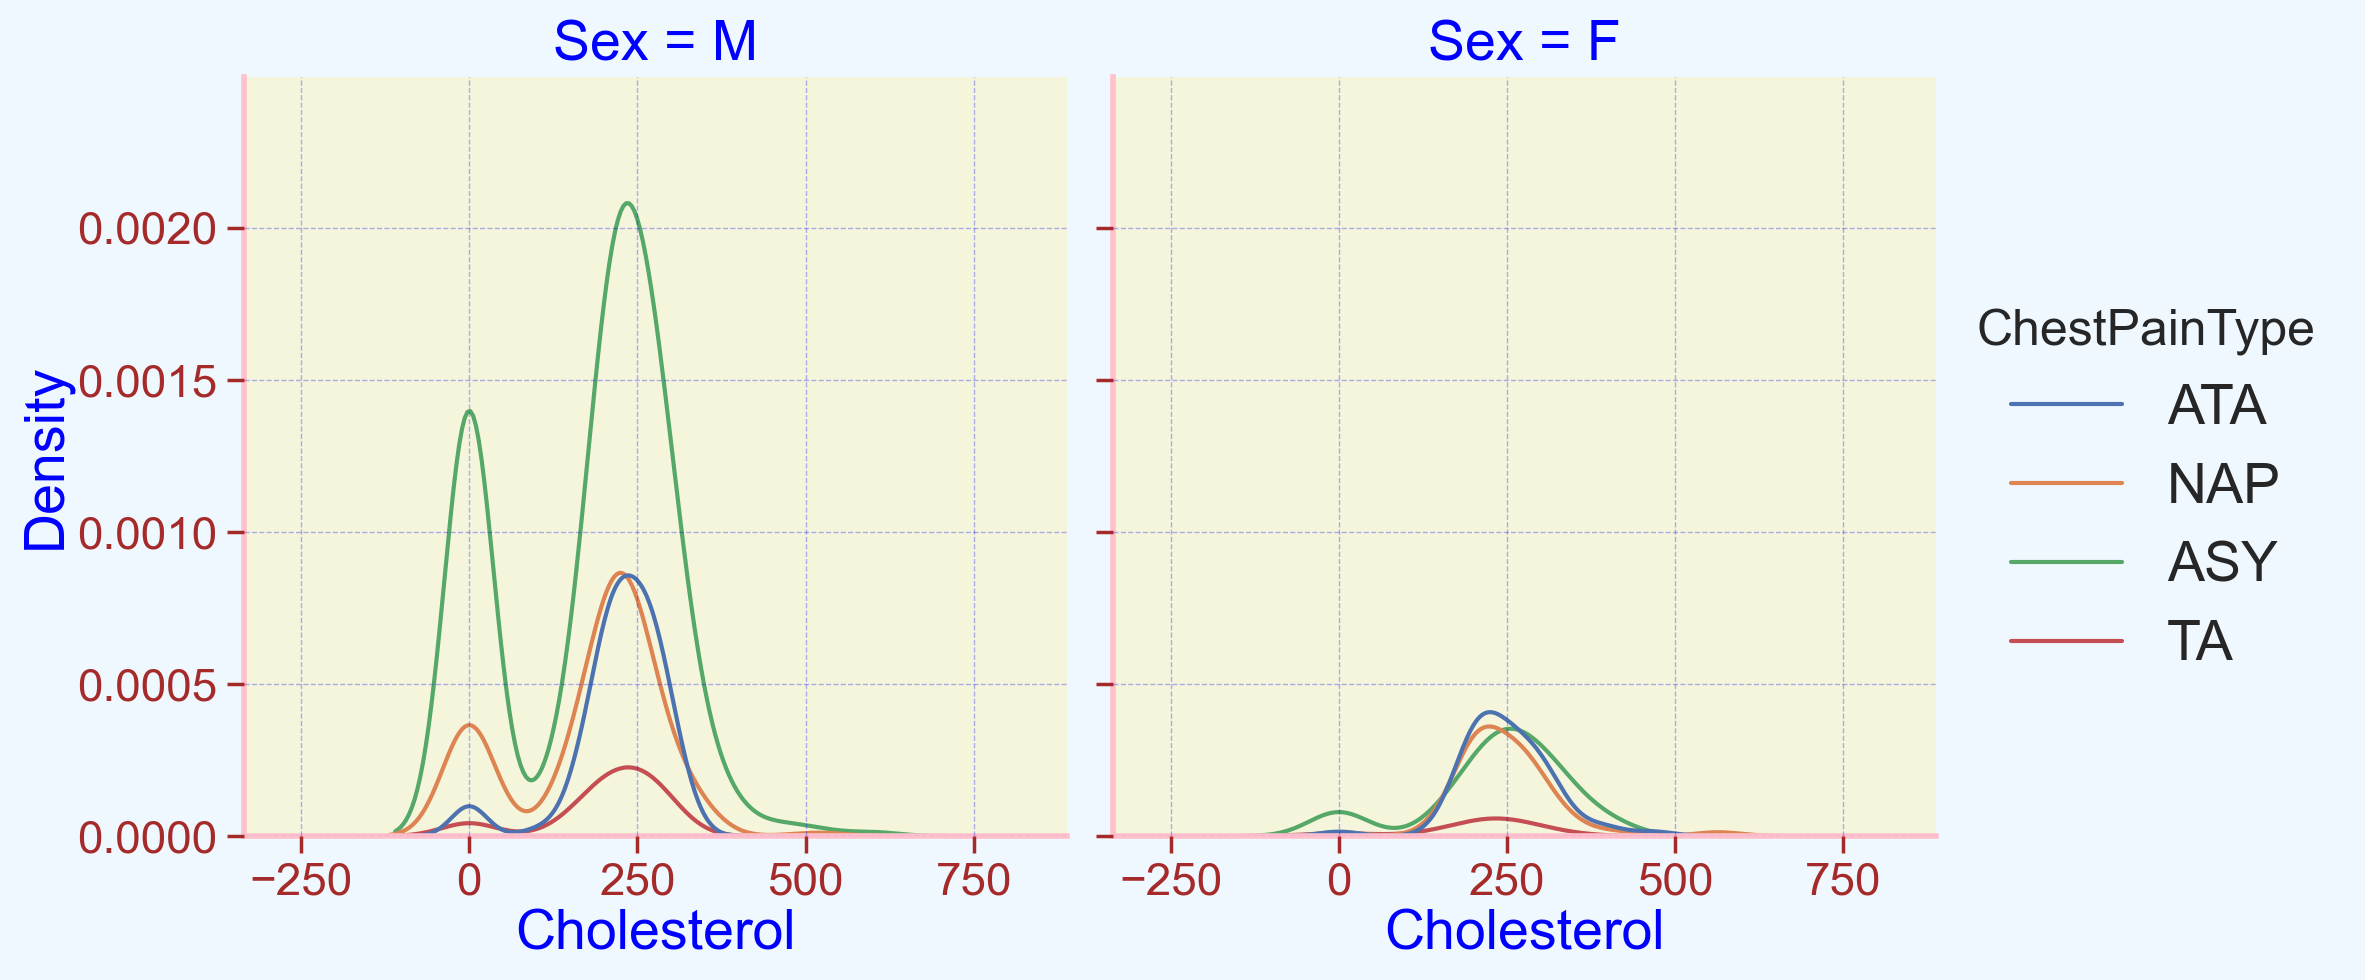

In [15]:
sns.displot( data=heart1, x="Cholesterol", hue="ChestPainType", col="Sex", kind="kde");

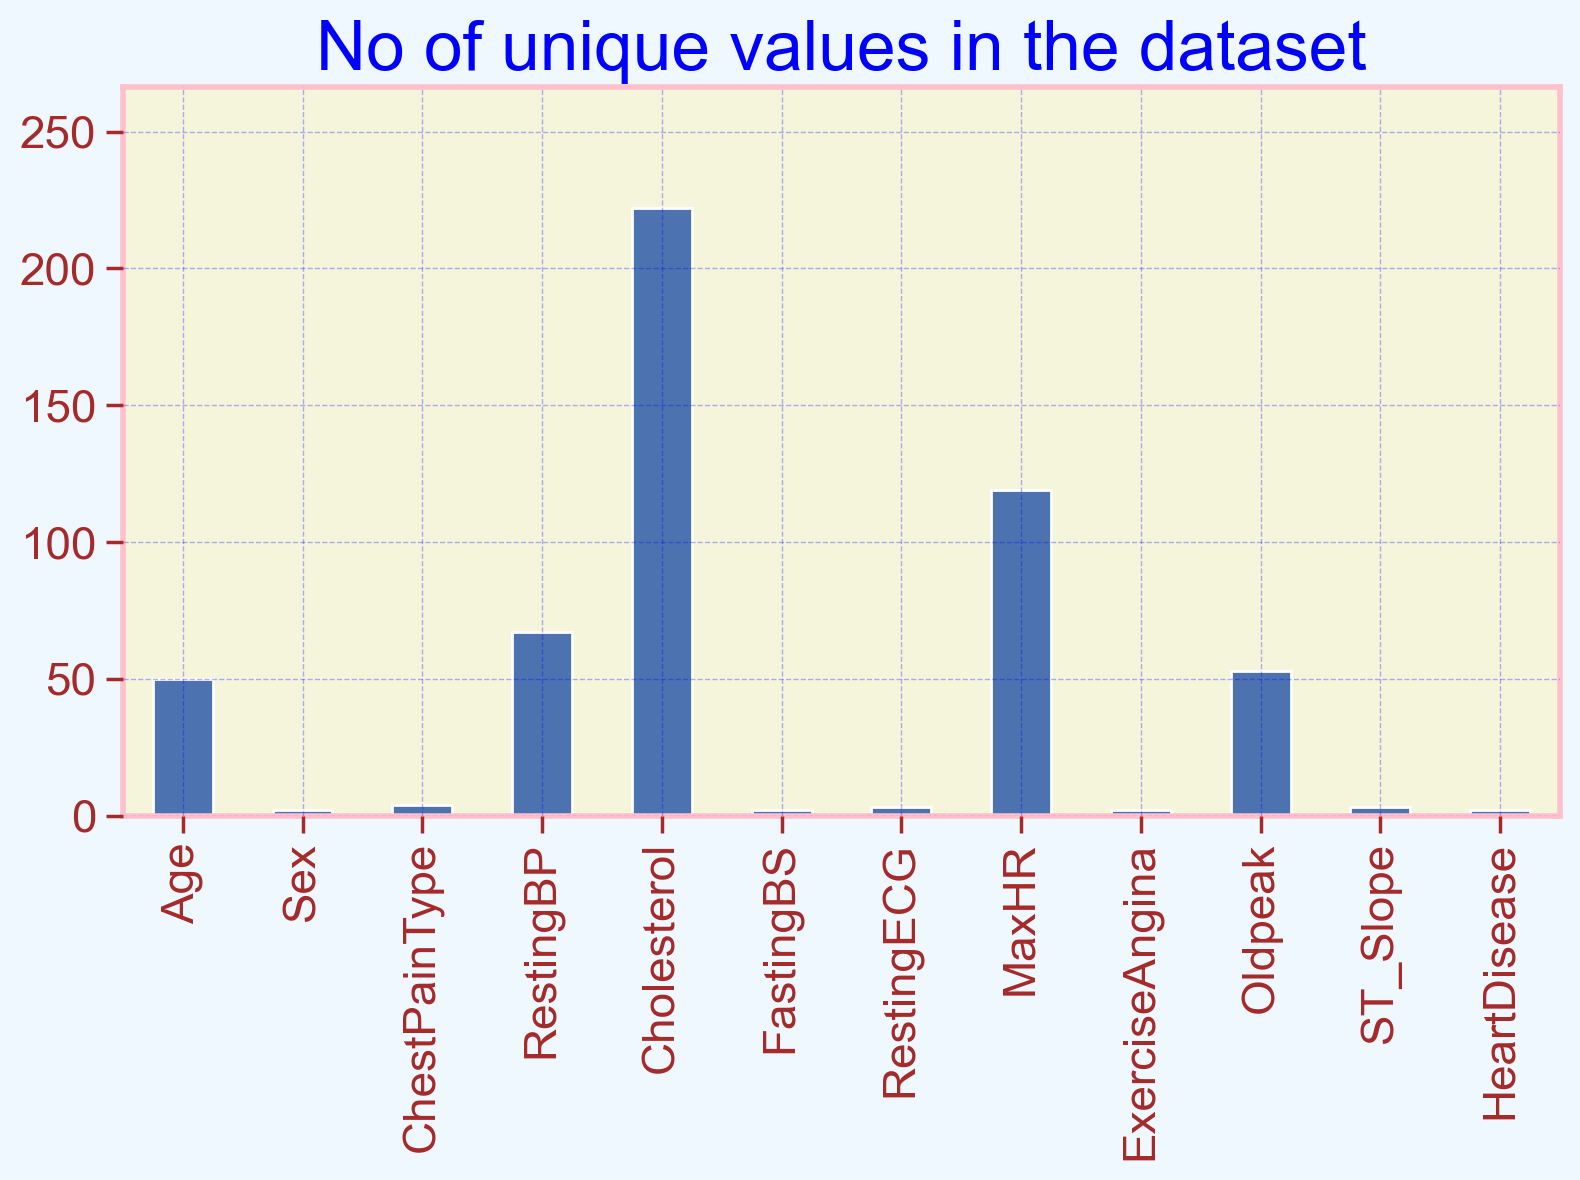

In [16]:
heart1.nunique().plot(kind='bar')
plt.title('No of unique values in the dataset')
plt.show()

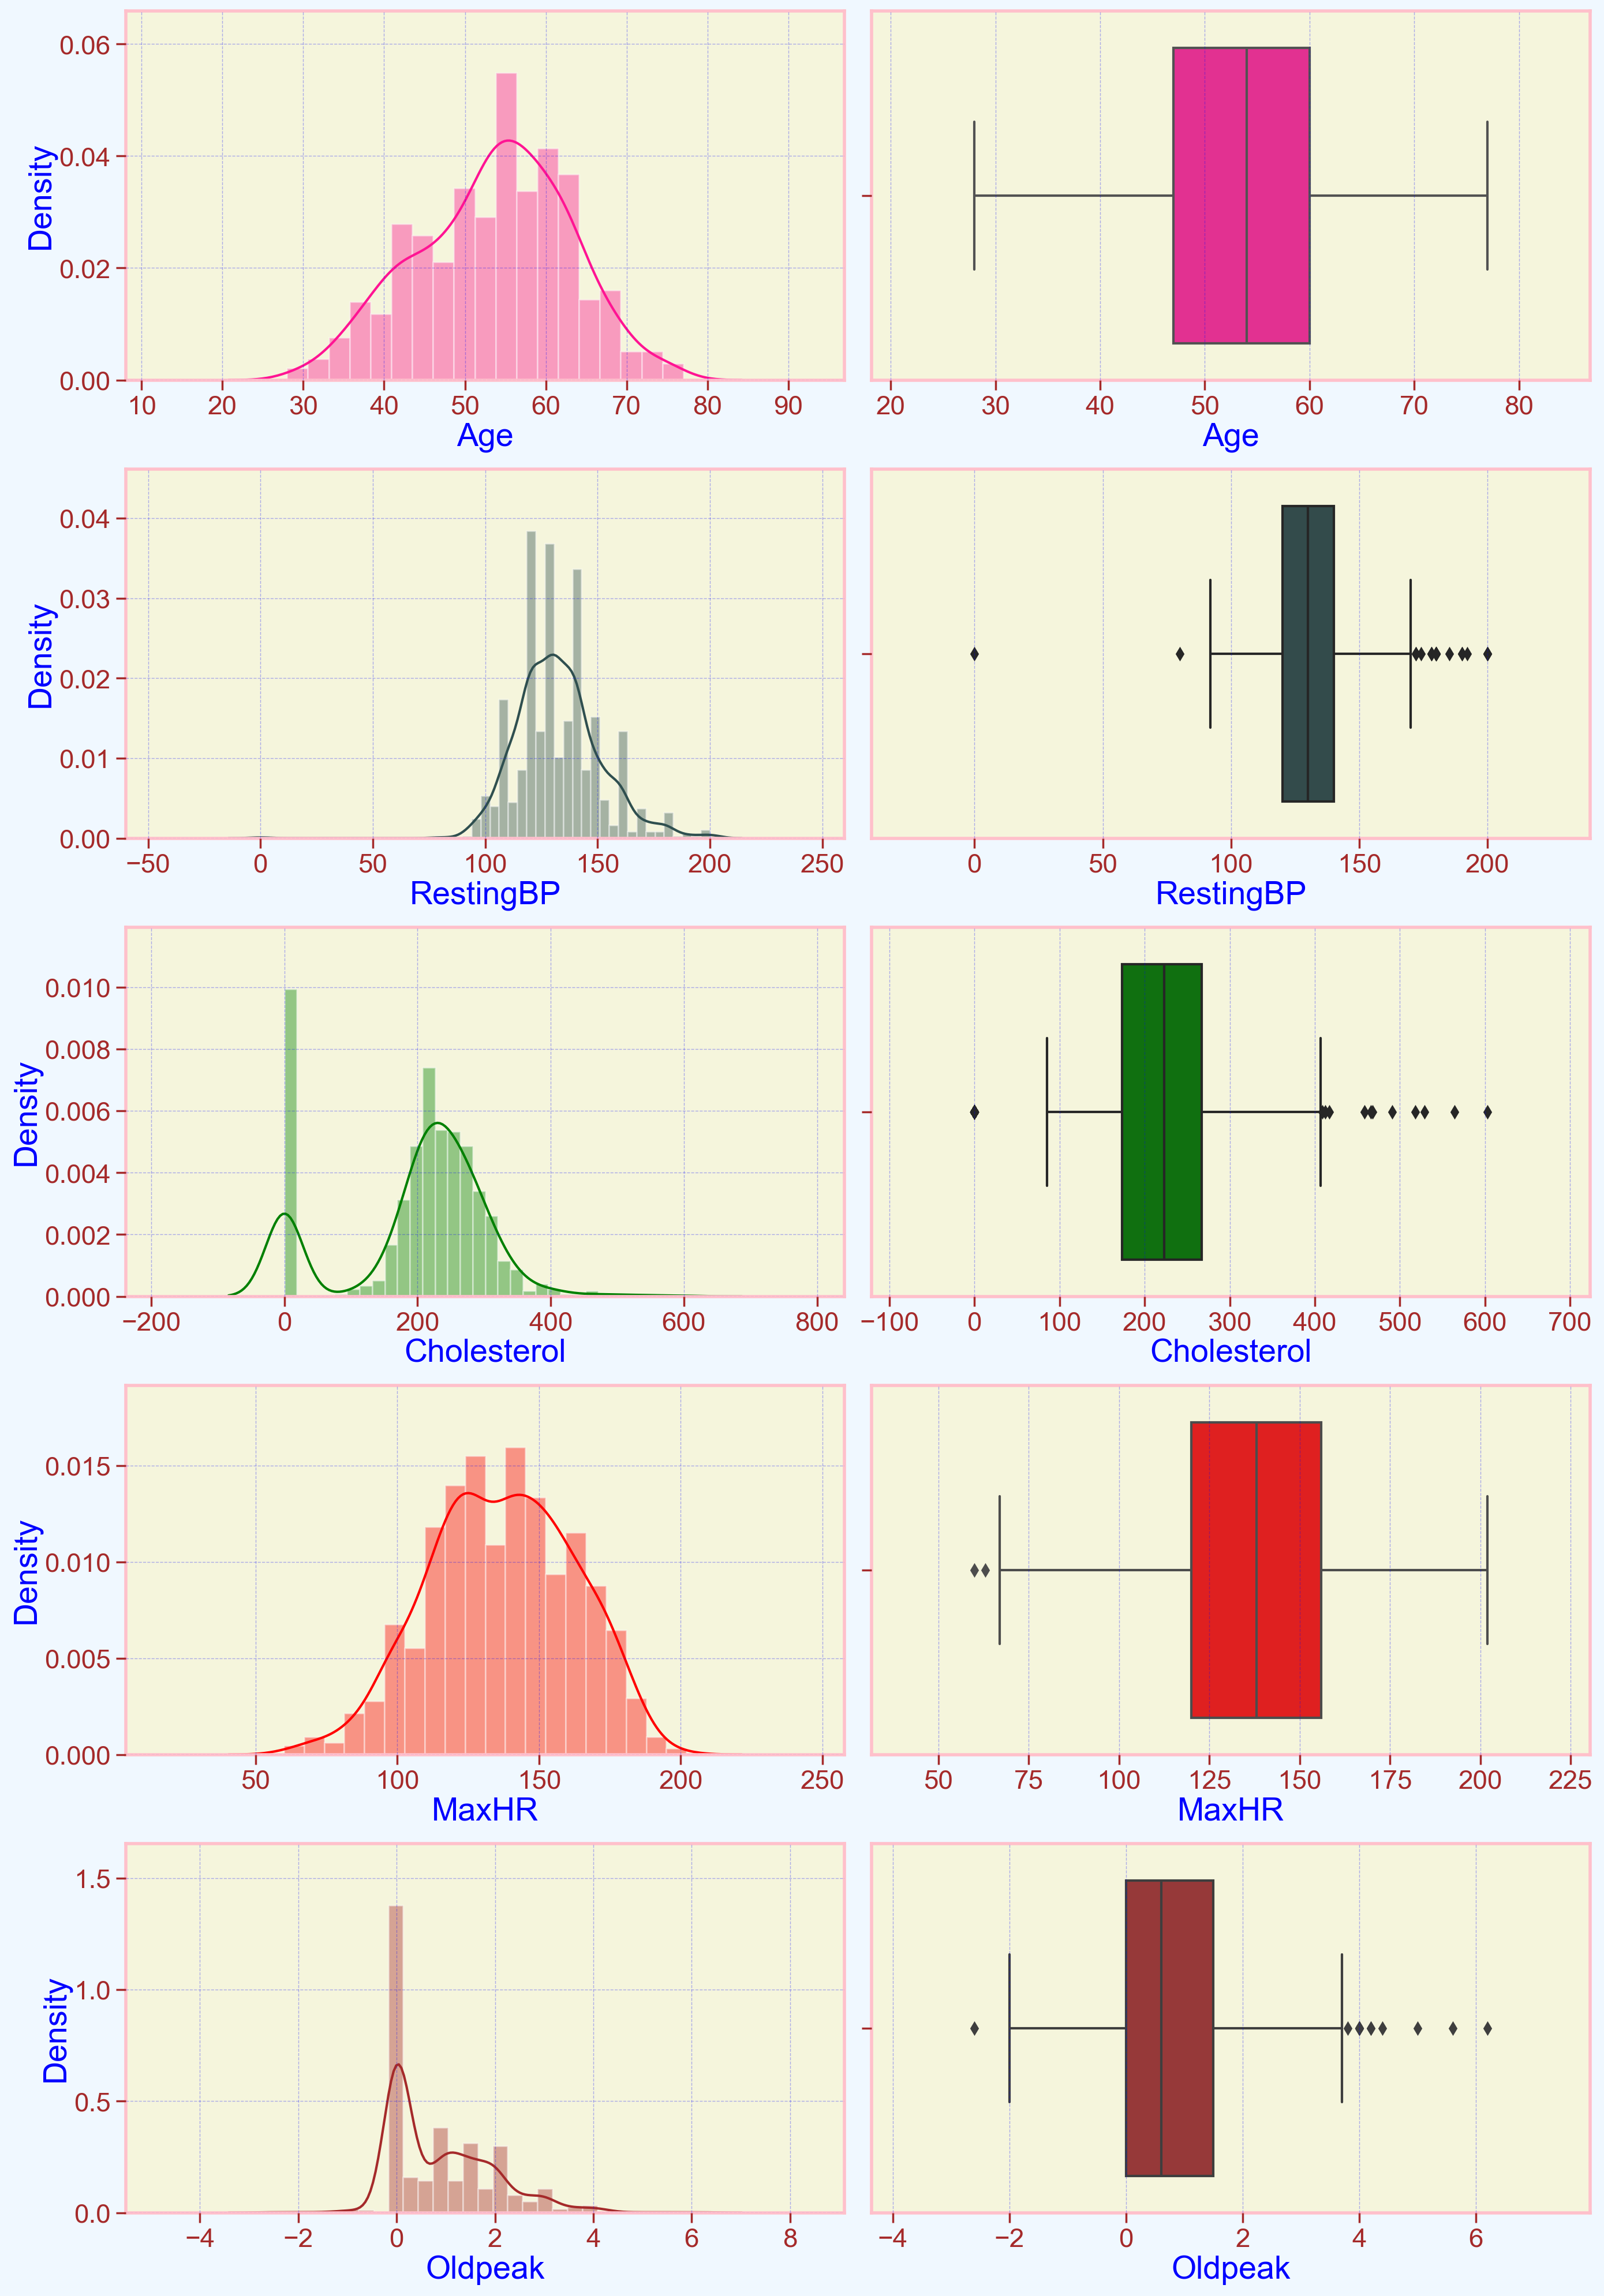

In [17]:
plt.figure(figsize=(14,20))
plt.subplot(5,2,1)
sns.distplot(heart1['Age'],color='DeepPink')
plt.subplot(5,2,2)
sns.boxplot(heart1['Age'],color='DeepPink')
plt.subplot(5,2,3)
sns.distplot(heart1['RestingBP'],color='DarkSlateGray')
plt.subplot(5,2,4)
sns.boxplot(heart1['RestingBP'],color='DarkSlateGray')
plt.subplot(5,2,5)
sns.distplot(heart1['Cholesterol'],color='Green')
plt.subplot(5,2,6)
sns.boxplot(heart1['Cholesterol'],color='Green')
plt.subplot(5,2,7)
sns.distplot(heart1['MaxHR'],color='Red')
plt.subplot(5,2,8)
sns.boxplot(heart1['MaxHR'],color='Red')
plt.subplot(5,2,9)
sns.distplot(heart1['Oldpeak'],color='Brown')
plt.subplot(5,2,10)
sns.boxplot(heart1['Oldpeak'],color='Brown')
plt.tight_layout()
plt.show()

In [18]:
Q1 = heart1.quantile(0.05)
Q3 = heart1.quantile(0.95)
IQR = Q3 - Q1
IQR.sort_values(ascending=False)

Cholesterol     331.3
MaxHR            82.0
RestingBP        54.0
Age              31.0
Oldpeak           3.0
FastingBS         1.0
HeartDisease      1.0
dtype: float64

In [19]:
heart = heart1 [~((heart1 < (Q1 - 1.5 * IQR)) |(heart1 > (Q3 + 1.5 * IQR))).any(axis=1)]

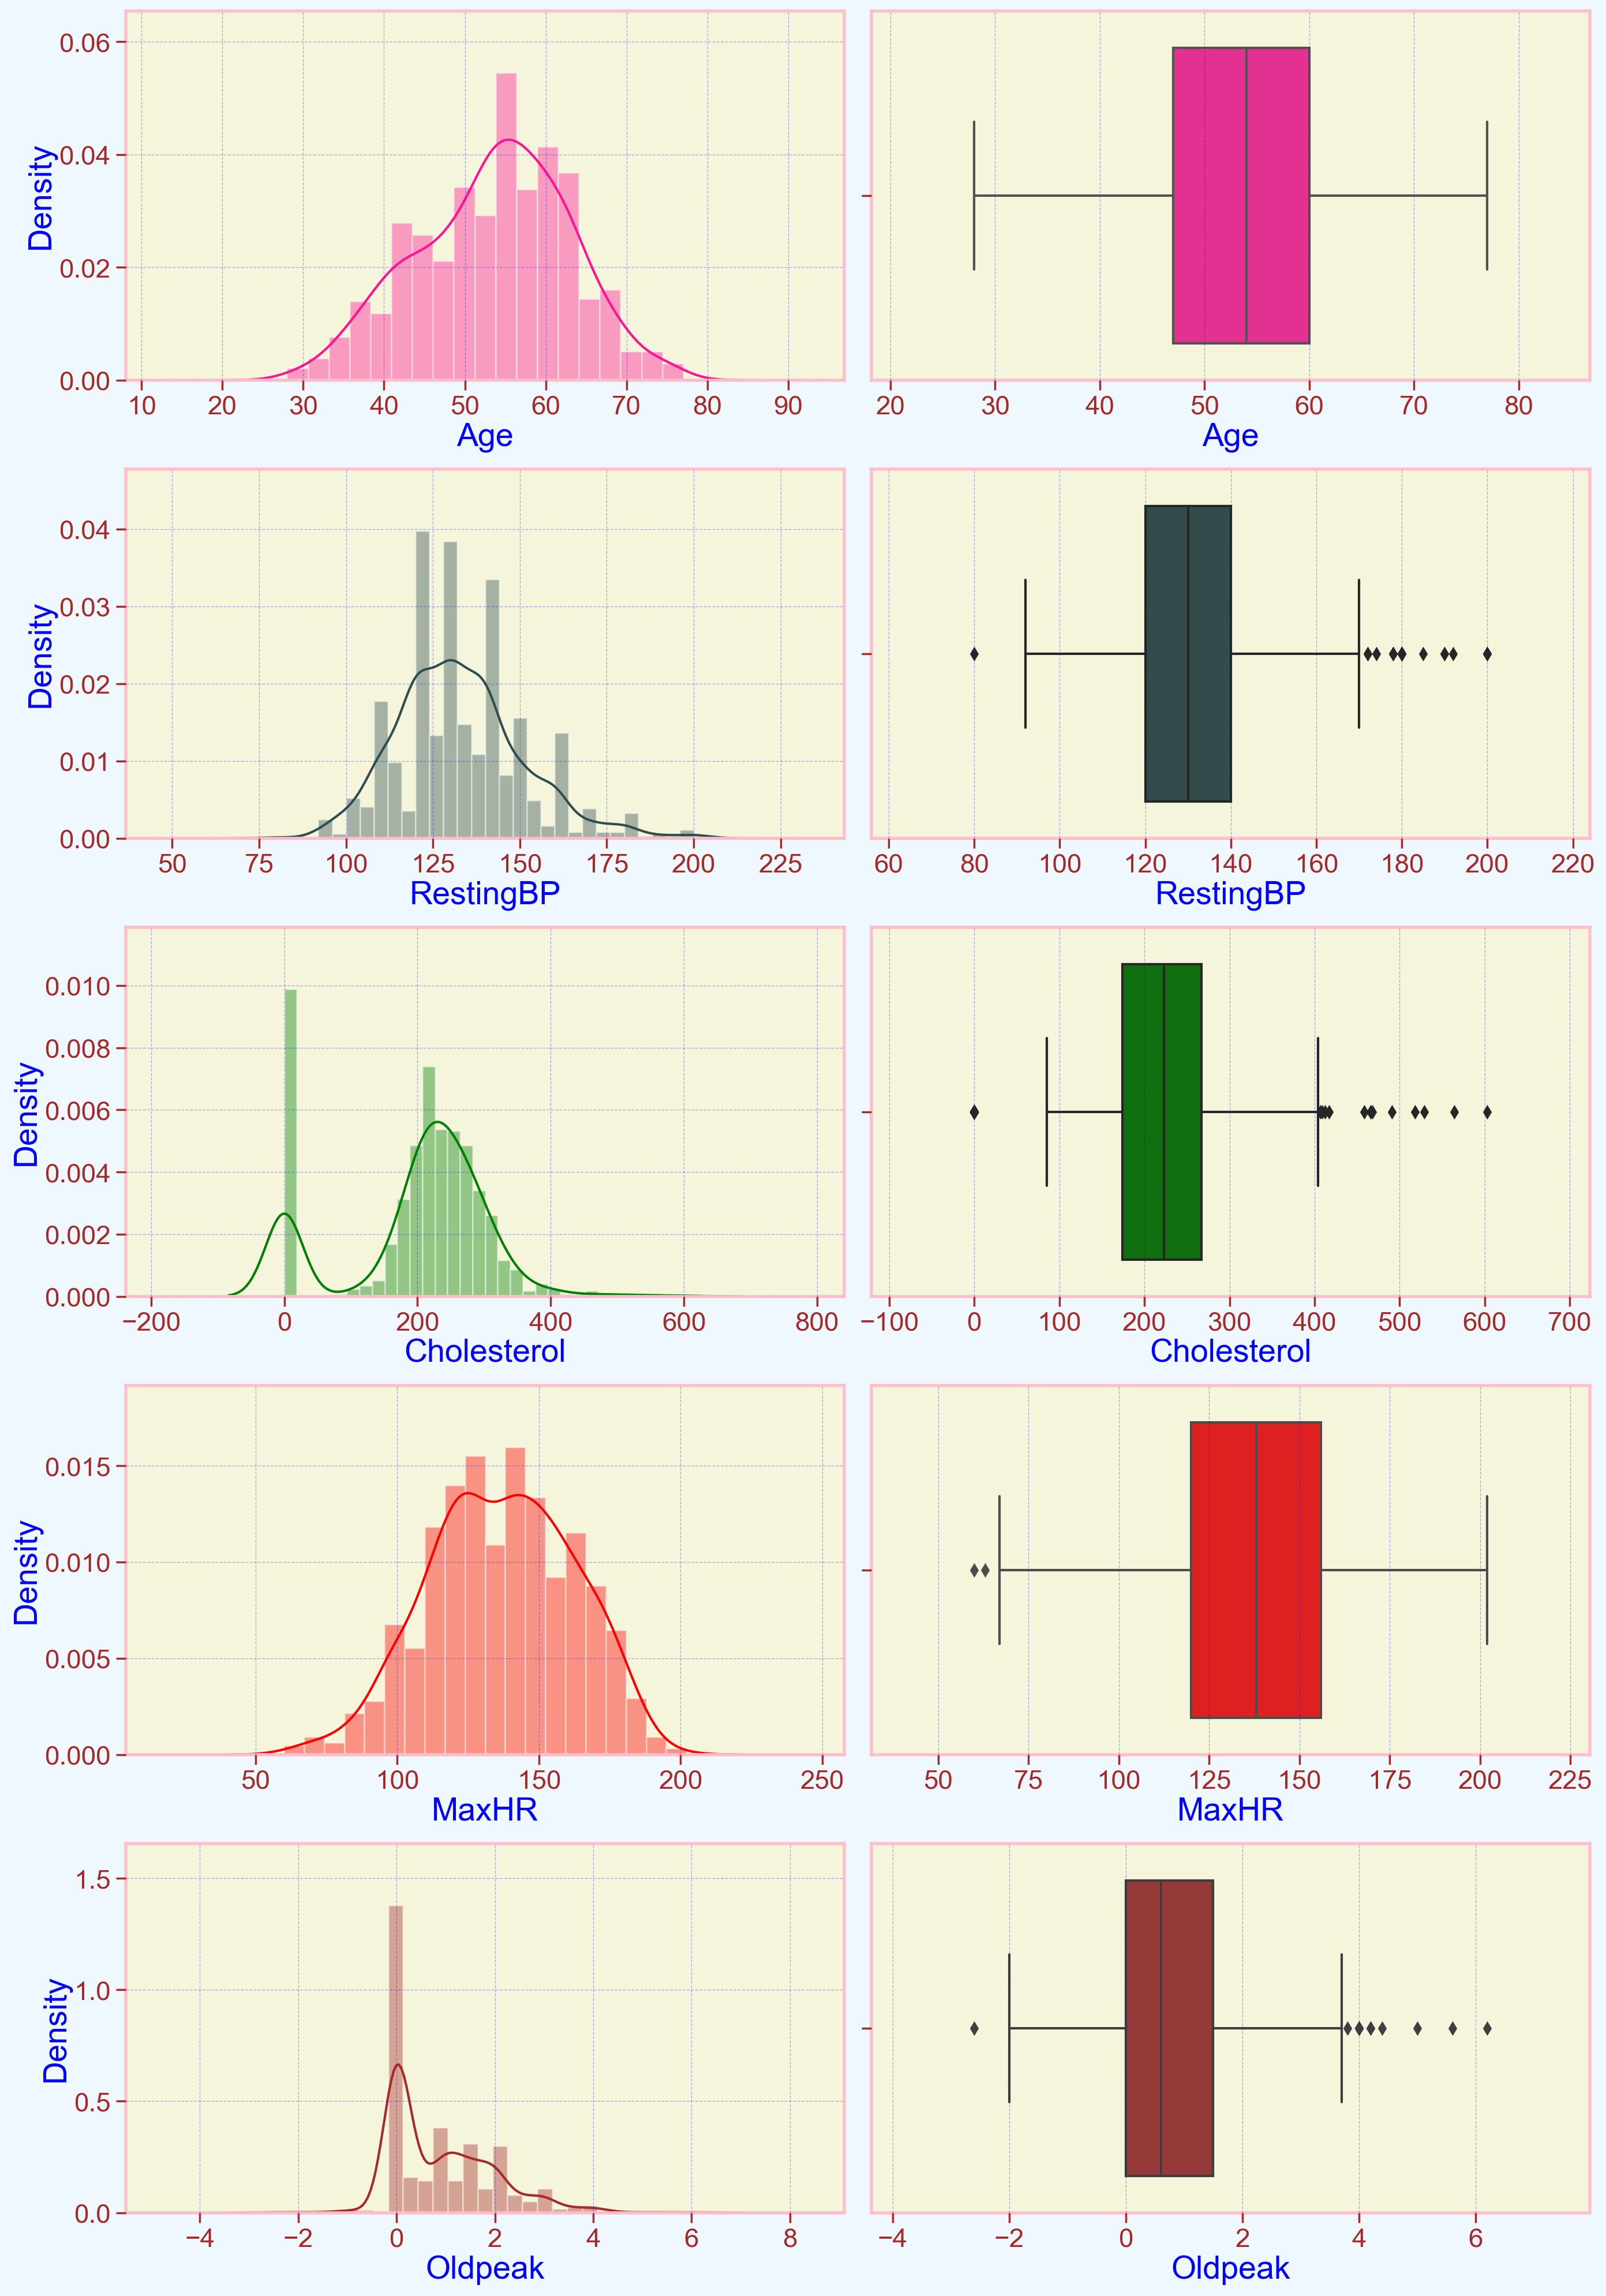

In [20]:
plt.figure(figsize=(14,20))
plt.subplot(5,2,1)
sns.distplot(heart['Age'],color='DeepPink')
plt.subplot(5,2,2)
sns.boxplot(heart['Age'],color='DeepPink')
plt.subplot(5,2,3)
sns.distplot(heart['RestingBP'],color='DarkSlateGray')
plt.subplot(5,2,4)
sns.boxplot(heart['RestingBP'],color='DarkSlateGray')
plt.subplot(5,2,5)
sns.distplot(heart['Cholesterol'],color='Green')
plt.subplot(5,2,6)
sns.boxplot(heart['Cholesterol'],color='Green')
plt.subplot(5,2,7)
sns.distplot(heart['MaxHR'],color='Red')
plt.subplot(5,2,8)
sns.boxplot(heart['MaxHR'],color='Red')
plt.subplot(5,2,9)
sns.distplot(heart['Oldpeak'],color='Brown')
plt.subplot(5,2,10)
sns.boxplot(heart['Oldpeak'],color='Brown')
plt.tight_layout()
plt.show()


In [21]:
# Checking the number of Zeros(0) present in the Cholesterol
Cholesterol = heart[heart['Cholesterol'] == 0]
Cholesterol.shape

(171, 12)

<h3>Cholesterol value cannat be zero, So zeros must be filled with median value</h3>

In [22]:
## Converting Zero Value of Cholesterol to NaN Value
heart.loc[heart['Cholesterol'] == 0,'Cholesterol'] = np.nan
heart.head(1)

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140        289.0          0     Normal    172   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0

In [23]:
## NaN value of Cholesterol is filled with median value
heart["Cholesterol"] = heart["Cholesterol"].fillna(heart["Cholesterol"].median())

<h3>RestingBP:</h3>

A total blood pressure reading is determined by	measuring the systolic and diastolic blood pressures.
 <ul>
<li>Systolic blood pressure, the top number, measures the force the	heart exerts on	the	walls of the arteries each	time it beats.</li>
<li>CrossDiastolic blood pressure, the bottom number, measures the force the heart exerts on the walls of the	arteries in between beats.</li>
    </ul>
    

![Blood Pressure](https://www.drugwatch.com/wp-content/uploads/Blood-Pressure-Chart-640x0-c-default.jpg)

In [24]:
## Checking the presence of Zeros in the RestingBP
RestingBP = heart[heart['RestingBP'] == 0]
RestingBP

Empty DataFrame
Columns: [Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease]
Index: []

<h3><b>RestingBP represents the blood pressure of the patient. Its not possible to have values equal to zero(0). There is only 1 zero in RestingBP so it will be removed.</b></h3>

In [25]:
heart = heart.drop(heart[(heart['RestingBP'] == 0)].index)

In [26]:
Systolic_RestingBP = heart[heart['RestingBP'] >= 100]
display(Systolic_RestingBP.value_counts().sum())

905

<b><h3>In RestingBP, number Systolic blood pressure of thepatient is 905, this is calculated from the range of Systolic which is from 70 to 190 and above<b></h3>

In [27]:
Diastolic_RestingBP = heart[heart['RestingBP'] <= 100]
display(Diastolic_RestingBP.value_counts().sum())


27

<h3><b>In	RestingBP,	number	Diastolic	blood	pressure	of	the	patient	is	only	27,	this	is
 calculated	from	the	range	of	Diastolic	which	is	from	40	to	100</b></h3>

In [28]:
heart['Diastolic_RestingBP'] = np.where( heart['RestingBP'] <=100, 1,0)
heart.sample(5)

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
334   51   M           ASY        130        237.0          1     Normal   
402   65   M           ASY        145        237.0          1         ST   
479   56   M           NAP        170        237.0          0        LVH   
786   69   M           NAP        140        254.0          0        LVH   
167   48   M           ATA        140        238.0          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  Diastolic_RestingBP  
334    170              N     -0.7       Up             1                    0  
402     67              N      0.7     Flat             1                    0  
479    123              Y      2.5     Flat             1                    0  
786    146              N      2.0     Flat             1                    0  
167    118              N      0.0       Up             0                    0

In [29]:
heart['RestingBP'].min()

80

In [30]:
heart["RestingBP"].max()

200

In [31]:
heart["RestingBP_Category"]= pd.cut(heart["RestingBP"], bins=[0,120,129,139,200], labels=[" Normal_BP"," Hypertension_Stage_2", " Hypertension_Stage_1", "Elevated_BP"])
print("Value Counts:\n\n",heart["RestingBP_Category"].value_counts())

heart.sample(5)

Value Counts:

 Elevated_BP              327
 Normal_BP               292
 Hypertension_Stage_1    216
 Hypertension_Stage_2     82
Name: RestingBP_Category, dtype: int64


Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
31    56   M           NAP        130        167.0          0     Normal   
583   69   M           NAP        142        271.0          0        LVH   
747   42   M           ASY        140        226.0          0     Normal   
619   74   F           ATA        120        269.0          0        LVH   
335   62   M            TA        120        237.0          1        LVH   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  \
31     114              N      0.0       Up             0   
583    126              N      0.3       Up             0   
747    178              N      0.0       Up             0   
619    121              Y      0.2       Up             0   
335    134              N     -0.8     Flat             1   

     Diastolic_RestingBP     RestingBP_Category  
31                     0   Hypertension_Stage_1  
583                    0            Elevated_BP  
747                    0            Elevated_BP  
619                    0              Normal_BP  
335                    0              Normal_BP

In [32]:
# converting from categorical variable to object type
heart['RestingBP_Category'] = heart['RestingBP_Category'].astype(object)

<img src = "https://i.insider.com/5f19dd2ef0f41940574e24a5?width=1000&format=jpeg&auto=webp" width = 543, height= 1000)/>

In [33]:
heart['Age'].min()

28

In [34]:
heart["Cholesterol_Category"]= pd.cut(heart["Cholesterol"] ,bins=[0 ,200 ,230, 500], labels=[" Normal"," Borderline"," High"])
print("Value Counts :\n\n",heart['Cholesterol_Category'].value_counts())
heart.head()

Value Counts :

  High          576
 Borderline    187
 Normal        150
Name: Cholesterol_Category, dtype: int64


Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140        289.0          0     Normal    172   
1   49   F           NAP        160        180.0          0     Normal    156   
2   37   M           ATA        130        283.0          0         ST     98   
3   48   F           ASY        138        214.0          0     Normal    108   
4   54   M           NAP        150        195.0          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  Diastolic_RestingBP  \
0              N      0.0       Up             0                    0   
1              N      1.0     Flat             1                    0   
2              N      0.0       Up             0                    0   
3              Y      1.5     Flat             1                    0   
4              N      0.0       Up             0                    0   

      RestingBP_Category Cholesterol_Category  
0            Elevated_BP                 High  
1            Elevated_BP               Normal  
2   Hypertension_Stage_1                 High  
3   Hypertension_Stage_1           Borderline  
4            Elevated_BP               Normal

In [35]:
heart.dtypes

Age                        int64
Sex                       object
ChestPainType             object
RestingBP                  int64
Cholesterol              float64
FastingBS                  int64
RestingECG                object
MaxHR                      int64
ExerciseAngina            object
Oldpeak                  float64
ST_Slope                  object
HeartDisease               int64
Diastolic_RestingBP        int32
RestingBP_Category        object
Cholesterol_Category    category
dtype: object

In [36]:
# converting from categorical variable to object type
heart['Cholesterol_Category'] = heart['Cholesterol_Category'].astype(object)

In [37]:
heart.dtypes

Age                       int64
Sex                      object
ChestPainType            object
RestingBP                 int64
Cholesterol             float64
FastingBS                 int64
RestingECG               object
MaxHR                     int64
ExerciseAngina           object
Oldpeak                 float64
ST_Slope                 object
HeartDisease              int64
Diastolic_RestingBP       int32
RestingBP_Category       object
Cholesterol_Category     object
dtype: object

In [38]:
heart['Cholesterol_Category'].value_counts()

 High          576
 Borderline    187
 Normal        150
Name: Cholesterol_Category, dtype: int64

In [39]:
numerical = heart.select_dtypes(include=['number']).columns
categorical = heart.select_dtypes(include=['object']).columns
print('Numerical:',numerical)
print("**********"*10)
print("Categorical:",categorical)

Numerical: Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Diastolic_RestingBP'],
      dtype='object')
****************************************************************************************************
Categorical: Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope',
       'RestingBP_Category', 'Cholesterol_Category'],
      dtype='object')


In [40]:
for col in heart[categorical]:
    print(heart[col].value_counts())
    print("****"*7)

M    724
F    193
Name: Sex, dtype: int64
****************************
ASY    496
NAP    202
ATA    173
TA      46
Name: ChestPainType, dtype: int64
****************************
Normal    551
LVH       188
ST        178
Name: RestingECG, dtype: int64
****************************
N    546
Y    371
Name: ExerciseAngina, dtype: int64
****************************
Flat    459
Up      395
Down     63
Name: ST_Slope, dtype: int64
****************************
Elevated_BP              327
 Normal_BP               292
 Hypertension_Stage_1    216
 Hypertension_Stage_2     82
Name: RestingBP_Category, dtype: int64
****************************
 High          576
 Borderline    187
 Normal        150
Name: Cholesterol_Category, dtype: int64
****************************


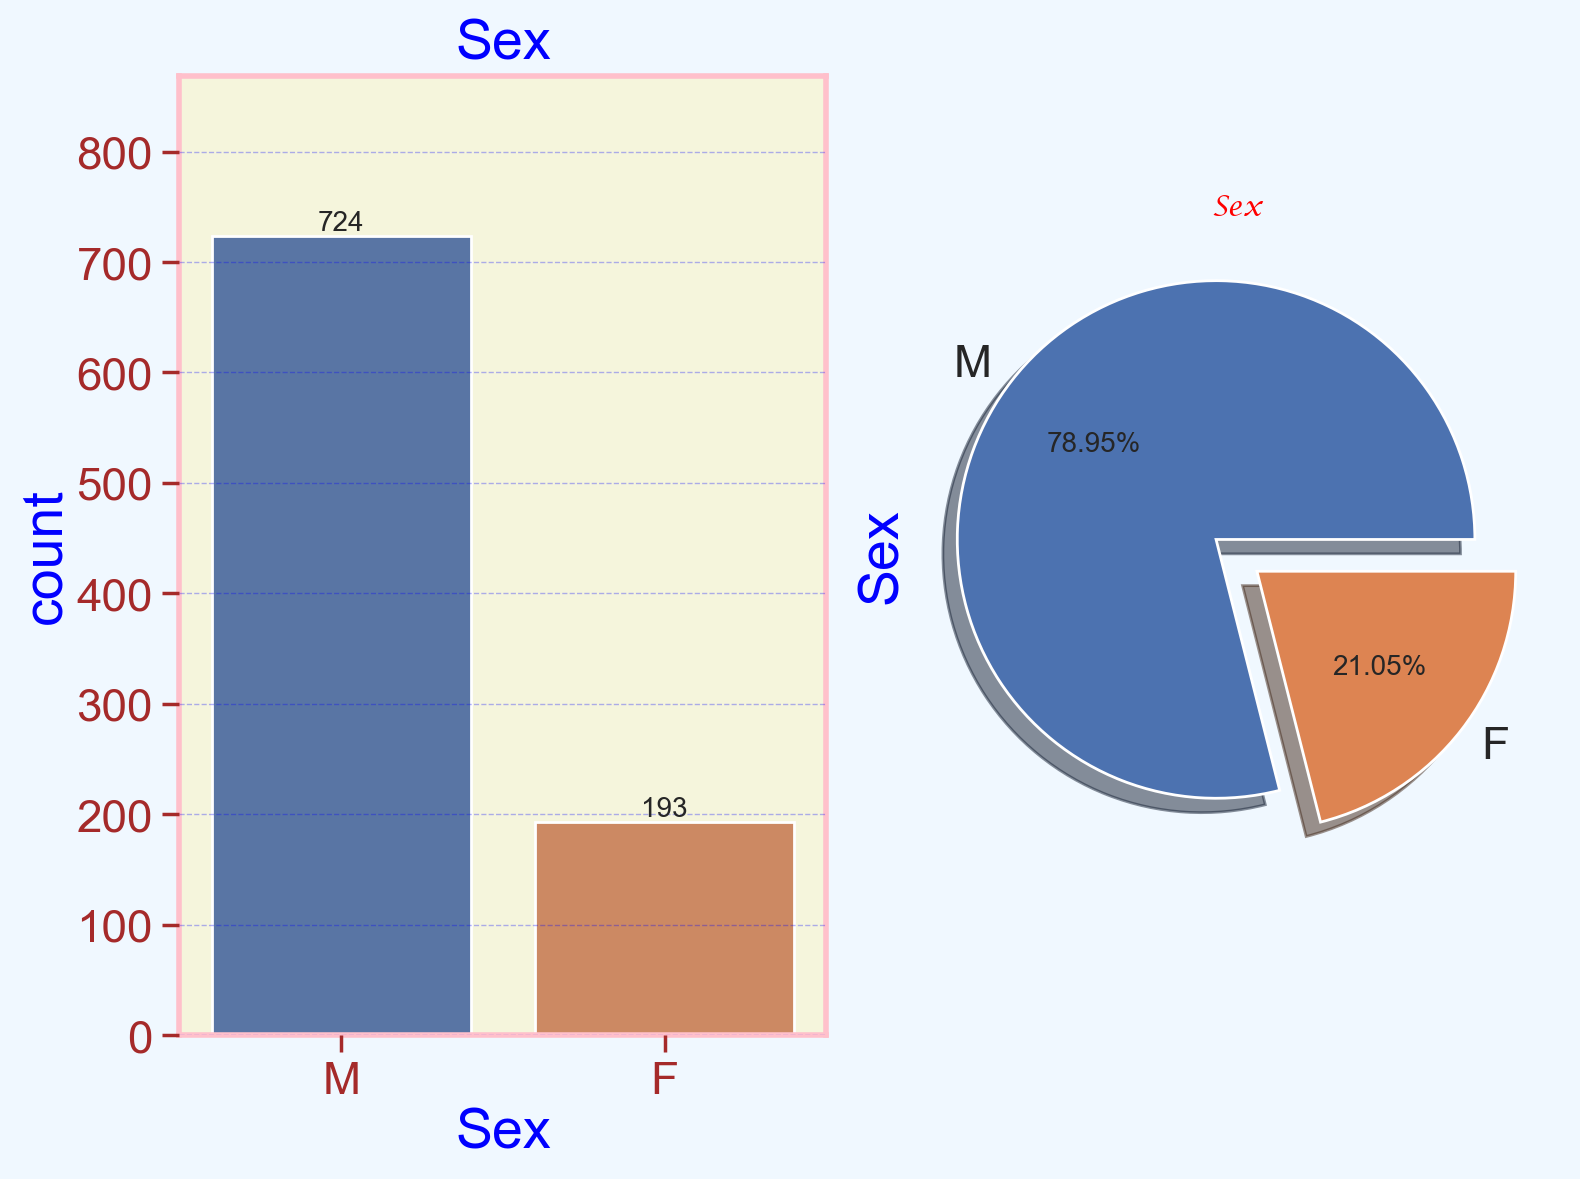

In [41]:
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Sex',	data=heart)
ax.bar_label(ax.containers[0])
plt.title("Sex", fontsize=20)
ax =plt.subplot(1,2,2)
ax=heart['Sex'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Sex", fontsize = 20,color='Red',font='Lucida Calligraphy');

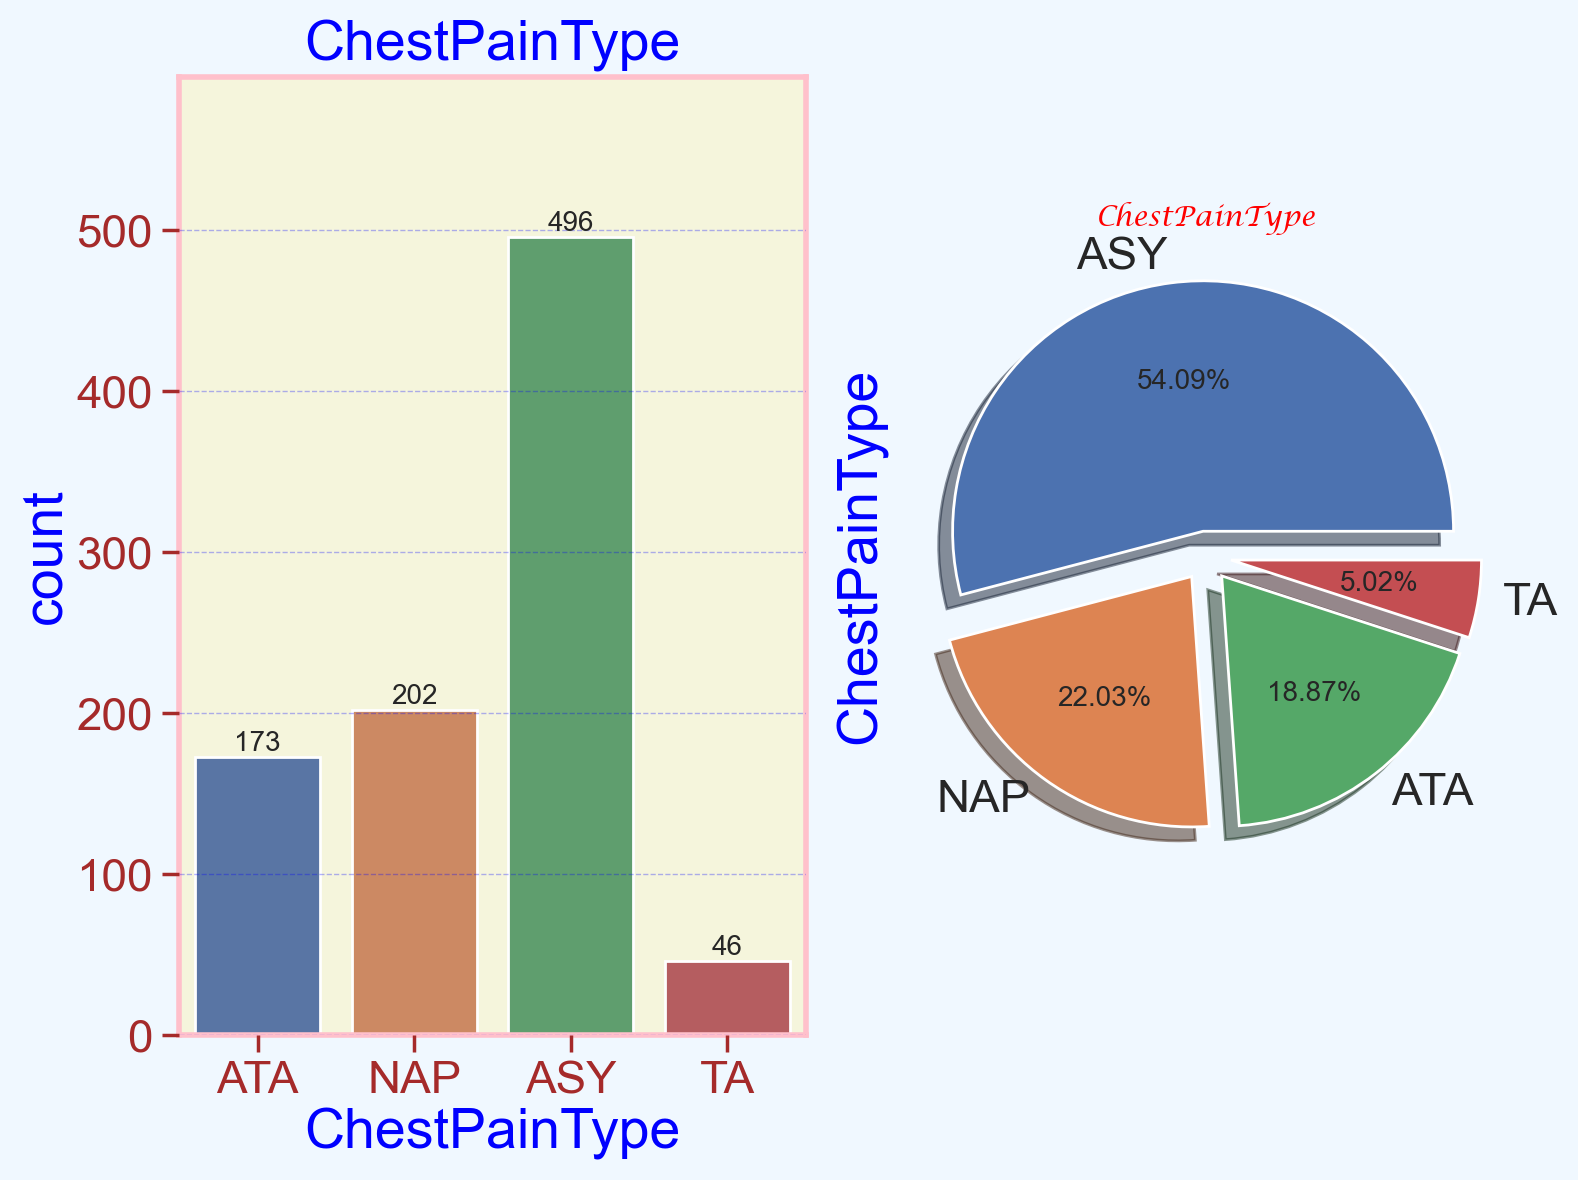

In [42]:
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='ChestPainType',data=heart)
ax.bar_label(ax.containers[0])
plt.title("ChestPainType", fontsize=20)
ax = plt.subplot(1,2,2)
ax = heart['ChestPainType'].value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1],autopct='%1.2f%%',shadow=True)
ax.set_title(label = "ChestPainType", fontsize = 20,color='Red', font='Lucida Calligraphy');

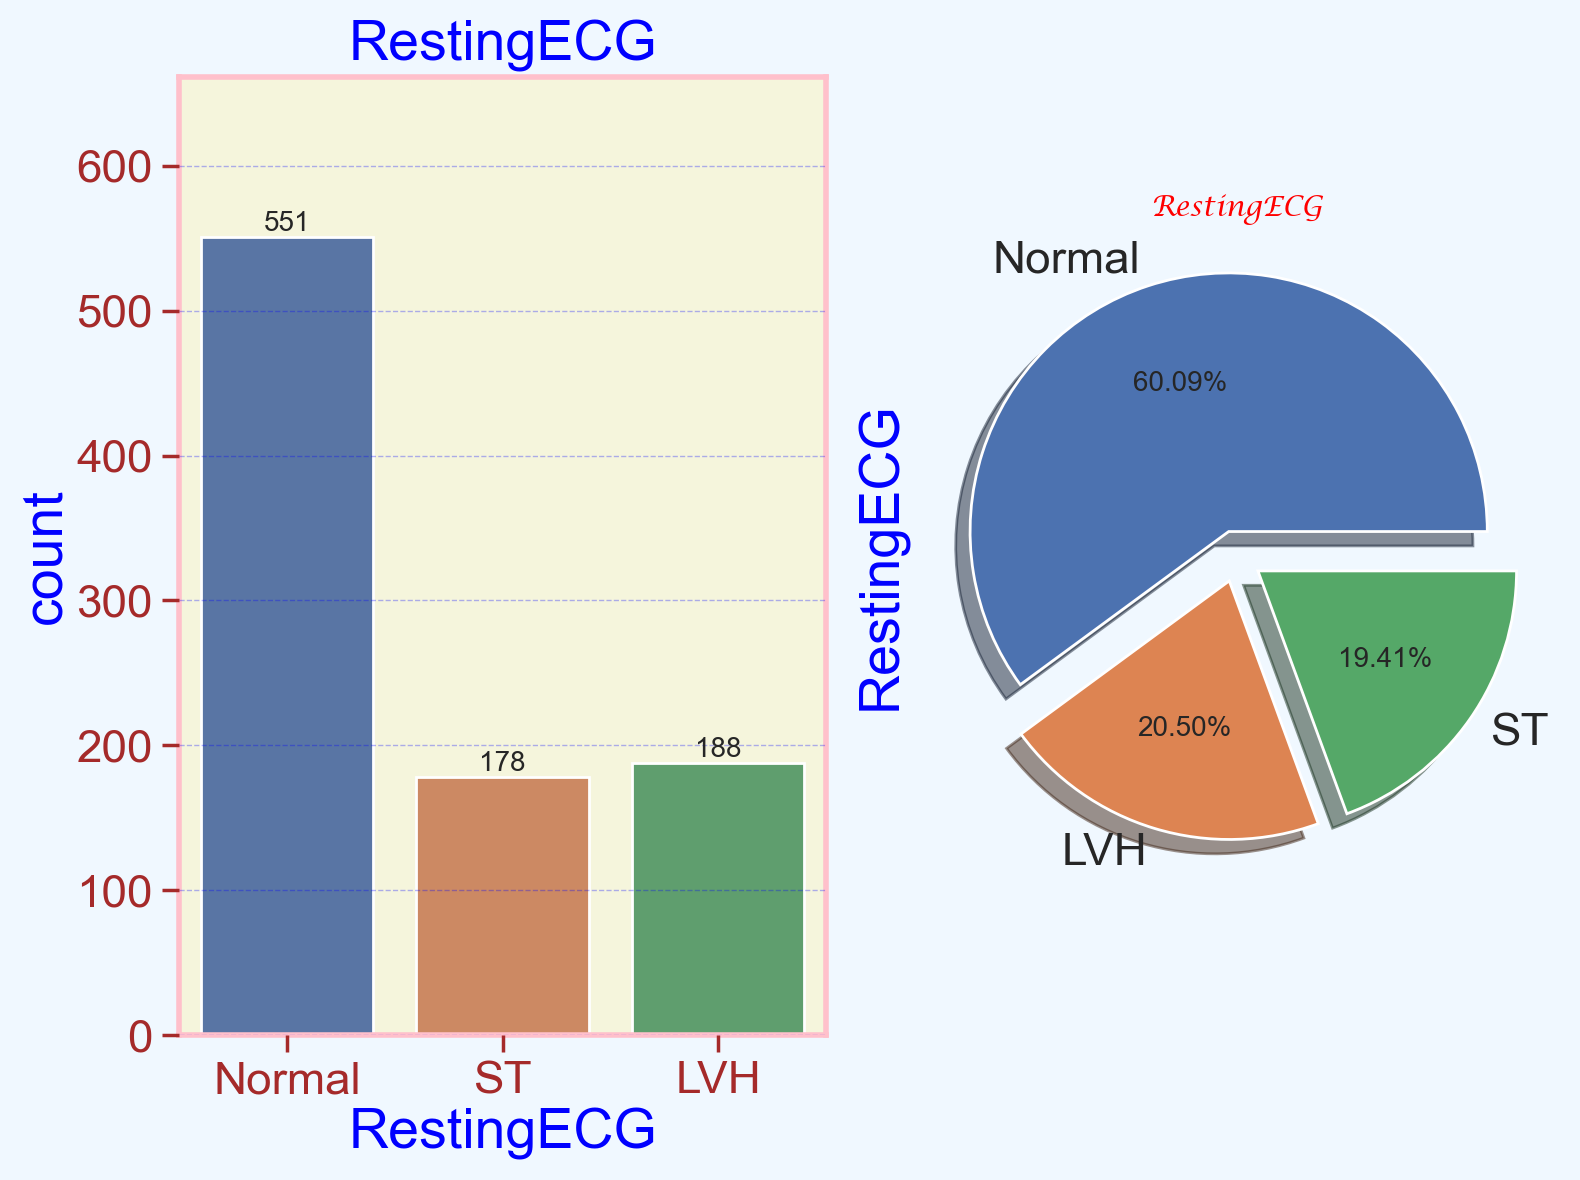

In [43]:
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='RestingECG',data=heart)
ax.bar_label(ax.containers[0])
plt.title("RestingECG", fontsize=20)
ax =plt.subplot(1,2,2)
ax =heart['RestingECG'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "RestingECG", fontsize = 20,color='Red',font='Lucida Calligraphy');

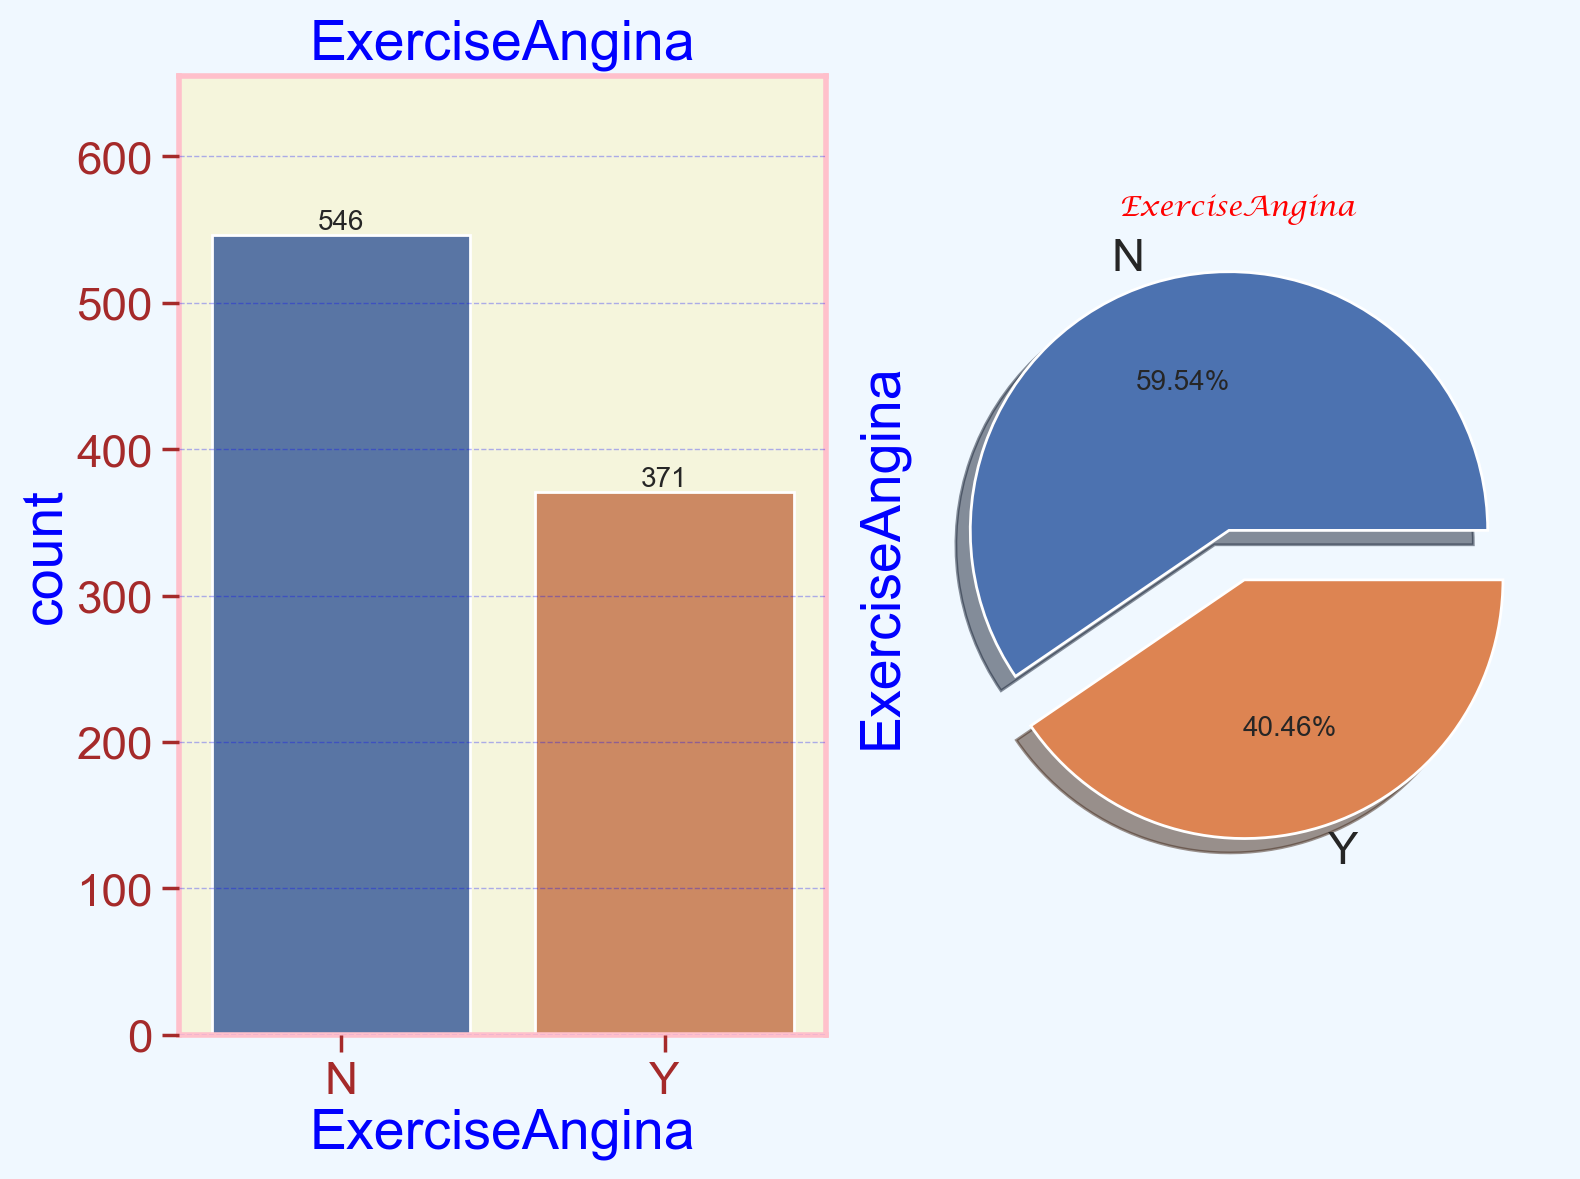

In [44]:
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='ExerciseAngina', data=heart)
ax.bar_label(ax.containers[0])
plt.title("ExerciseAngina", fontsize=20)
ax = plt.subplot(1,2,2)
ax = heart['ExerciseAngina'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "ExerciseAngina", fontsize = 20,color='Red',font='Lucida Calligraphy');


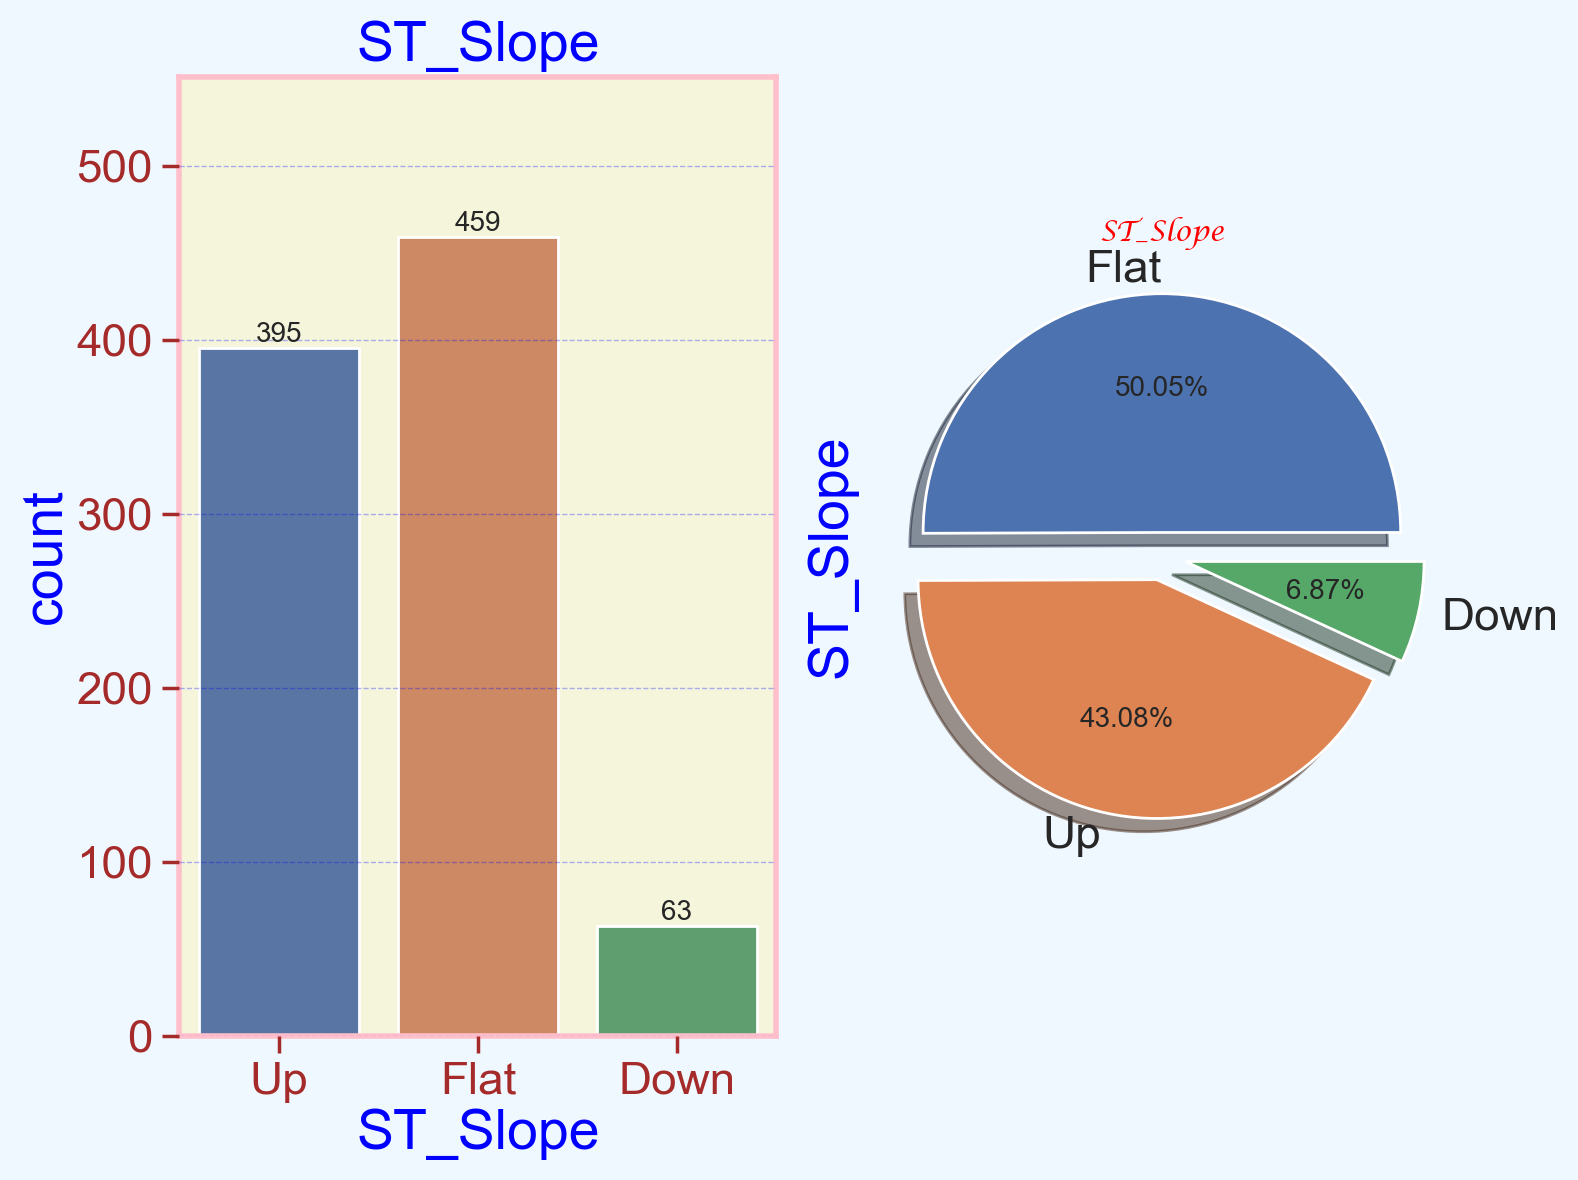

In [45]:
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='ST_Slope',data=heart)
ax.bar_label(ax.containers[0])
plt.title("ST_Slope", fontsize=20)
ax = plt.subplot(1,2,2)
ax = heart['ST_Slope'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "ST_Slope", fontsize = 20,color='Red',font='Lucida Calligraphy');

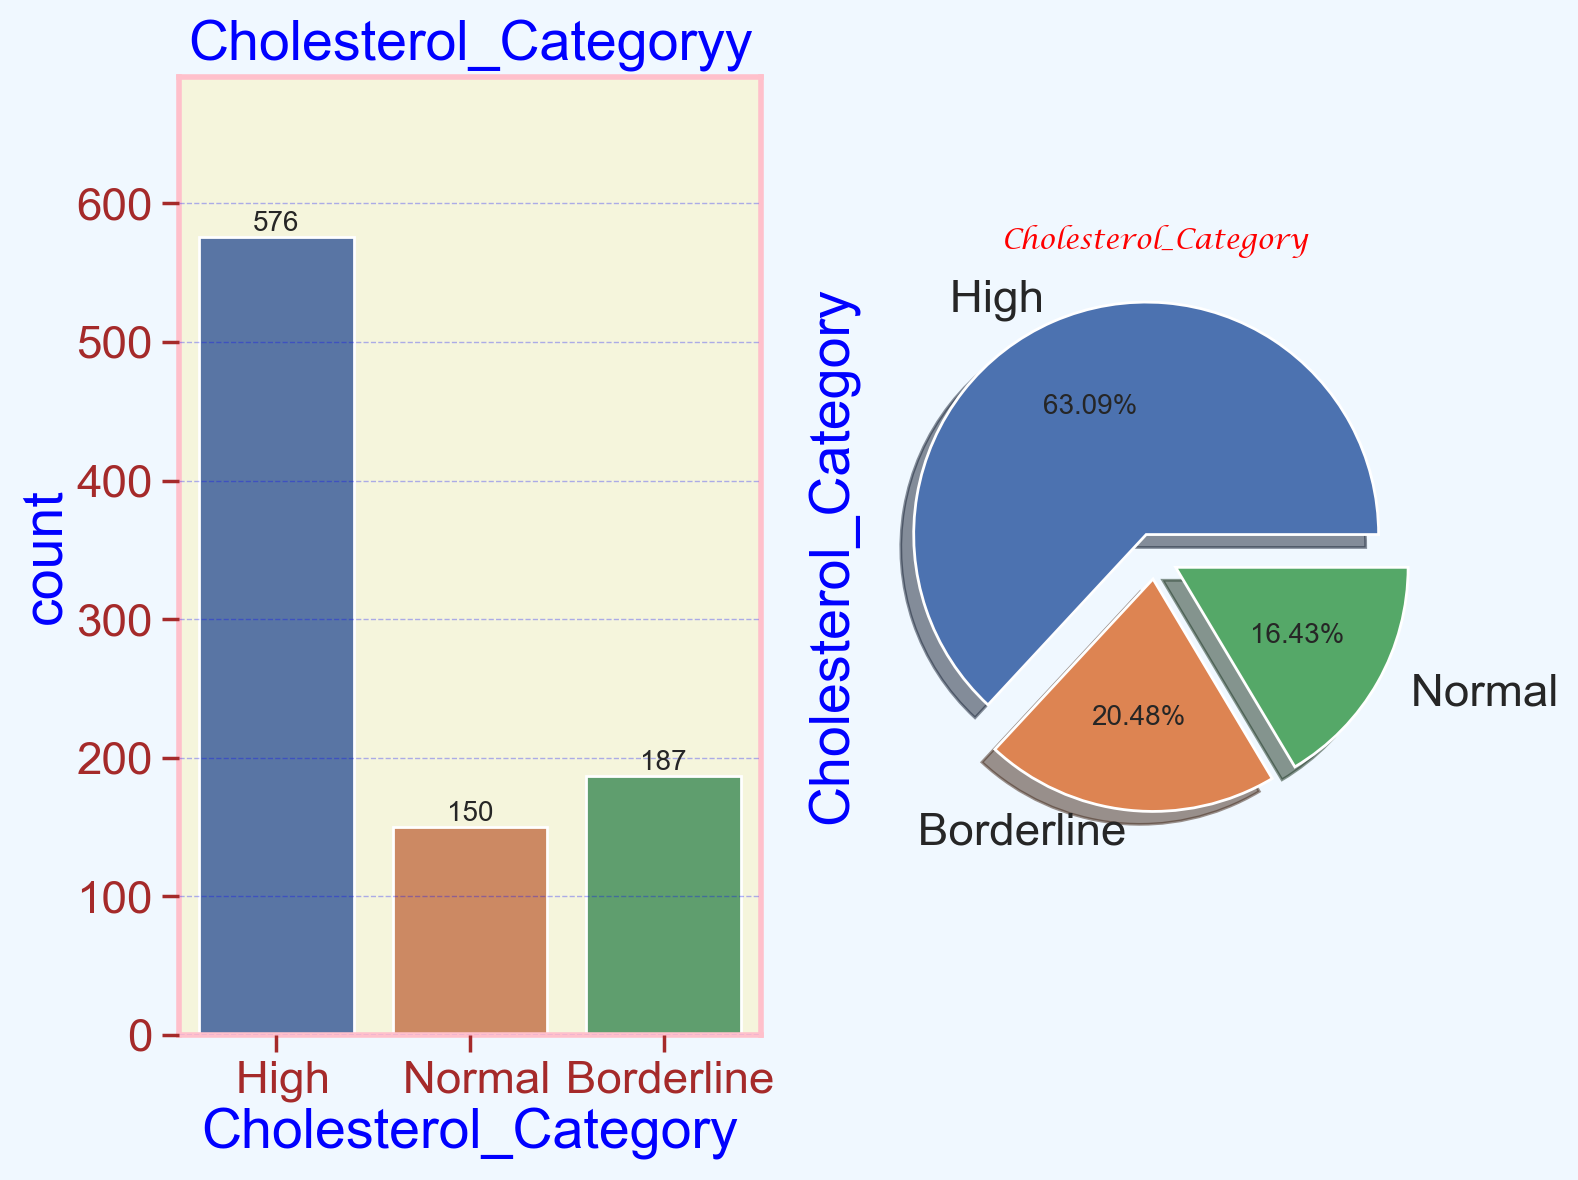

In [46]:
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Cholesterol_Category', data=heart)
ax.bar_label(ax.containers[0])
plt.title("Cholesterol_Categoryy", fontsize=20)
ax = plt.subplot(1,2,2)
ax = heart['Cholesterol_Category'].value_counts().plot.pie(explode=[0.1, 0.1,0.1],autopct='%1.2f%%',shadow=True)
ax.set_title(label = "Cholesterol_Category", fontsize = 20,color='Red',font='Lucida Calligraphy');


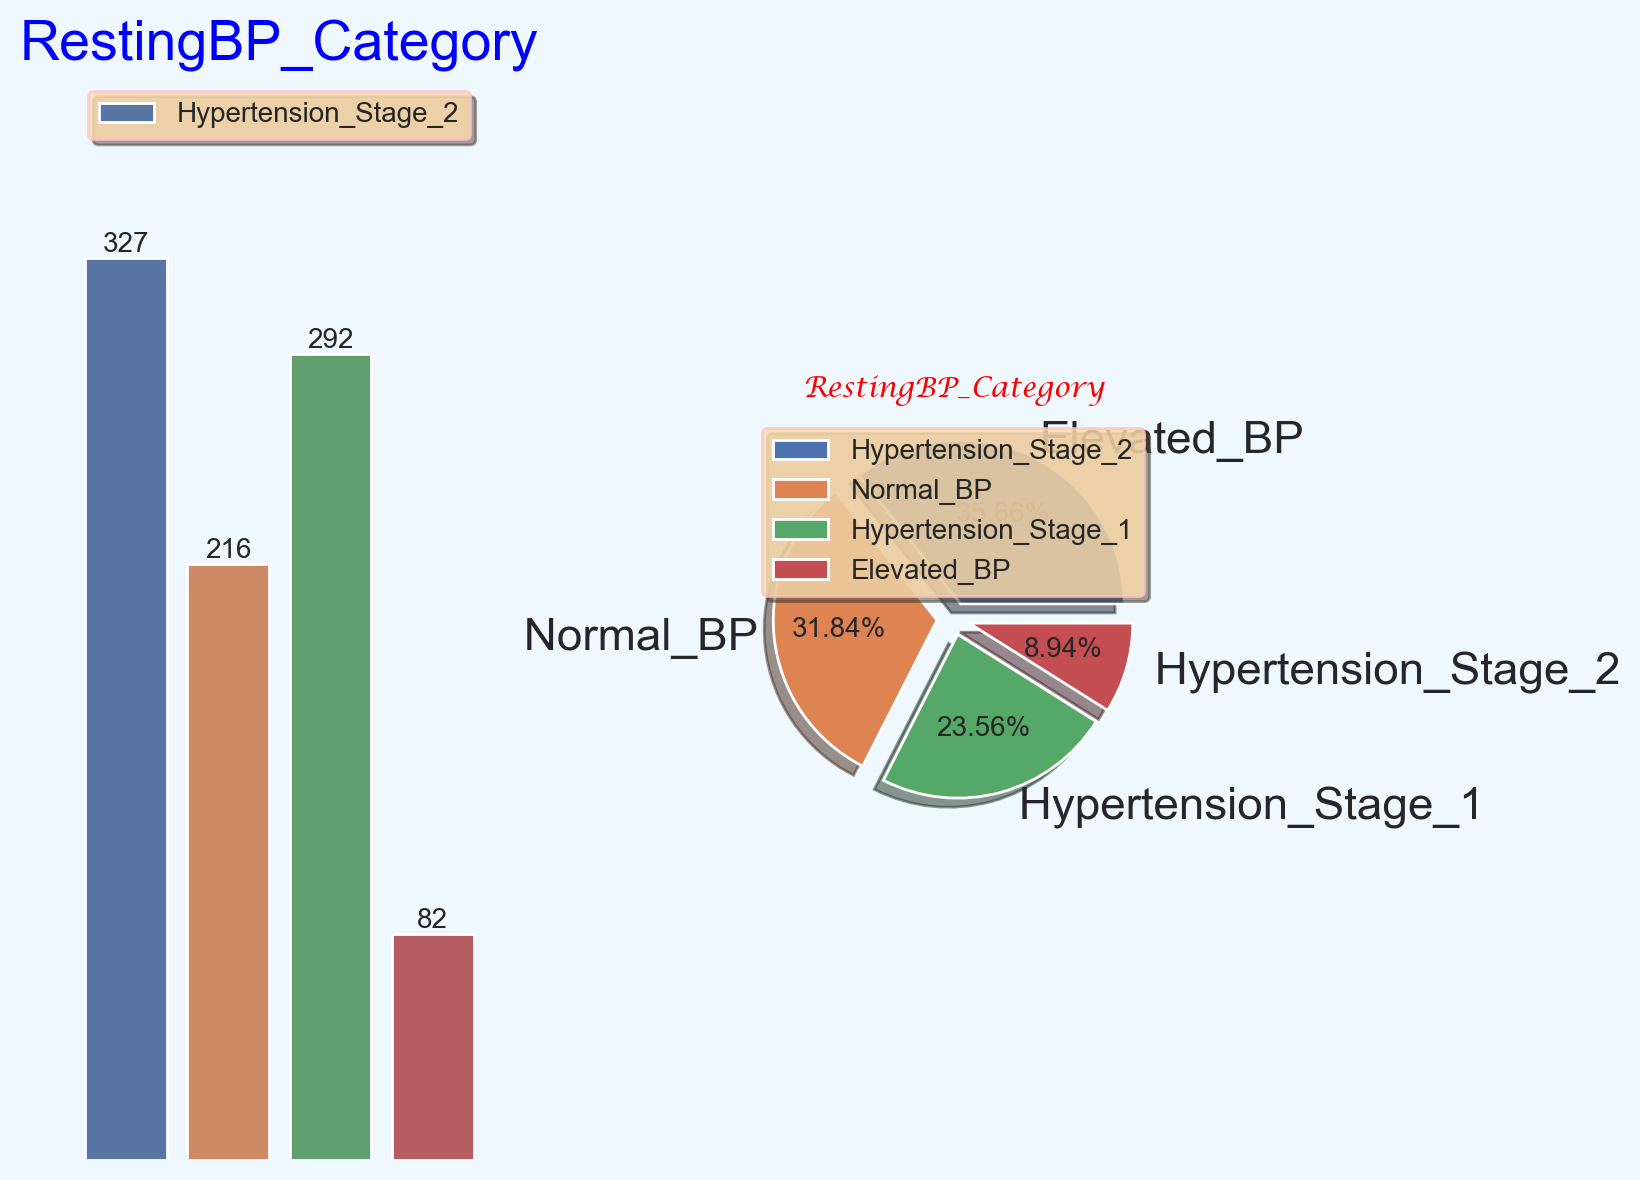

In [47]:
plt.rcParams['legend.fontsize'] = 10
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='RestingBP_Category', data=heart)
ax.bar_label(ax.containers[0])
plt.title("RestingBP_Category", fontsize=20)
plt.legend(labels=['M','F'])
plt.legend(labels=['Hypertension_Stage_2','Normal_BP','Hypertension_Stage_1','Elevated_BP'])
plt.axis('off');
ax =plt.subplot(1,2,2)
ax=heart['RestingBP_Category'].value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1],autopct='%1.2f%%',shadow=True)
ax.set_title(label = "RestingBP_Category", fontsize = 20,color='Red',font='Lucida Calligraphy');
plt.legend(labels=['Hypertension_Stage_2','Normal_BP','Hypertension_Stage_1','Elevated_BP'])
plt.axis('off');

In [48]:
corr = heart.groupby(["ChestPainType"])[["Age","RestingBP"]].corr()
corr.head()


Age  RestingBP
ChestPainType                           
ASY           Age        1.00       0.25
              RestingBP  0.25       1.00
ATA           Age        1.00       0.27
              RestingBP  0.27       1.00
NAP           Age        1.00       0.23

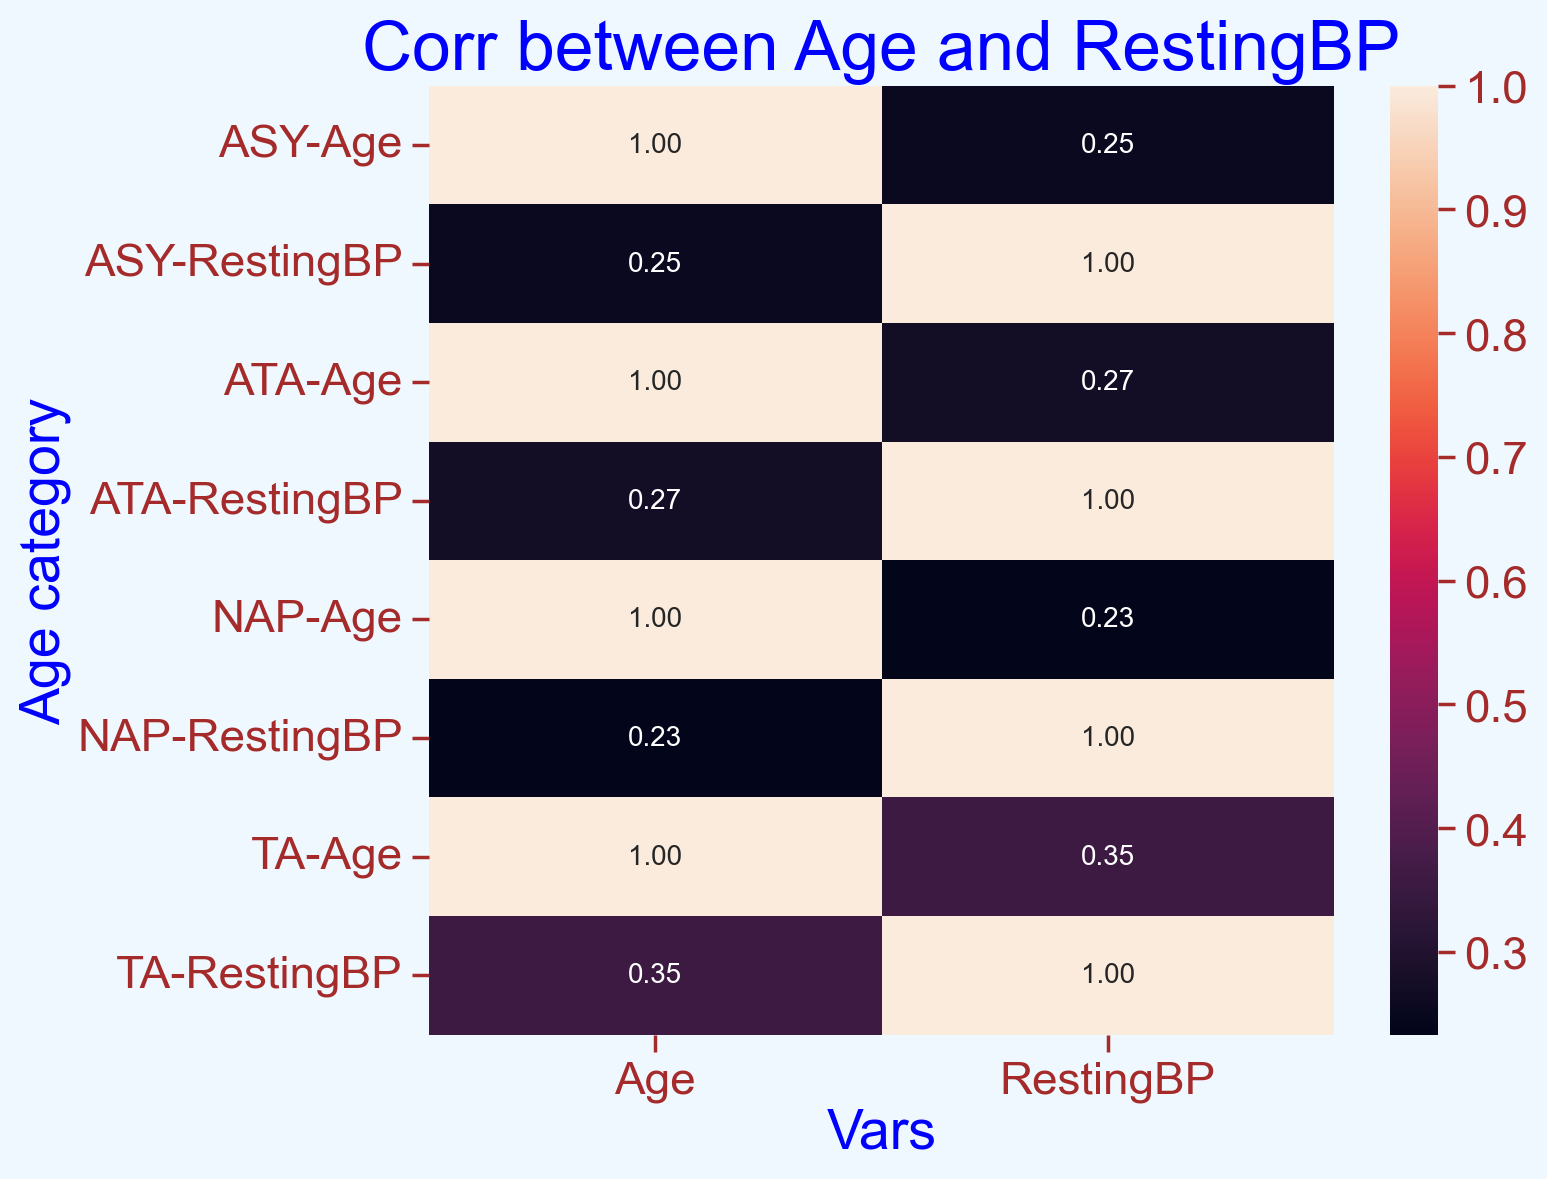

In [49]:
sns.heatmap(corr, annot=True, fmt =".2f")
plt.xlabel("Vars")
plt.ylabel("Age category")
plt.title("Corr between Age and RestingBP")
plt.show()

In [50]:
#Displaying all correlations with ascending sort.
heart.corr().unstack().sort_values(ascending=False).drop_duplicates()

Age                  Age                    1.00e+00
Oldpeak              HeartDisease           4.04e-01
HeartDisease         Age                    2.82e-01
FastingBS            HeartDisease           2.68e-01
RestingBP            Age                    2.63e-01
Oldpeak              Age                    2.59e-01
Age                  FastingBS              1.98e-01
Oldpeak              RestingBP              1.74e-01
HeartDisease         RestingBP              1.18e-01
Cholesterol          RestingBP              8.61e-02
HeartDisease         Cholesterol            7.63e-02
FastingBS            RestingBP              6.78e-02
Cholesterol          Oldpeak                5.46e-02
FastingBS            Oldpeak                5.31e-02
Cholesterol          Age                    4.56e-02
Diastolic_RestingBP  FastingBS              4.12e-02
FastingBS            Cholesterol            2.49e-02
MaxHR                Diastolic_RestingBP    8.03e-03
HeartDisease         Diastolic_RestingBP    9.

In [51]:
print(heart['ChestPainType'][heart['Sex']=='F'].value_counts(normalize=True)*100)


ASY    36.27
ATA    31.09
NAP    27.46
TA      5.18
Name: ChestPainType, dtype: float64


In [52]:
print('ChestPainType in Females:\n')
print(heart['ChestPainType'][heart['Sex']=='F'].value_counts(normalize=True)*100)
print("********"*5,"\n")
print('ChestPainType in Males:\n')
print(heart['ChestPainType'][heart['Sex']=='M'].value_counts(normalize=True)*100)

ChestPainType in Females:

ASY    36.27
ATA    31.09
NAP    27.46
TA      5.18
Name: ChestPainType, dtype: float64
**************************************** 

ChestPainType in Males:

ASY    58.84
NAP    20.58
ATA    15.61
TA      4.97
Name: ChestPainType, dtype: float64


In [53]:
print('ST_Slope in Females:\n')
print(heart['ST_Slope'][heart['Sex']=='F'].value_counts(normalize=True)*100)
print("********"*5,"\n")
print('ST_Slope in Males:\n')
print(heart['ST_Slope'][heart['Sex']=='M'].value_counts(normalize=True)*100)

ST_Slope in Females:

Up      57.51
Flat    38.86
Down     3.63
Name: ST_Slope, dtype: float64
**************************************** 

ST_Slope in Males:

Flat    53.04
Up      39.23
Down     7.73
Name: ST_Slope, dtype: float64


In [54]:
print('Heart Disease in Females:\n')
print(heart['HeartDisease'][heart['Sex']=='F'].value_counts(normalize=True)*100)
print("********"*5,"\n")
print('Heart Disease in Males:\n')
print(heart['HeartDisease'][heart['Sex']=='M'].value_counts(normalize=True)*100)

Heart Disease in Females:

0    74.09
1    25.91
Name: HeartDisease, dtype: float64
**************************************** 

Heart Disease in Males:

1    63.12
0    36.88
Name: HeartDisease, dtype: float64


In [55]:
print('Heart Disease in RestingECG:\n')
print(heart['RestingECG'][heart['HeartDisease']== 1].value_counts(normalize=True)*100)
print("********"*5,"\n")
print('Heart Disease in RestingECG:\n')
print(heart['RestingECG'][heart['HeartDisease']== 0 ].value_counts(normalize=True)*100)

Heart Disease in RestingECG:

Normal    56.02
ST        23.08
LVH       20.91
Name: RestingECG, dtype: float64
**************************************** 

Heart Disease in RestingECG:

Normal    65.12
LVH       20.00
ST        14.88
Name: RestingECG, dtype: float64


In [56]:
print('Heart Disease in RestingBP_Category:\n')
print(heart['RestingBP_Category'][heart['HeartDisease']== 1].value_counts(normalize=True)*100)
print("********"*5,"\n")
print('Heart Disease in RestingBP_Category:\n')
print(heart['RestingBP_Category'][heart['HeartDisease']== 0].value_counts(normalize=True)*100)

Heart Disease in RestingBP_Category:

Elevated_BP              40.43
 Normal_BP               28.01
 Hypertension_Stage_1    21.50
 Hypertension_Stage_2    10.06
Name: RestingBP_Category, dtype: float64
**************************************** 

Heart Disease in RestingBP_Category:

 Normal_BP               36.59
Elevated_BP              29.76
 Hypertension_Stage_1    26.10
 Hypertension_Stage_2     7.56
Name: RestingBP_Category, dtype: float64


In [57]:
heart_final = heart.drop(['RestingBP','Cholesterol',],axis=1)
heart_final.head()

Age Sex ChestPainType  FastingBS RestingECG  MaxHR ExerciseAngina  Oldpeak  \
0   40   M           ATA          0     Normal    172              N      0.0   
1   49   F           NAP          0     Normal    156              N      1.0   
2   37   M           ATA          0         ST     98              N      0.0   
3   48   F           ASY          0     Normal    108              Y      1.5   
4   54   M           NAP          0     Normal    122              N      0.0   

  ST_Slope  HeartDisease  Diastolic_RestingBP     RestingBP_Category  \
0       Up             0                    0            Elevated_BP   
1     Flat             1                    0            Elevated_BP   
2       Up             0                    0   Hypertension_Stage_1   
3     Flat             1                    0   Hypertension_Stage_1   
4       Up             0                    0            Elevated_BP   

  Cholesterol_Category  
0                 High  
1               Normal  
2                 High  
3           Borderline  
4               Normal

<h1>Converting Categorial Variable into numerical Variable</h1>

In [58]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['ChestPainType','RestingECG','ST_Slope','Cholesterol_Category','RestingBP_Category'])
heart_final = encoder.fit_transform(heart_final)

heart_final.head()

Age Sex  ChestPainType  FastingBS  RestingECG  MaxHR ExerciseAngina  \
0   40   M              1          0           1    172              N   
1   49   F              2          0           1    156              N   
2   37   M              1          0           2     98              N   
3   48   F              3          0           1    108              Y   
4   54   M              2          0           1    122              N   

   Oldpeak  ST_Slope  HeartDisease  Diastolic_RestingBP  RestingBP_Category  \
0      0.0         1             0                    0                   1   
1      1.0         2             1                    0                   1   
2      0.0         1             0                    0                   2   
3      1.5         2             1                    0                   2   
4      0.0         1             0                    0                   1   

   Cholesterol_Category  
0                     1  
1                     2  
2                     1  
3                     3  
4                     2

In [59]:
import category_encoders as ce
encoder = ce.OneHotEncoder(cols=['Sex','ExerciseAngina'],drop_invariant=True)
heart_final1 = encoder.fit_transform(heart_final)
heart_final1.head()

Age  Sex_1  Sex_2  ChestPainType  FastingBS  RestingECG  MaxHR  \
0   40      1      0              1          0           1    172   
1   49      0      1              2          0           1    156   
2   37      1      0              1          0           2     98   
3   48      0      1              3          0           1    108   
4   54      1      0              2          0           1    122   

   ExerciseAngina_1  ExerciseAngina_2  Oldpeak  ST_Slope  HeartDisease  \
0                 1                 0      0.0         1             0   
1                 1                 0      1.0         2             1   
2                 1                 0      0.0         1             0   
3                 0                 1      1.5         2             1   
4                 1                 0      0.0         1             0   

   Diastolic_RestingBP  RestingBP_Category  Cholesterol_Category  
0                    0                   1                     1  
1                    0                   1                     2  
2                    0                   2                     1  
3                    0                   2                     3  
4                    0                   1                     2

<h1> Training and Tesing Data Split</h1>

In [60]:
X = heart_final1.drop('HeartDisease',axis=1)
y = heart_final1['HeartDisease']

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

<h1> Standardizing	the	data	by	using	MinMaxScaler</h1>

In [62]:
# scaling dataset with robust scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)
display(X_train.head())
display(X_test.head())

Age  Sex_1  Sex_2  ChestPainType  FastingBS  RestingECG  MaxHR  \
0  0.53    1.0    0.0           0.33        0.0         0.0   0.44   
1  0.53    0.0    1.0           0.00        0.0         0.5   0.56   
2  0.55    1.0    0.0           0.67        0.0         0.0   0.51   
3  0.31    0.0    1.0           0.33        0.0         0.0   0.81   
4  0.45    1.0    0.0           0.67        0.0         0.5   0.56   

   ExerciseAngina_1  ExerciseAngina_2  Oldpeak  ST_Slope  Diastolic_RestingBP  \
0               1.0               0.0     0.30       0.0                  0.0   
1               1.0               0.0     0.30       0.0                  0.0   
2               0.0               1.0     0.43       0.5                  0.0   
3               1.0               0.0     0.30       0.0                  0.0   
4               0.0               1.0     0.86       0.5                  0.0   

   RestingBP_Category  Cholesterol_Category  
0                0.00                  0.33  
1                0.00                  0.00  
2                0.33                  0.00  
3                0.00                  0.00  
4                0.00                  0.00

Age  Sex_1  Sex_2  ChestPainType  FastingBS  RestingECG  MaxHR  \
0  0.59    0.0    1.0           1.00        0.0         0.0   0.27   
1  0.31    1.0    0.0           0.67        0.0         0.0   0.42   
2  0.24    1.0    0.0           0.67        1.0         0.0   0.65   
3  0.31    1.0    0.0           0.67        0.0         1.0   0.42   
4  0.61    1.0    0.0           0.00        1.0         0.0   0.35   

   ExerciseAngina_1  ExerciseAngina_2  Oldpeak  ST_Slope  Diastolic_RestingBP  \
0               1.0               0.0     0.41       0.5                  0.0   
1               0.0               1.0     0.41       0.5                  0.0   
2               0.0               1.0     0.41       0.5                  0.0   
3               0.0               1.0     0.58       0.5                  0.0   
4               0.0               1.0     0.52       0.5                  0.0   

   RestingBP_Category  Cholesterol_Category  
0                0.33                  0.00  
1                0.67                  0.33  
2                0.67                  0.00  
3                0.67                  0.33  
4                1.00                  0.00

<h1>Model Building</h1>

 <h2>Logistic Regression Model</h2>

In [63]:
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['font.size'] = 20
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)
log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_log, y_test) * 100, 2)
log_f1 = round(f1_score(y_pred_log, y_test) * 100, 2)
print("Training Accuracy:",log_train,"%")
print("Model Accuracy Score :",log_accuracy,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_log))


Training Accuracy: 85.13 %
Model Accuracy Score : 83.7 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.80      0.80      0.80        76
           1       0.86      0.86      0.86       108

    accuracy                           0.84       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184



<h2>Confusion Matrix</h2>

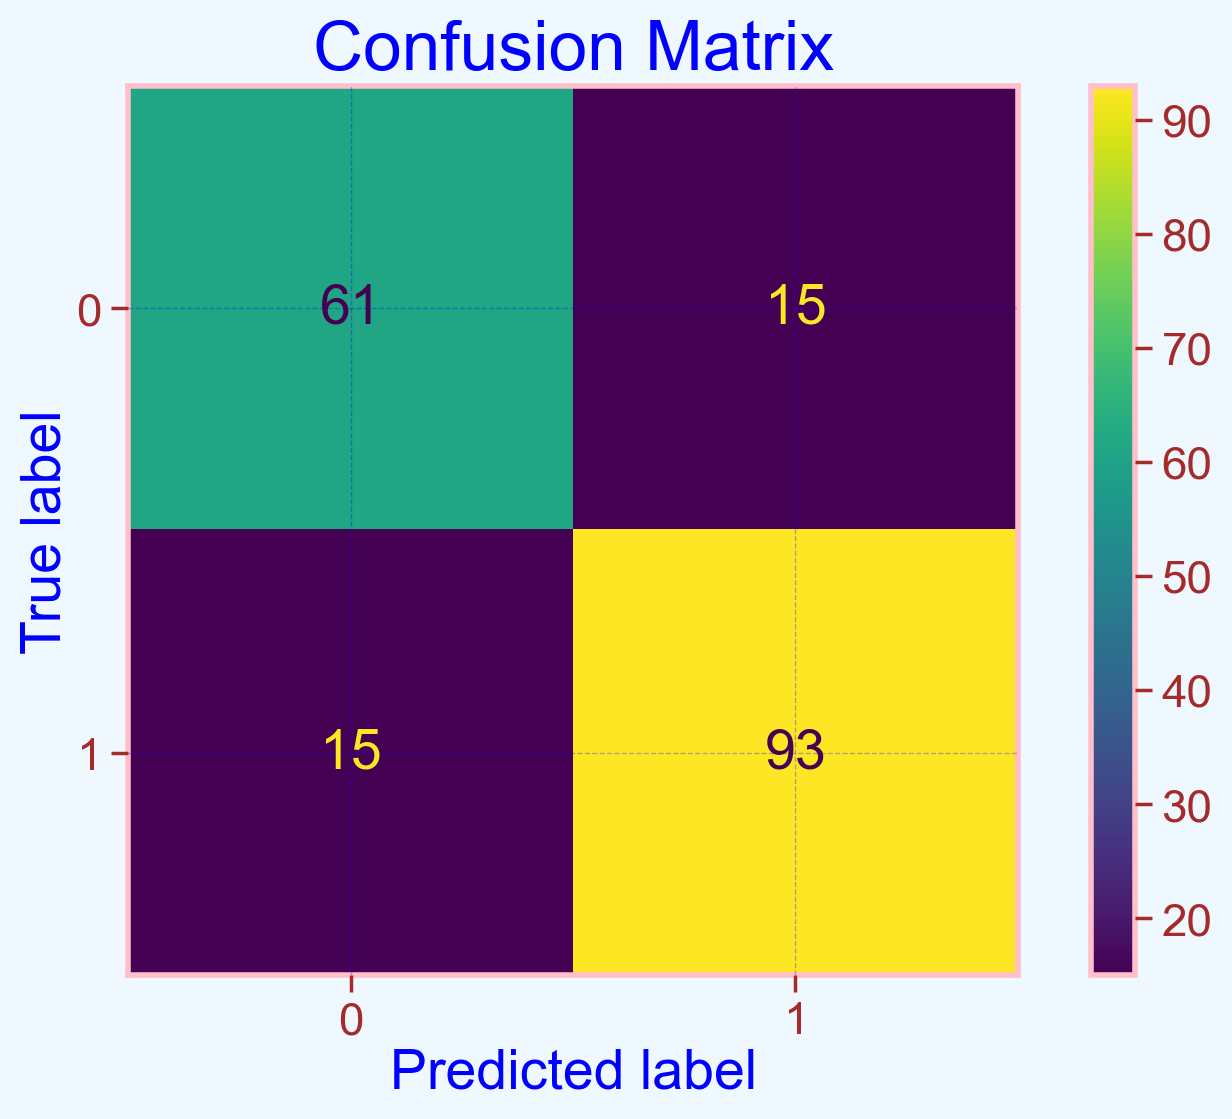

In [64]:
plot_confusion_matrix(logreg, X_test, y_test);
plt.title('Confusion Matrix');


<h2>ROC	Curve</h2>

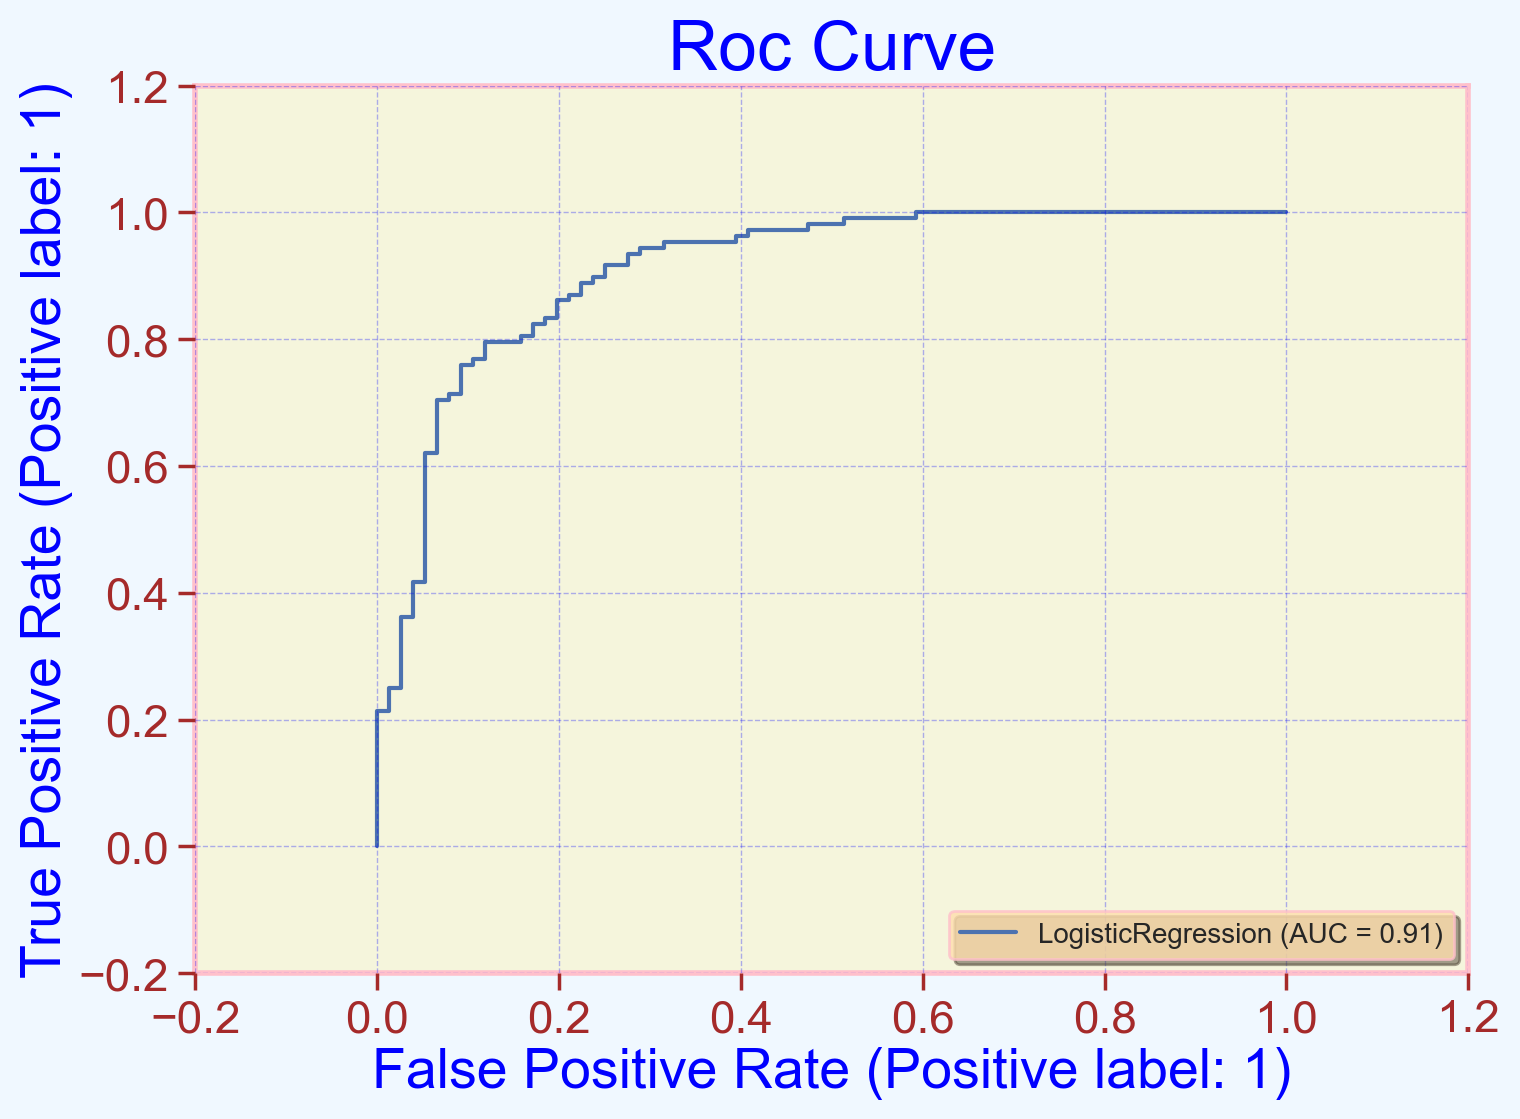

In [65]:
plot_roc_curve(logreg, X_test, y_test);
plt.title('Roc Curve');


<h2>Precision Recall Curve</h2>

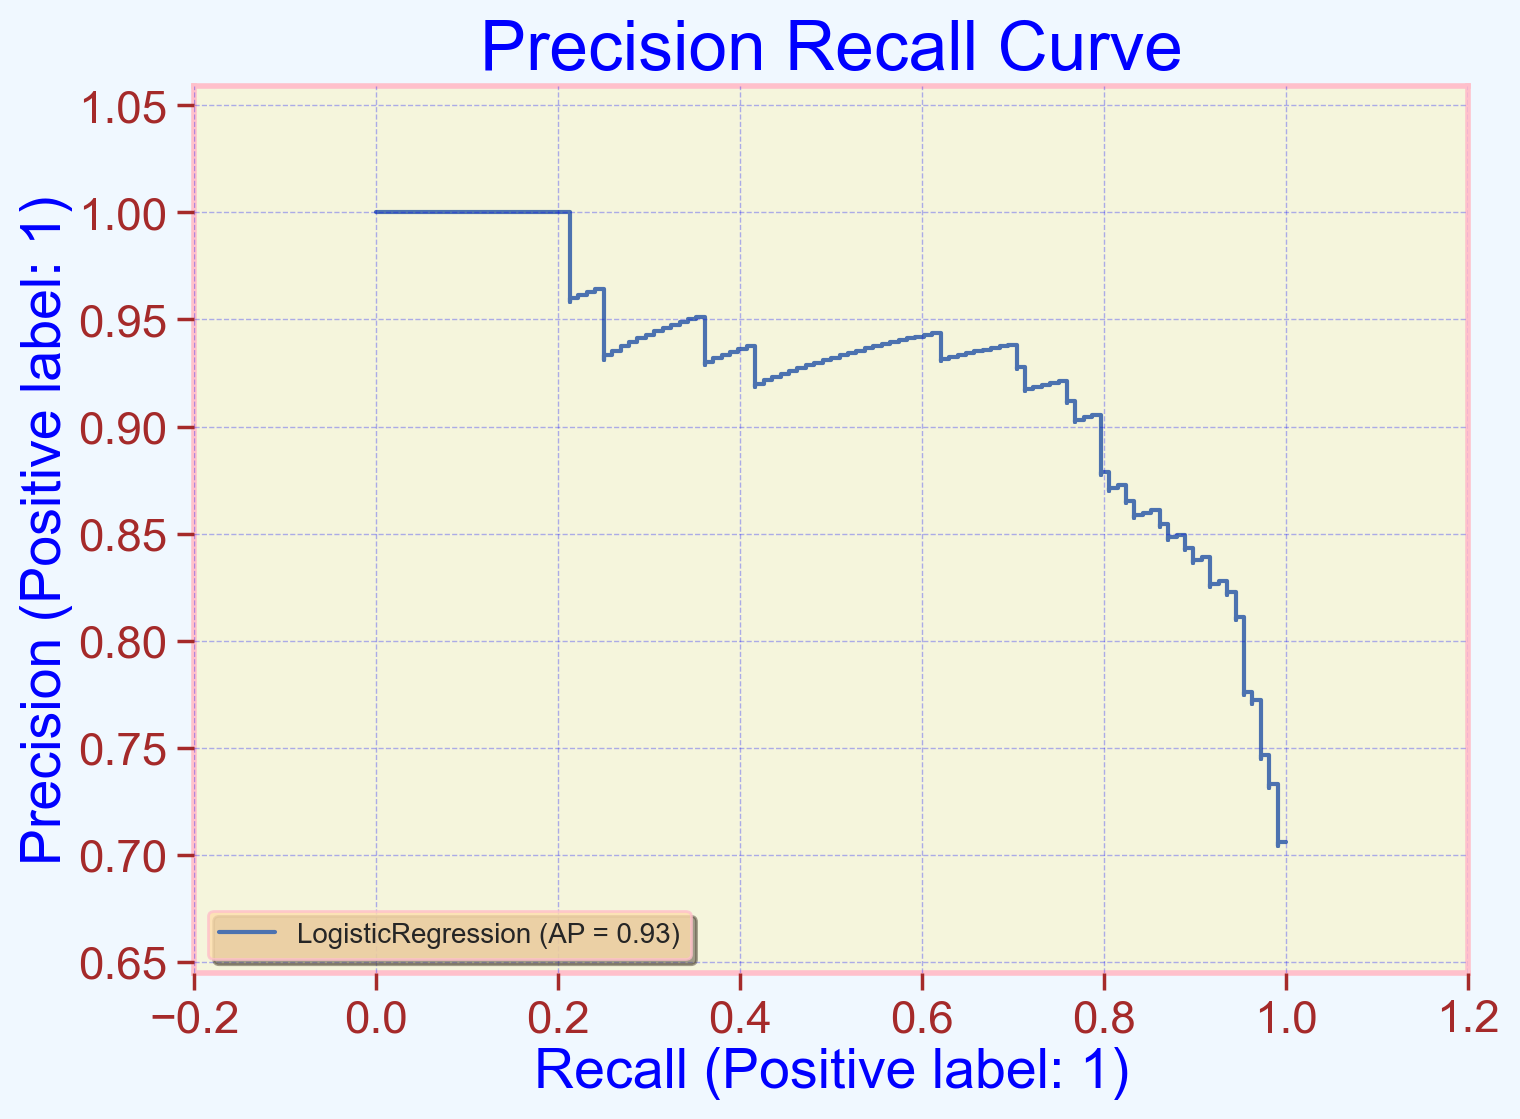

In [66]:
plot_precision_recall_curve(logreg, X_test, y_test)
plt.title('Precision Recall Curve');

<h2>Cross val Score</h2>

In [67]:
from sklearn.model_selection import cross_val_score
val_score = cross_val_score(estimator=logreg, X = X_train, y=y_train, cv=10)
print("Model Accuracy Score: {:.2f} %".format(val_score.mean()*100))
print("Std. Dev: {:.2f} %".format(val_score.std()*100))


Model Accuracy Score: 84.85 %
Std. Dev: 2.36 %


<h2>Support	Vector	Machines</h2>

In [68]:
#Support Vector Machines
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred_svc, y_test) * 100,	2)
svc_f1 = round(f1_score(y_pred_svc, y_test) * 100, 2)
print("Training Accuracy:",svc_train,"%")
print("Model Accuracy Score:",svc_accuracy,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report:\n",classification_report(y_test,y_pred_svc))


Training Accuracy: 87.31 %
Model Accuracy Score: 88.59 %
--------------------------------------------------------
Classification_Report:
               precision    recall  f1-score   support

           0       0.90      0.82      0.86        76
           1       0.88      0.94      0.91       108

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.88       184



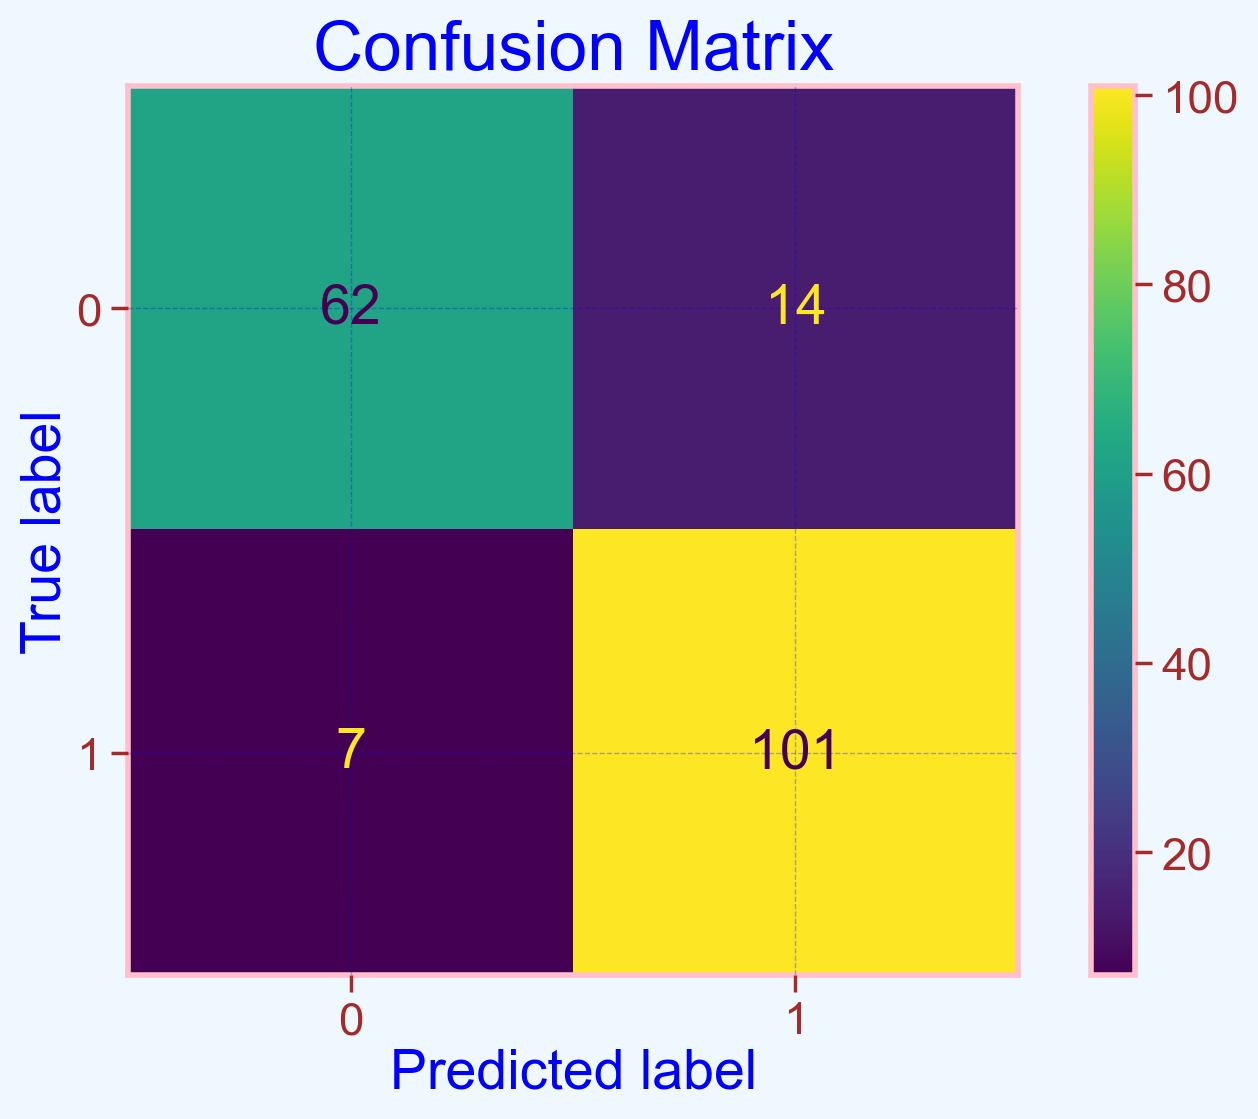

In [69]:
plot_confusion_matrix(svc, X_test, y_test);
plt.title('Confusion Matrix');

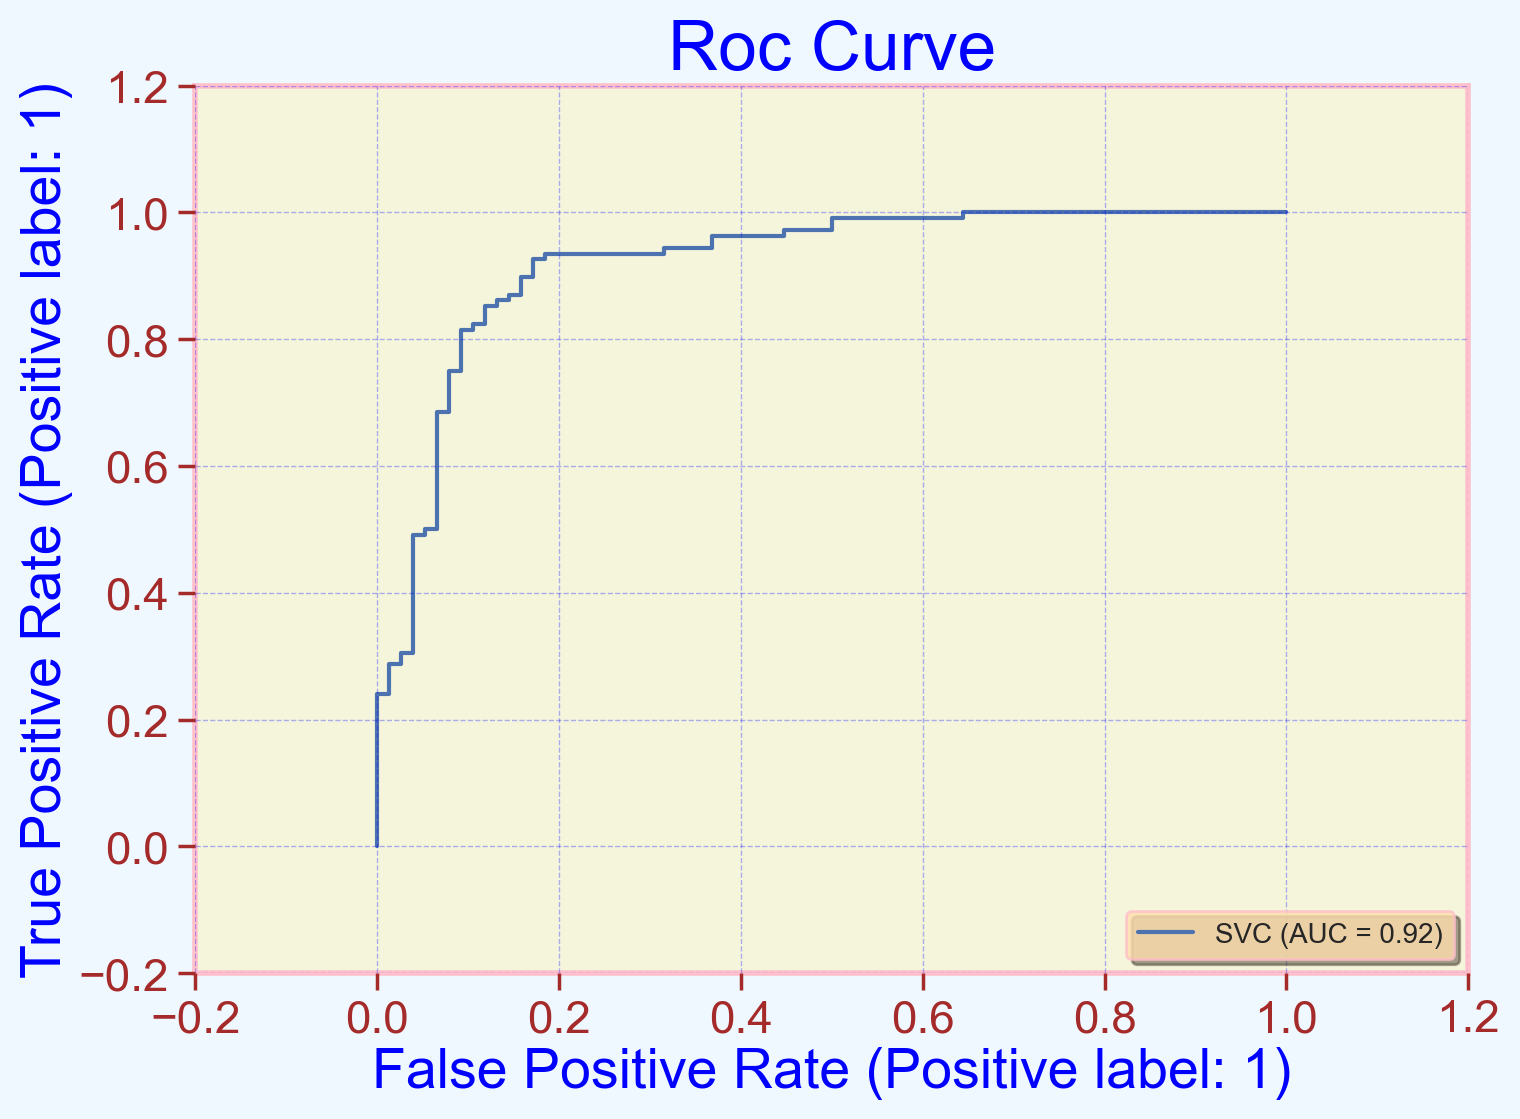

In [70]:
plot_roc_curve(svc, X_test, y_test);
plt.title('Roc Curve');


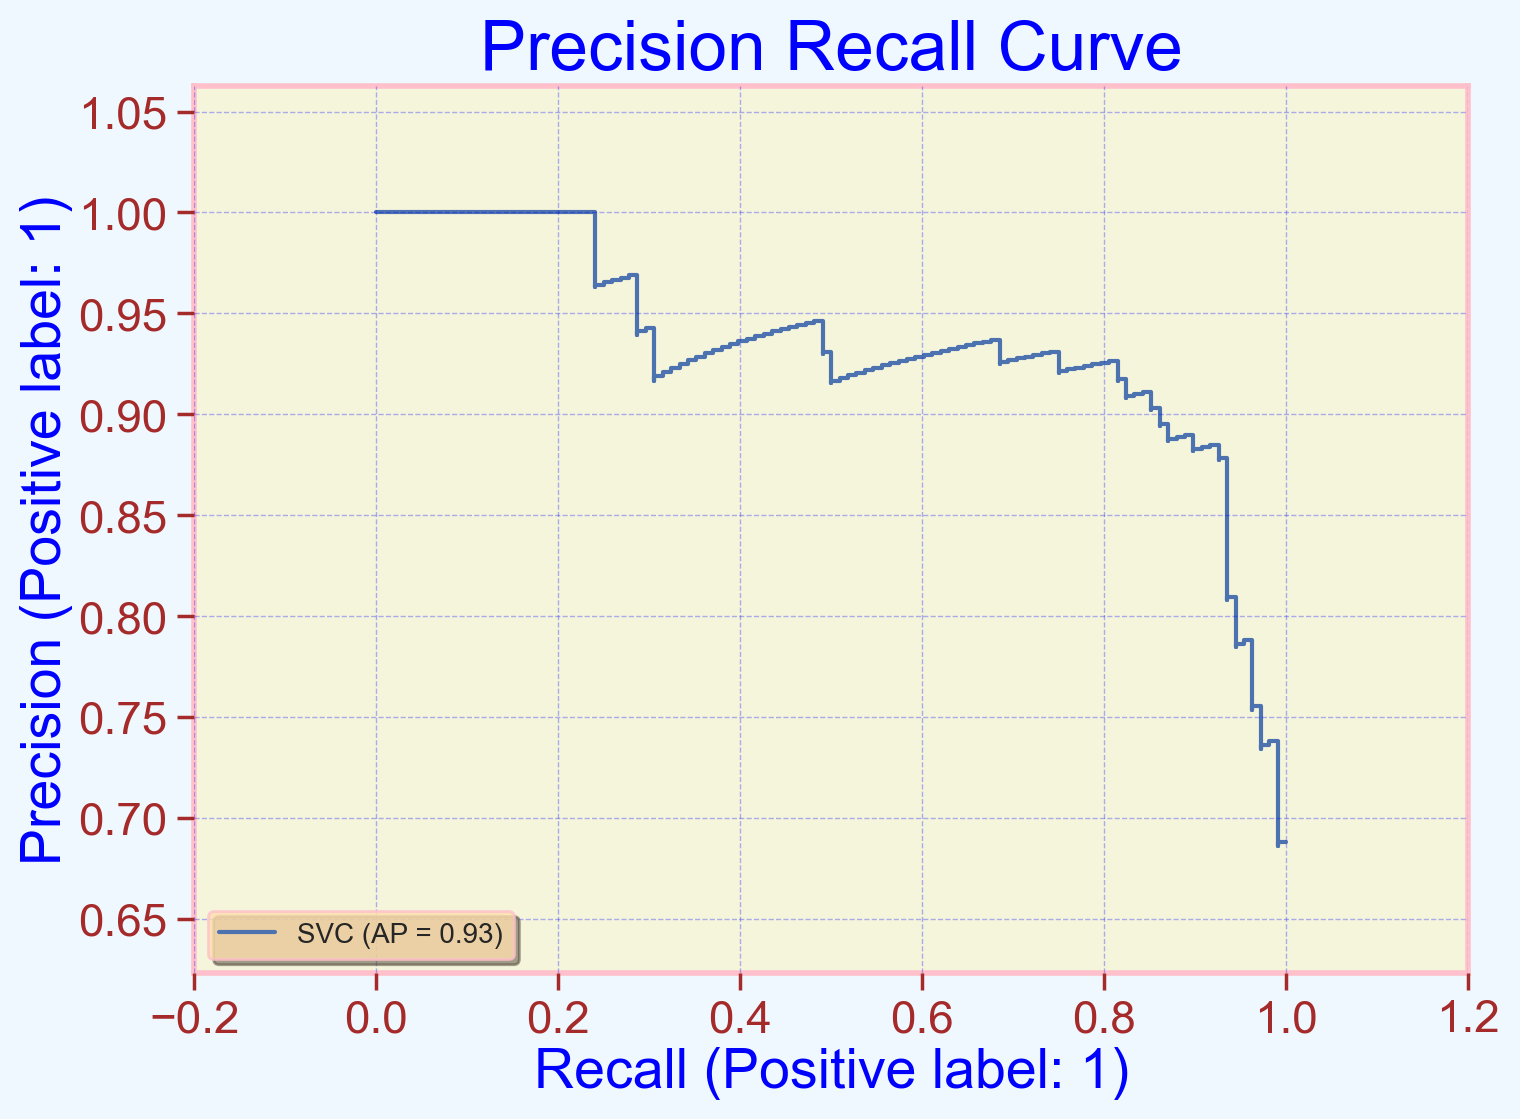

In [71]:
plot_precision_recall_curve(svc, X_test, y_test)
plt.title('Precision Recall Curve');

In [72]:
from sklearn.model_selection import cross_val_score
val_score = cross_val_score(estimator=svc, X = X_train, y=y_train, cv=10)
print("Model Accuracy Score: {:.2f} %".format(val_score.mean()*100))
print("Std. Dev: {:.2f} %".format(val_score.std()*100))

Model Accuracy Score: 84.56 %
Std. Dev: 3.93 %


<h2> KNeighborsClassifier</h2>

In [73]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_train = round(knn.score(X_train, y_train) * 100, 2)
knn_accuracy = round(accuracy_score(y_pred_knn, y_test) * 100, 2)
knn_f1 = round(f1_score(y_pred_knn, y_test) * 100, 2)
print("Training Accuracy:",knn_train,"%")
print("Model Accuracy Score:",knn_accuracy,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_knn))

Training Accuracy: 89.63 %
Model Accuracy Score: 83.15 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.82      0.76      0.79        76
           1       0.84      0.88      0.86       108

    accuracy                           0.83       184
   macro avg       0.83      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184



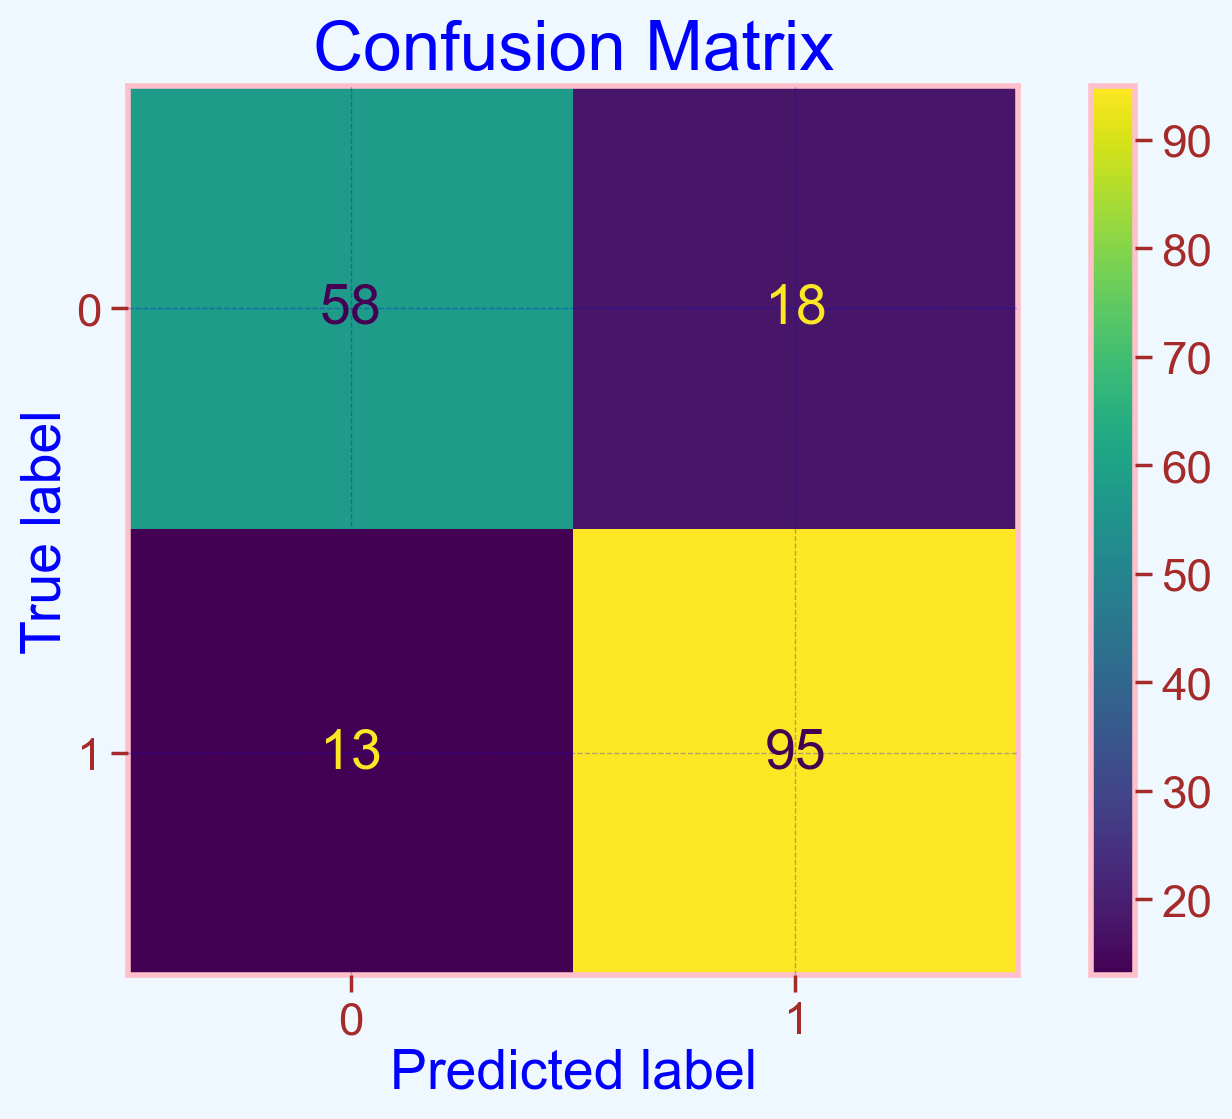

In [74]:
plot_confusion_matrix(knn, X_test, y_test);
plt.title('Confusion Matrix');

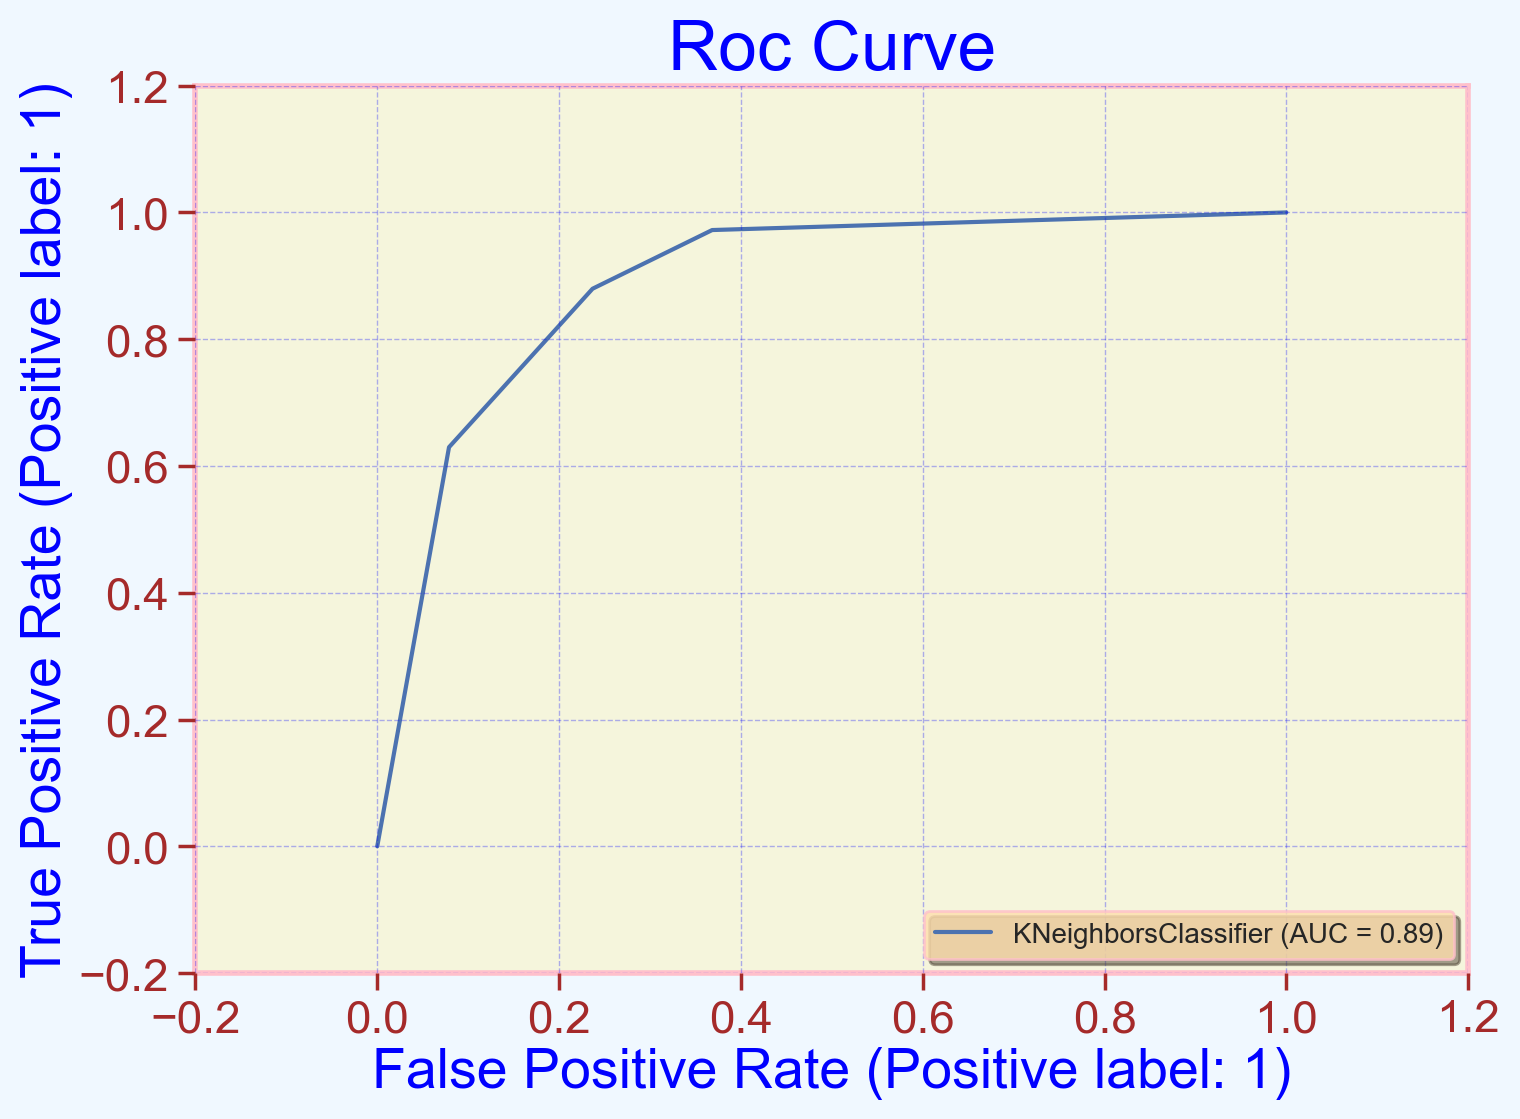

In [75]:
plot_roc_curve(knn, X_test, y_test);
plt.title('Roc Curve');


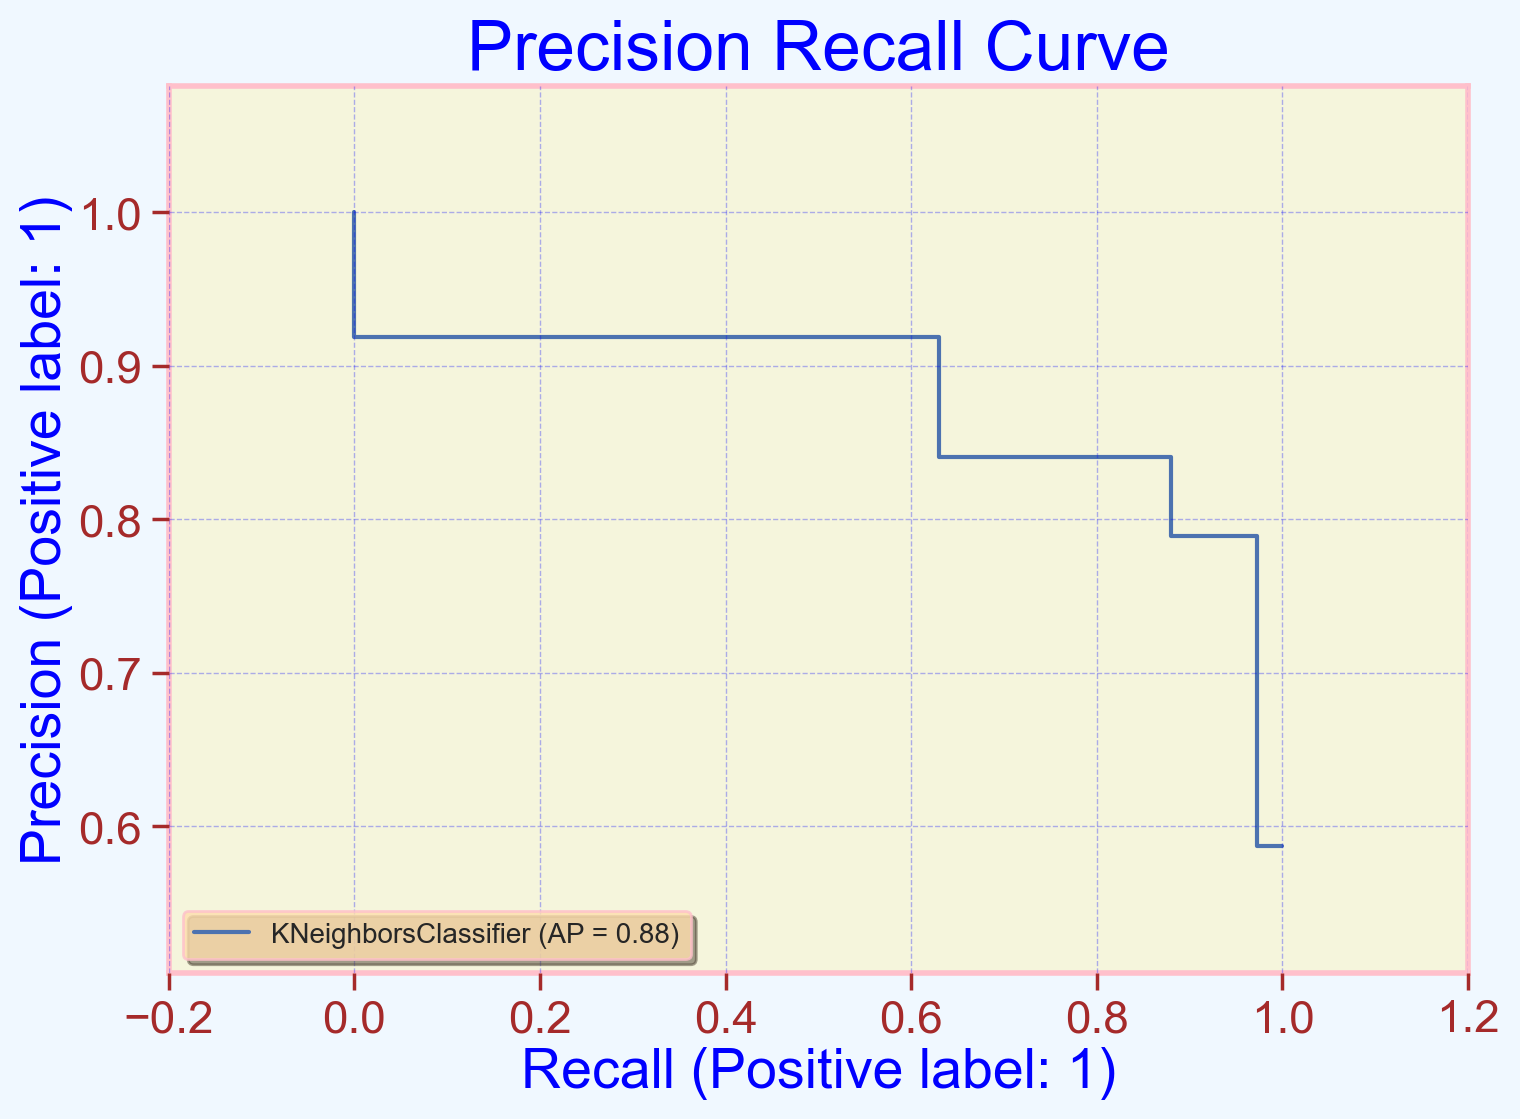

In [76]:
plot_precision_recall_curve(knn, X_test, y_test)
plt.title('Precision Recall Curve');

In [77]:
from sklearn.model_selection import cross_val_score
val_score =	cross_val_score(estimator=knn, X = X_train, y=y_train, cv=10)
print("Model Accuracy Score: {:.2f} %".format(val_score.mean()*100))
print("Std. Dev: {:.2f} %".format(val_score.std()*100))

Model Accuracy Score: 81.98 %
Std. Dev: 3.33 %


 <h2>GaussianNB</h2>

In [78]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import	GaussianNB
gaussian =	GaussianNB()
gaussian.fit(X_train, y_train)
y_pred_NB =	gaussian.predict(X_test)
gaussian_train = round(gaussian.score(X_train,	y_train)	*	100,	2)
gaussian_accuracy = round(accuracy_score(y_pred_NB,	y_test)	*	100,	2)
gaussian_f1 = round(f1_score(y_pred_NB,	y_test)	*	100,	2)
print("Training Accuracy :",gaussian_train,"%")
print("Model Accuracy Score:",gaussian_accuracy,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_NB))

Training Accuracy : 83.77 %
Model Accuracy Score: 82.61 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.76      0.86      0.80        76
           1       0.89      0.81      0.84       108

    accuracy                           0.83       184
   macro avg       0.82      0.83      0.82       184
weighted avg       0.83      0.83      0.83       184



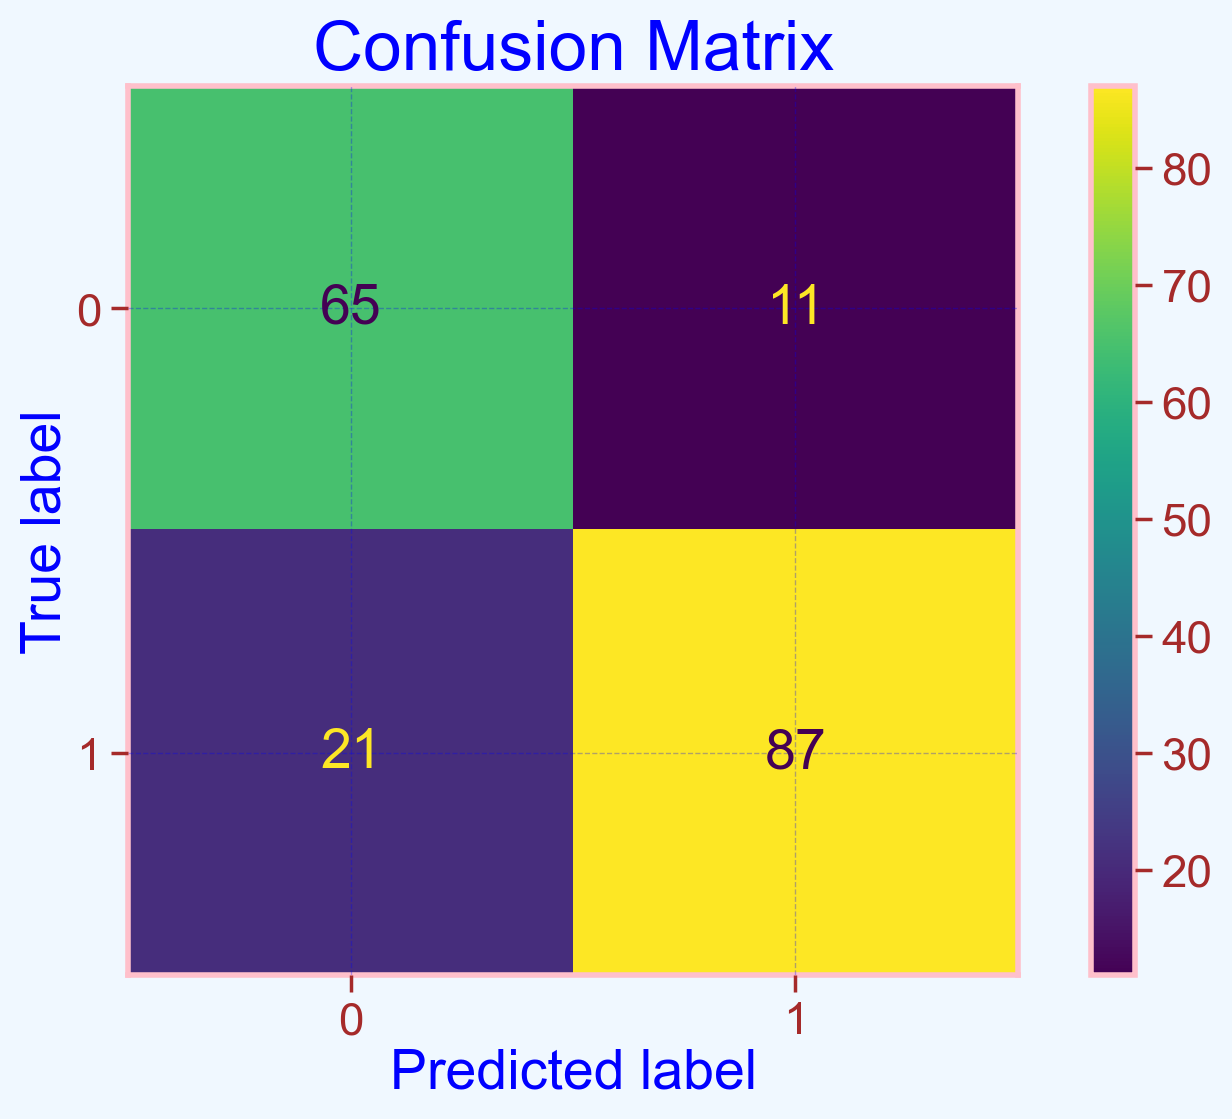

In [79]:
plot_confusion_matrix(gaussian,	X_test,	y_test);
plt.title('Confusion Matrix');

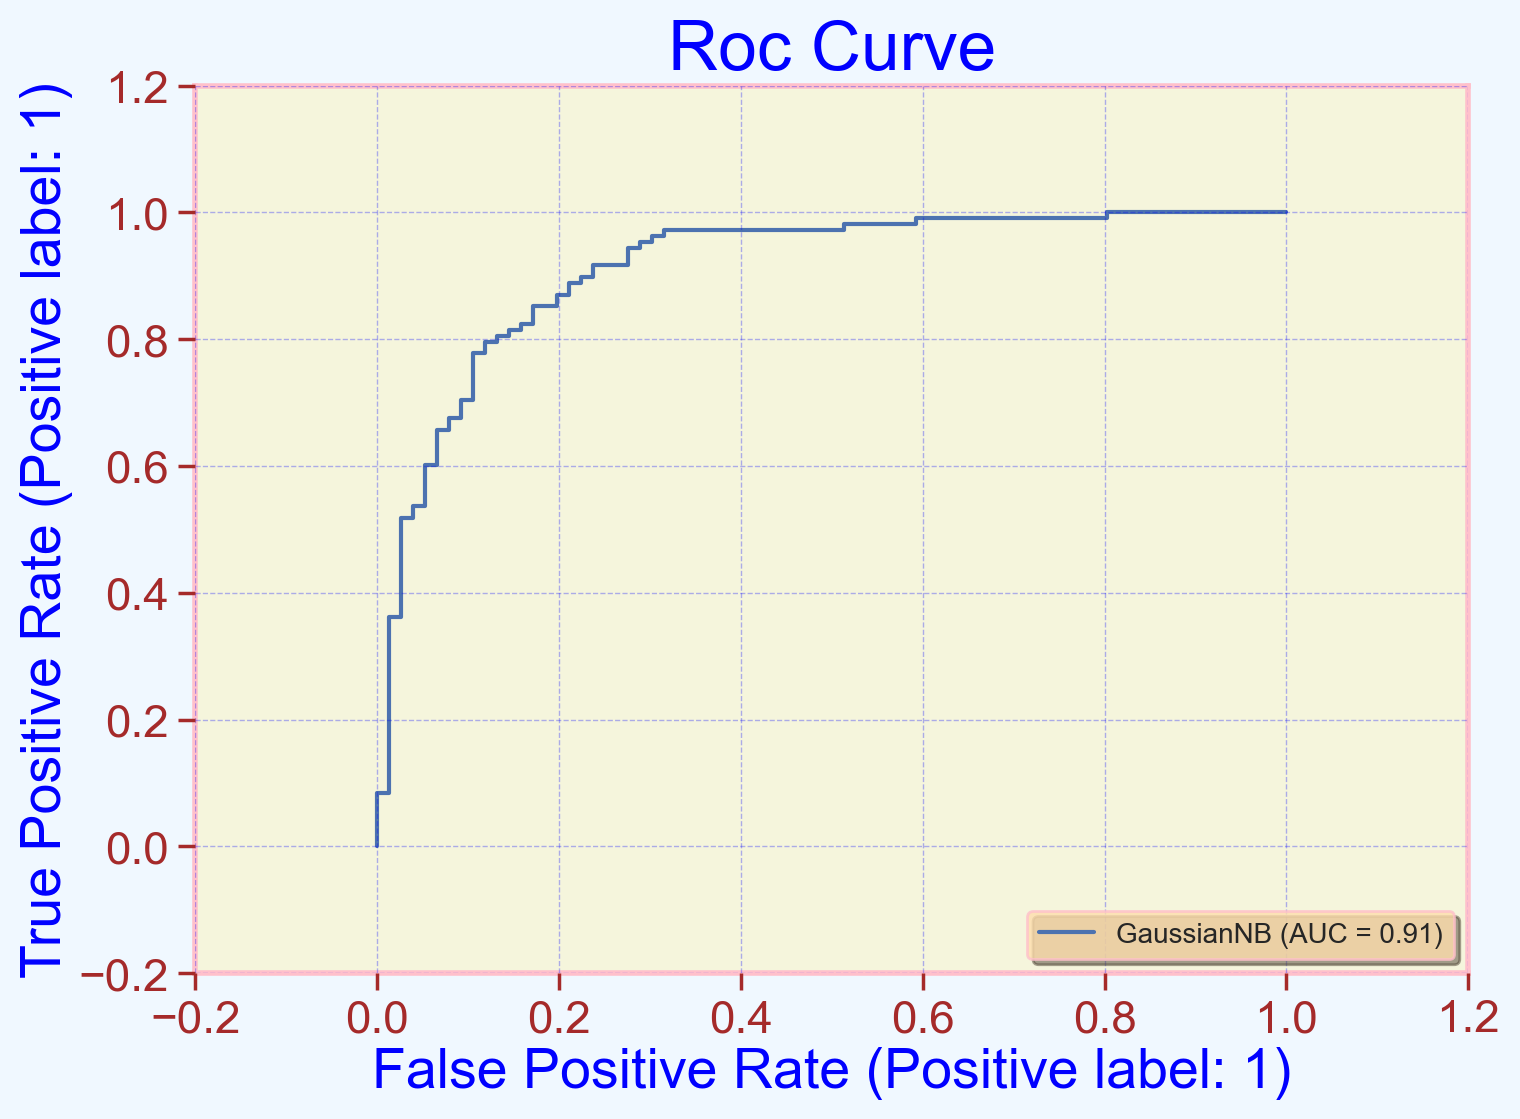

In [80]:
plot_roc_curve(gaussian, X_test, y_test);
plt.title('Roc Curve');


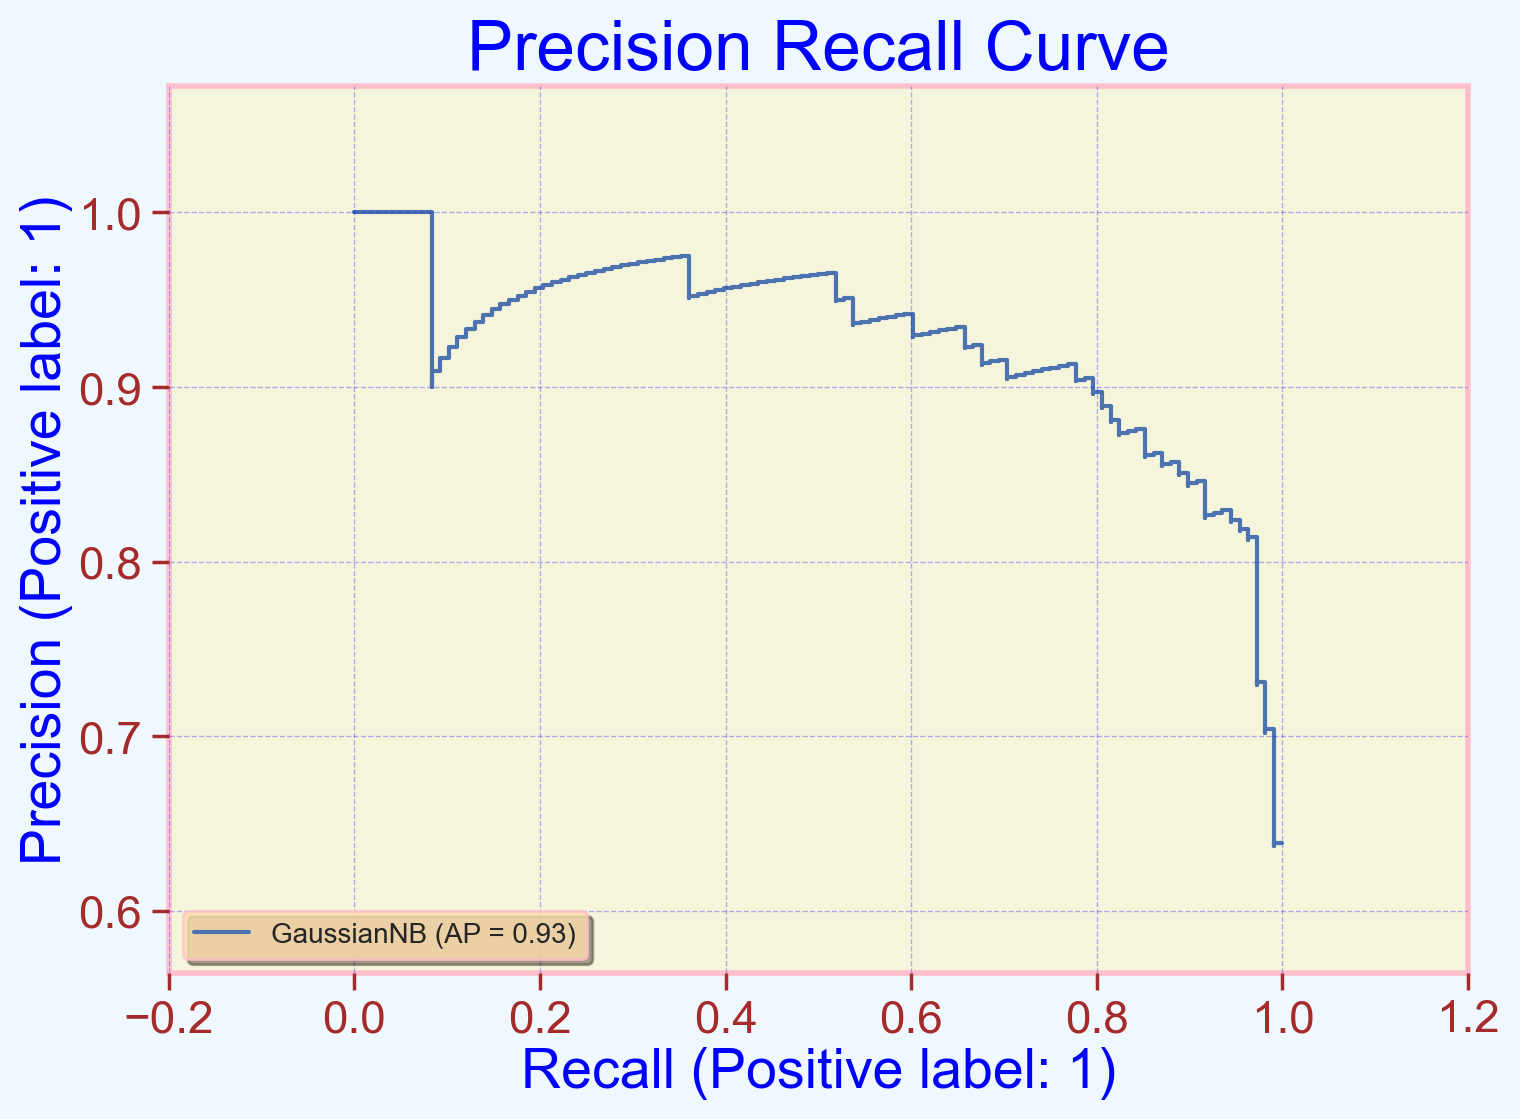

In [81]:
plot_precision_recall_curve(gaussian, X_test, y_test)
plt.title('Precision Recall Curve');

In [82]:
from sklearn.model_selection import cross_val_score
val_score = cross_val_score(estimator=gaussian, X = X_train, y = y_train, cv=10)
print("Model Accuracy Score: {:.2f} %".format(val_score.mean()*100))
print("Std. Dev: {:.2f} %".format(val_score.std()*100))

Model Accuracy Score: 83.08 %
Std. Dev: 3.39 %


<h2>DecisionTreeClassifier</h2>


In [83]:
# Decision	Tree
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)
y_pred_Decision = decision.predict(X_test)
decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_Decision, y_test) * 100, 2)
decision_f1 = round(f1_score(y_pred_Decision, y_test) * 100, 2)
print("Training Accuracy:",decision_train,"%")
print("Model Accuracy Score:",decision_accuracy,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_Decision))


Training Accuracy: 100.0 %
Model Accuracy Score: 76.63 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.74      0.67      0.70        76
           1       0.78      0.83      0.81       108

    accuracy                           0.77       184
   macro avg       0.76      0.75      0.76       184
weighted avg       0.76      0.77      0.76       184



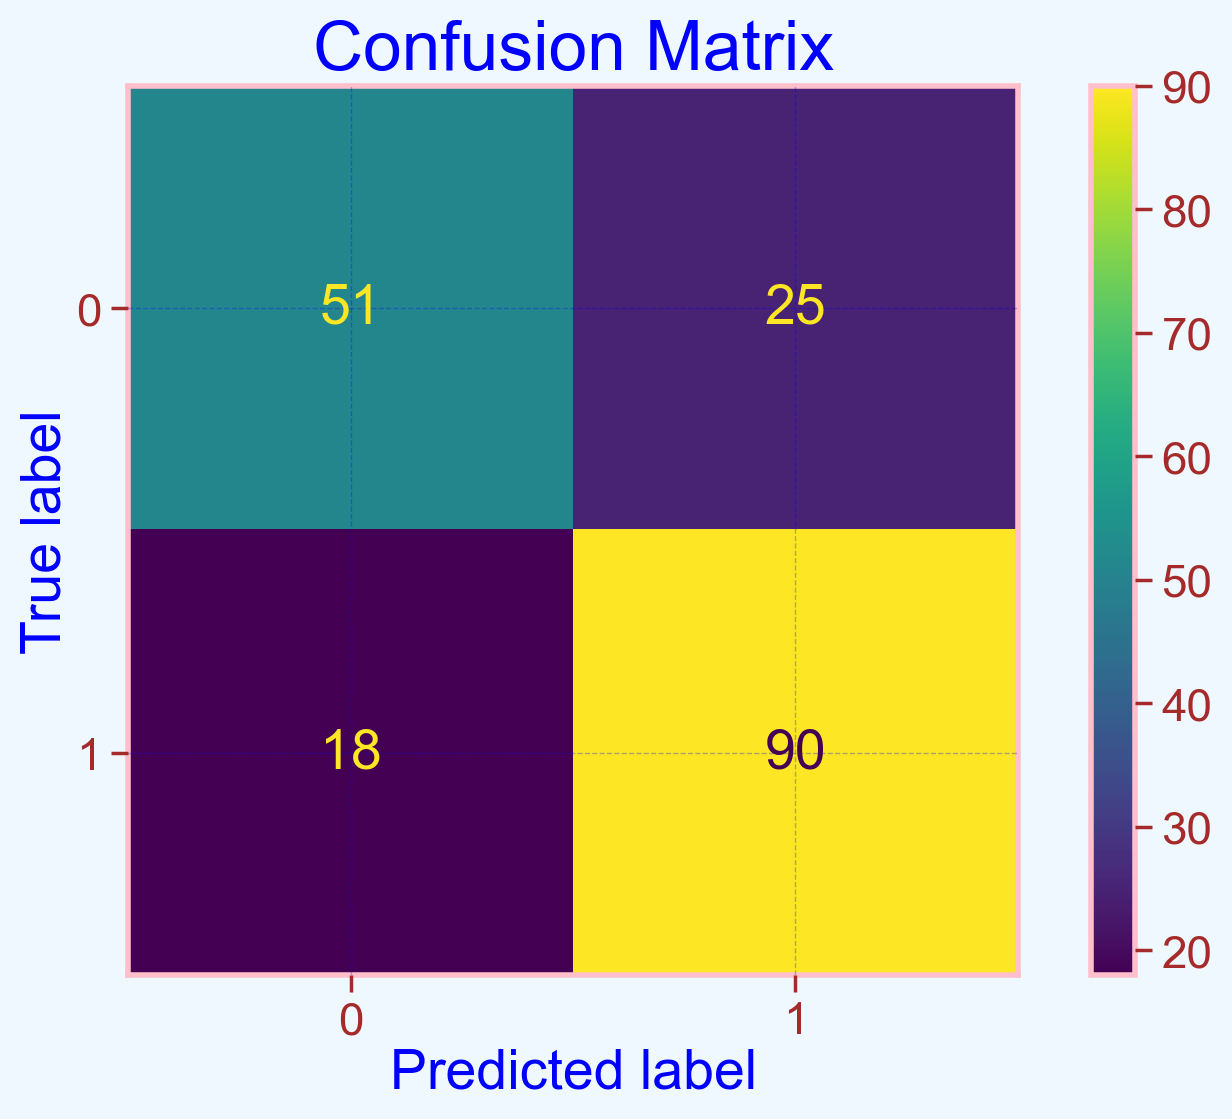

In [84]:
plot_confusion_matrix(decision, X_test, y_test);
plt.title('Confusion Matrix');

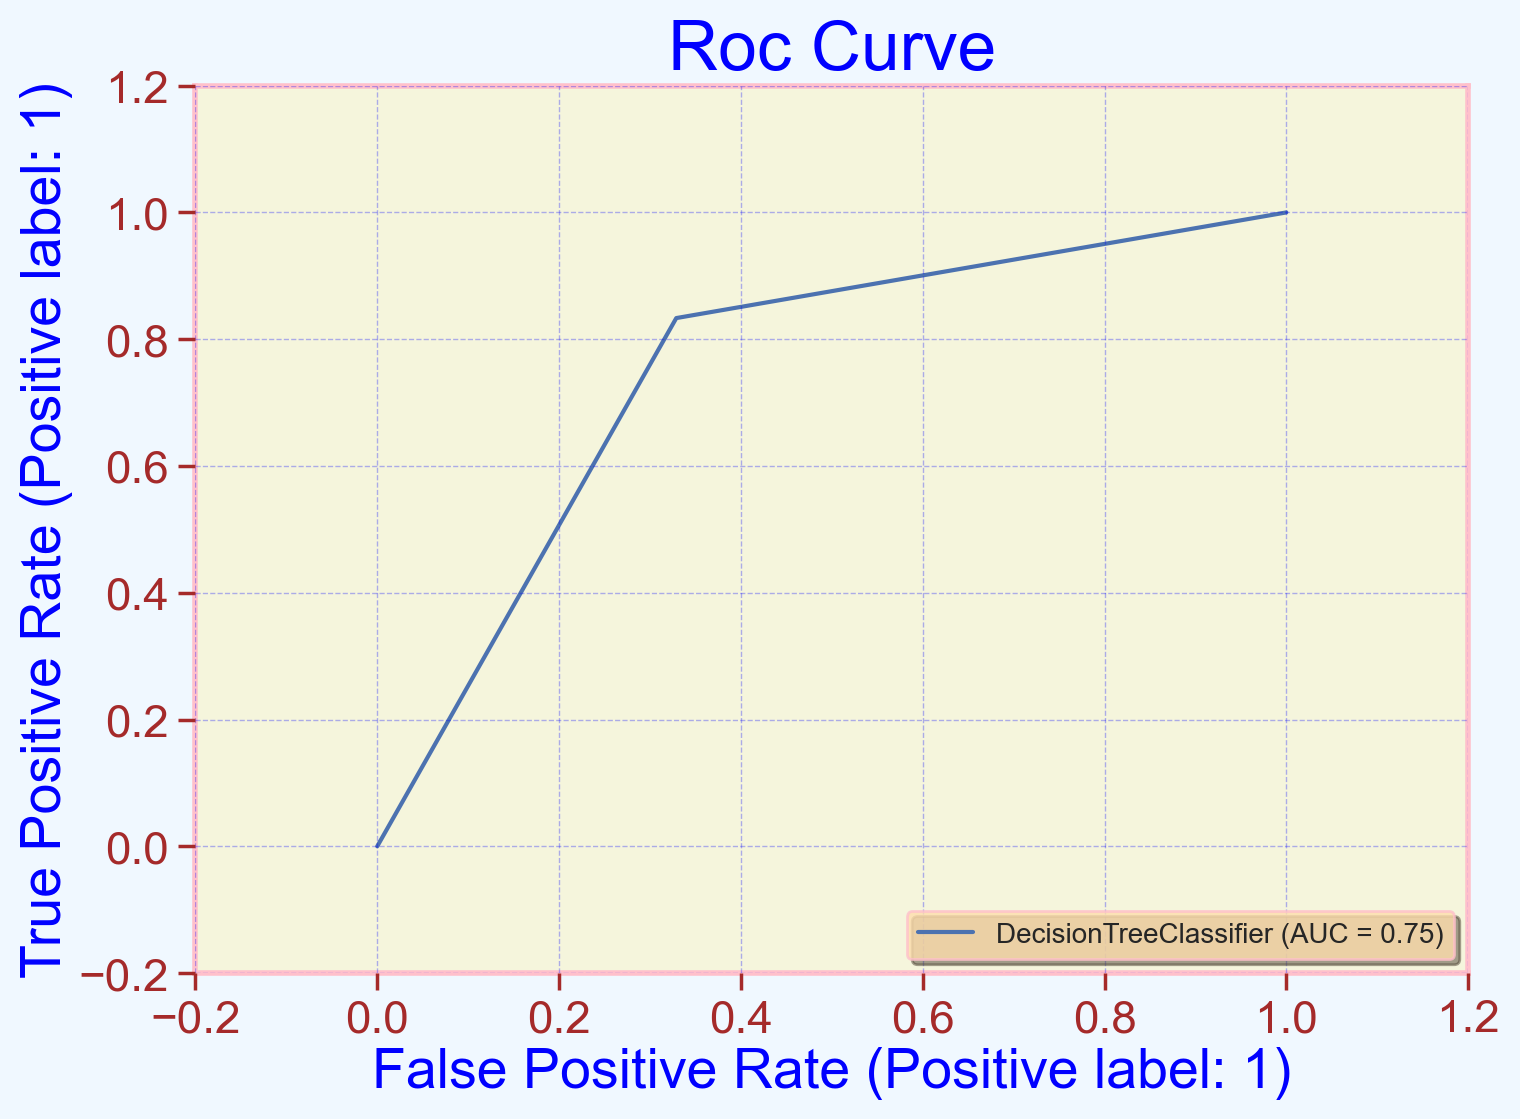

In [85]:
plot_roc_curve(decision, X_test, y_test);
plt.title('Roc Curve');


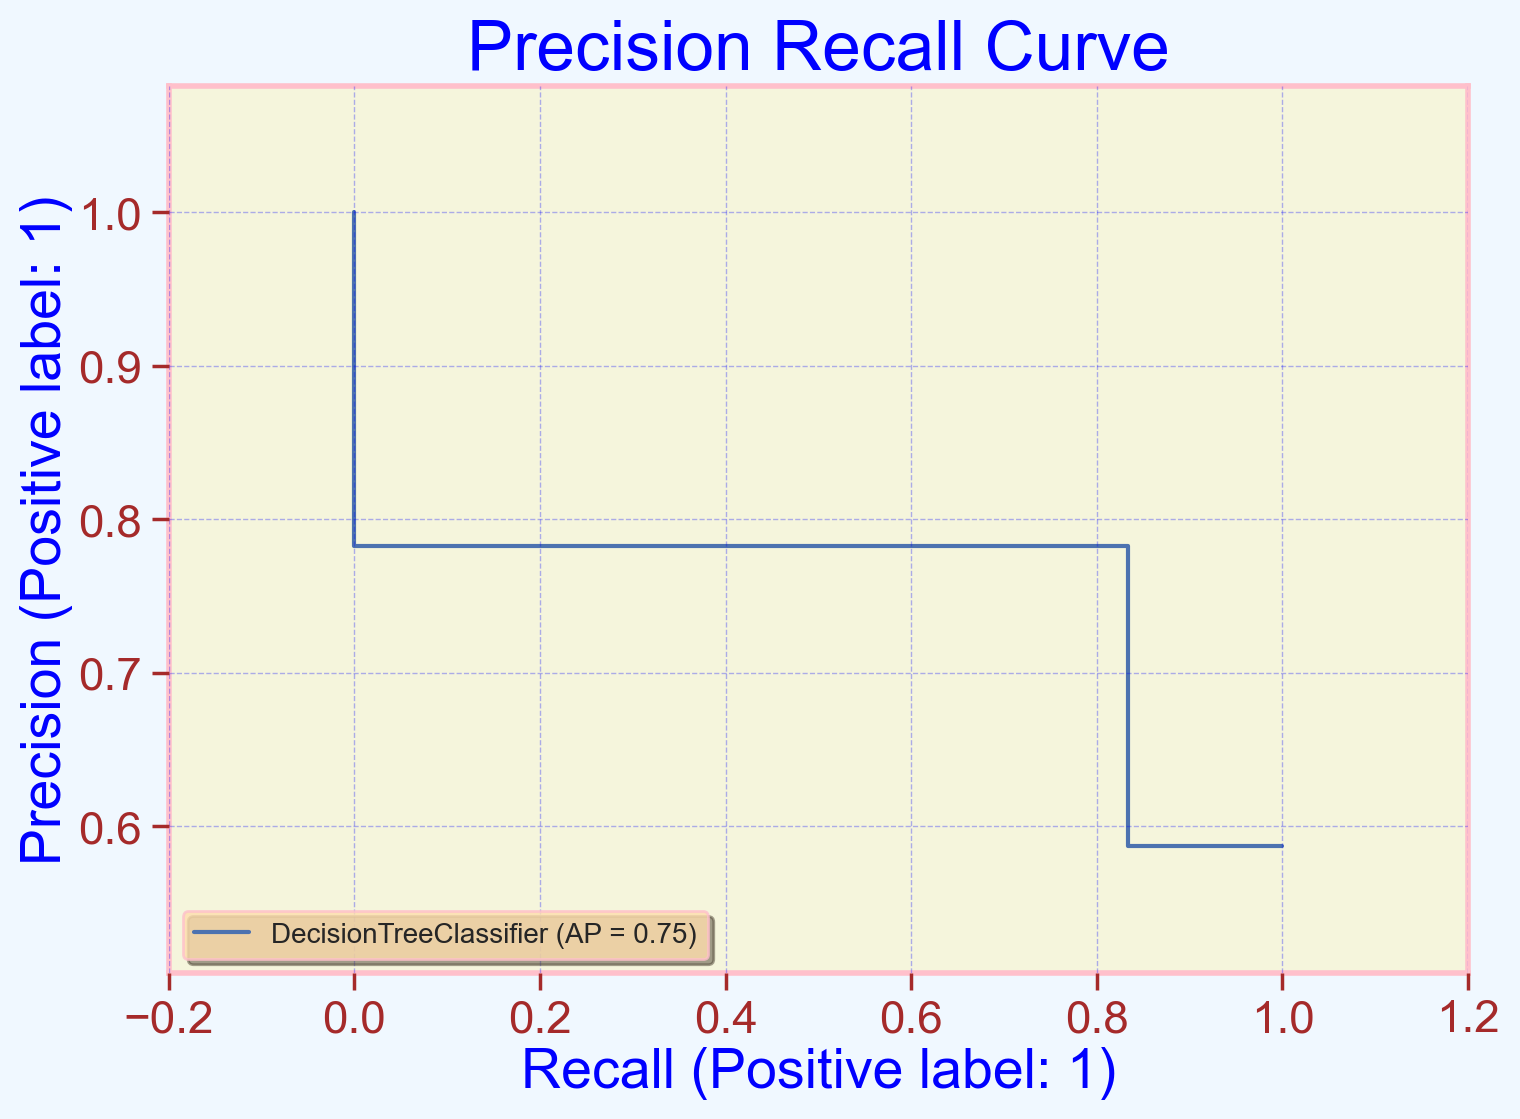

In [86]:
plot_precision_recall_curve(decision, X_test, y_test)
plt.title('Precision Recall Curve');

In [87]:
from sklearn.model_selection import cross_val_score
val_score = cross_val_score(estimator=decision, X = X_train, y=y_train, cv=10)
print("Model Accuracy Score: {:.2f} %".format(val_score.mean()*100))
print("Std. Dev: {:.2f} %".format(val_score.std()*100))

Model Accuracy Score: 80.07 %
Std. Dev: 4.59 %


<h2>RandomForestClassifier</h2>


In [88]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_random = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_random, y_test) * 100, 2)
random_forest_f1 = round(f1_score(y_pred_random, y_test) * 100, 2)
print("Training Accuracy:",random_forest_train,"%")
print("Model Accuracy Score:",random_forest_accuracy,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_random))

Training Accuracy: 100.0 %
Model Accuracy Score: 86.41 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.84      0.83      0.83        76
           1       0.88      0.89      0.88       108

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



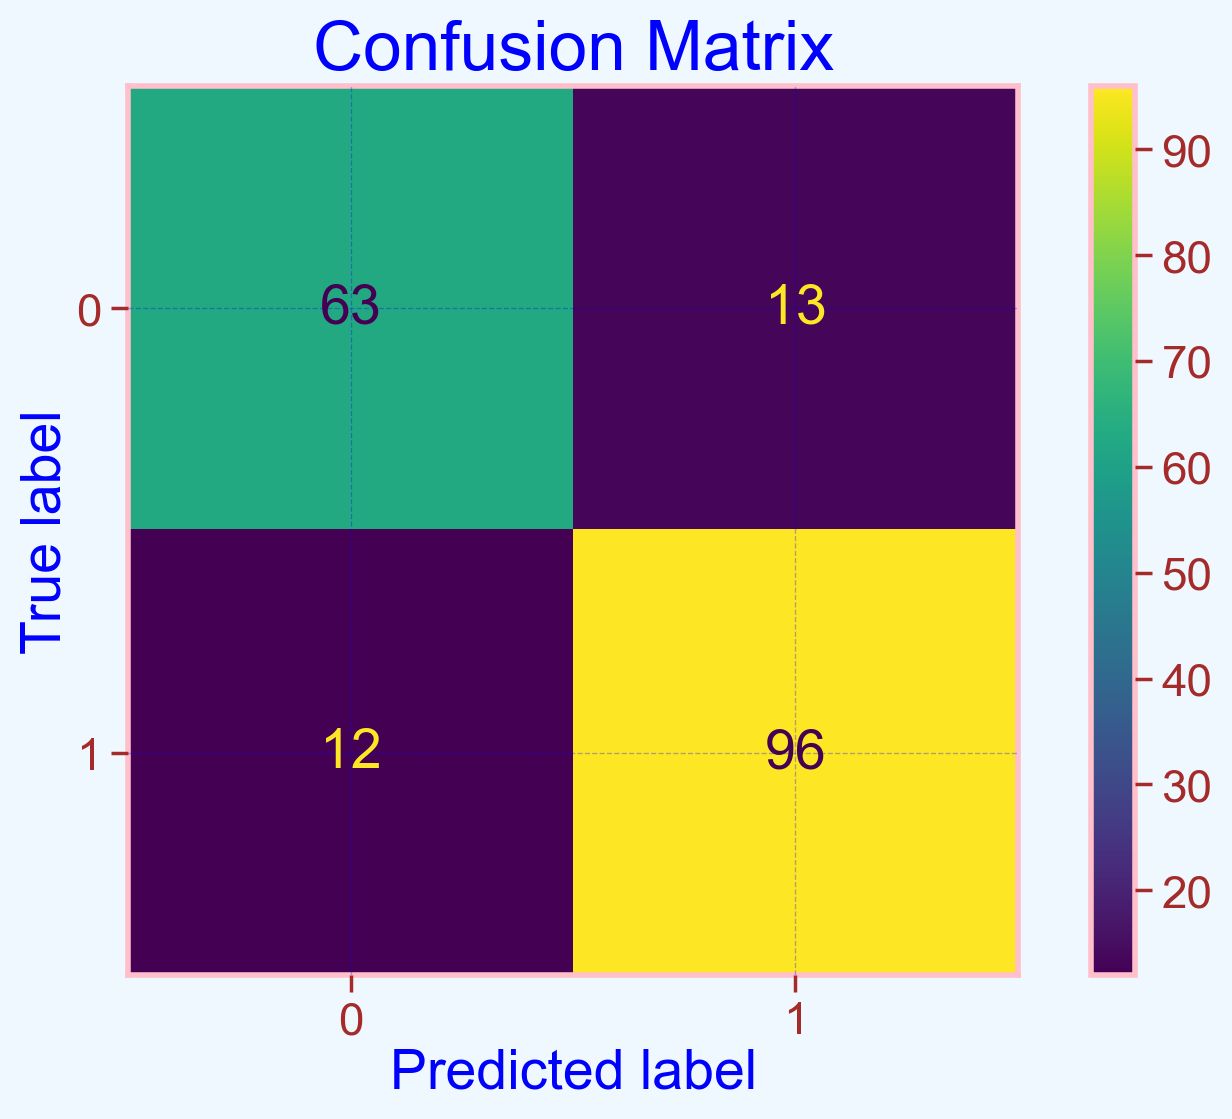

In [89]:
plot_confusion_matrix(random_forest, X_test, y_test);
plt.title('Confusion Matrix');

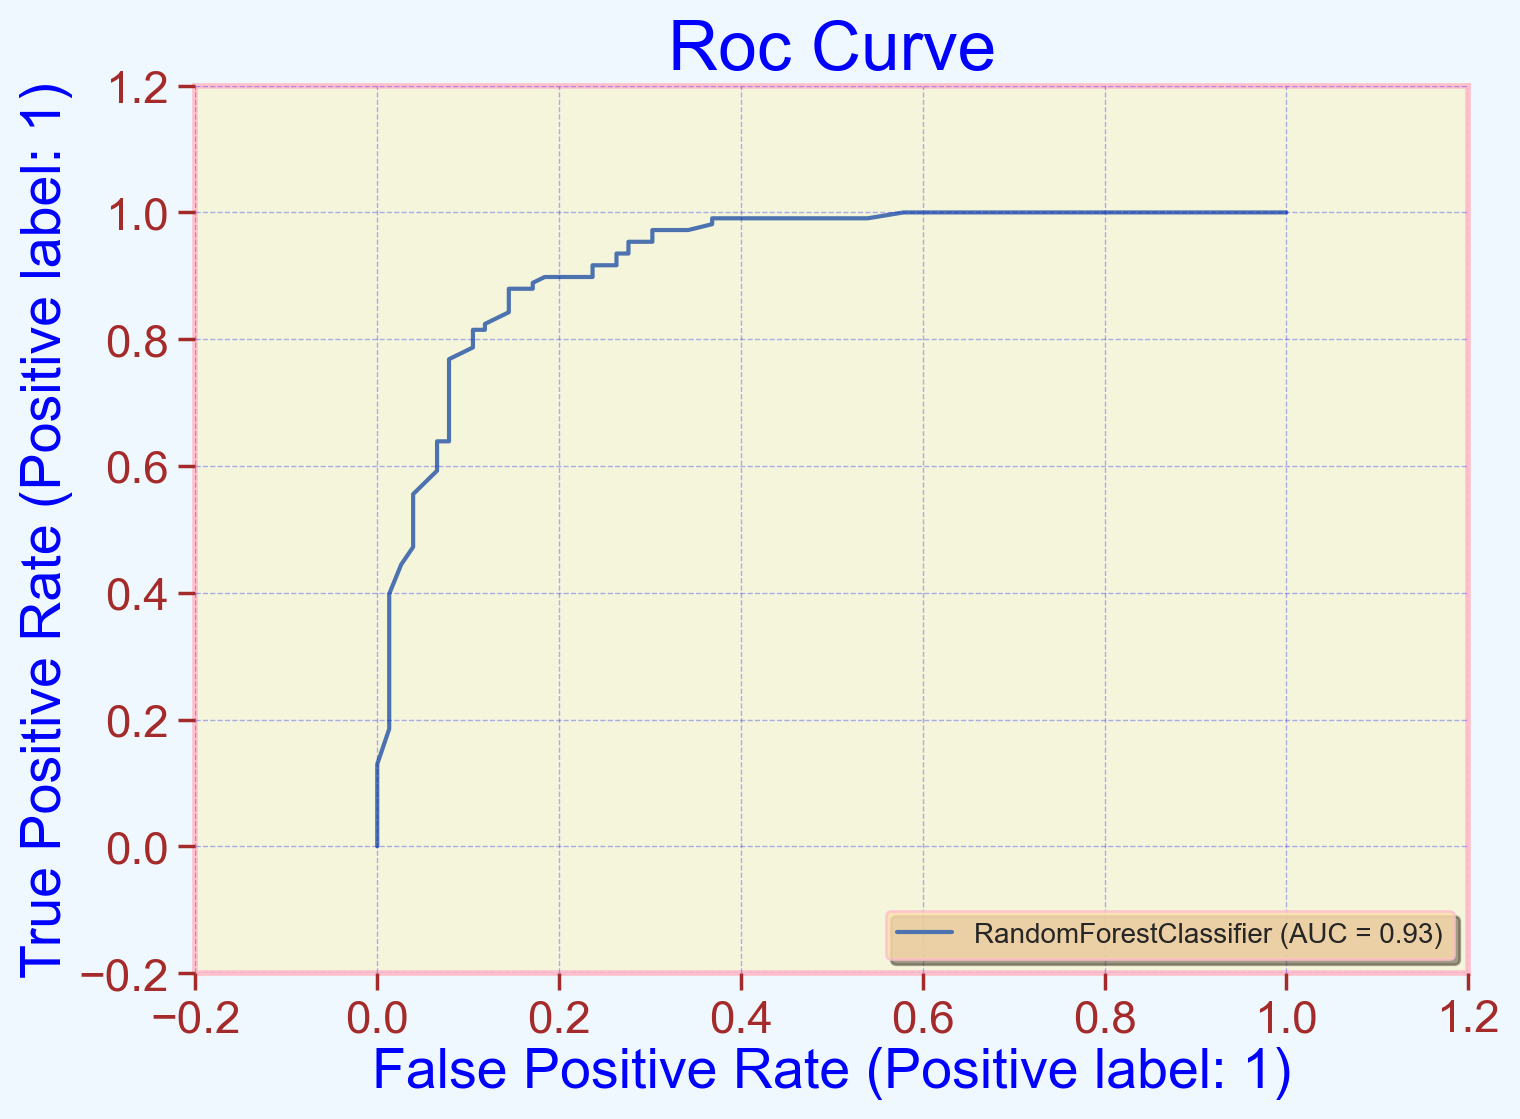

In [90]:
plot_roc_curve(random_forest, X_test, y_test);
plt.title('Roc Curve');


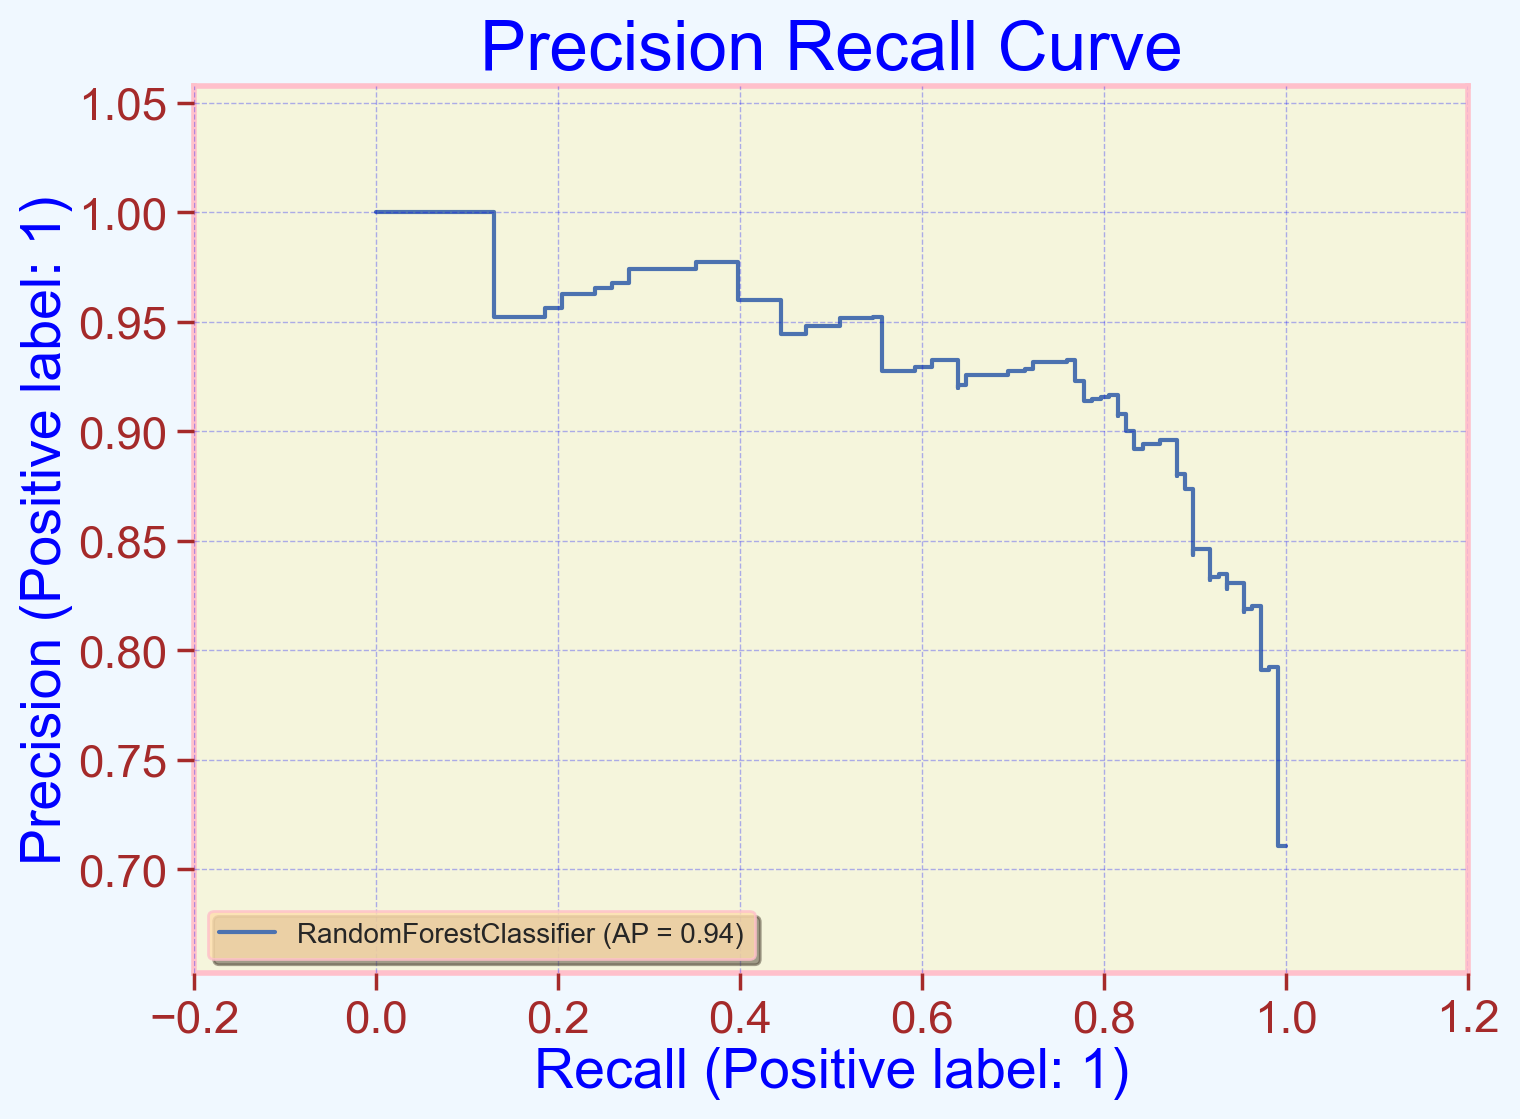

In [91]:
plot_precision_recall_curve(random_forest, X_test, y_test)
plt.title('Precision Recall Curve');

In [92]:
from sklearn.model_selection import cross_val_score
val_score = cross_val_score(estimator=random_forest, X = X_train, y=y_train, cv=10)
print("Model Accuracy Score: {:.2f} %".format(val_score.mean()*100))
print("Std. Dev: {:.2f} %".format(val_score.std()*100))

Model Accuracy Score: 85.38 %
Std. Dev: 4.01 %


<h2> Comparing Models
</h2>

In [93]:
models = pd.DataFrame({
    'Model': [
        'Logistic Regression', 'Support Vector Machines', 'KNeighborsClassifier', 
        'GaussianNB', 'Decision Tree','Random Forest'
    ],
    'Training Accuracy': [
        log_train, svc_train, knn_train, decision_train, 
        gaussian_accuracy, random_forest_accuracy,
    ],
    'Model f1 Score': [
        log_f1, svc_f1, knn_f1, gaussian_f1, decision_f1, random_forest_f1,
        
    ],
    'Model Accuracy Score': [
        log_accuracy, svc_accuracy, knn_accuracy, gaussian_accuracy, 
        decision_accuracy, random_forest_accuracy
    ]   
})

In [94]:
 #Accuracy Comparison Table 
models.sort_values(
    by='Model Accuracy Score', ascending=False).style.background_gradient(
        cmap='cool').hide_index().set_properties(**{
        'font-family': 'Lucida Calligraphy',
        'color': 'LigntGreen',
        'font-size': '15px'
        })

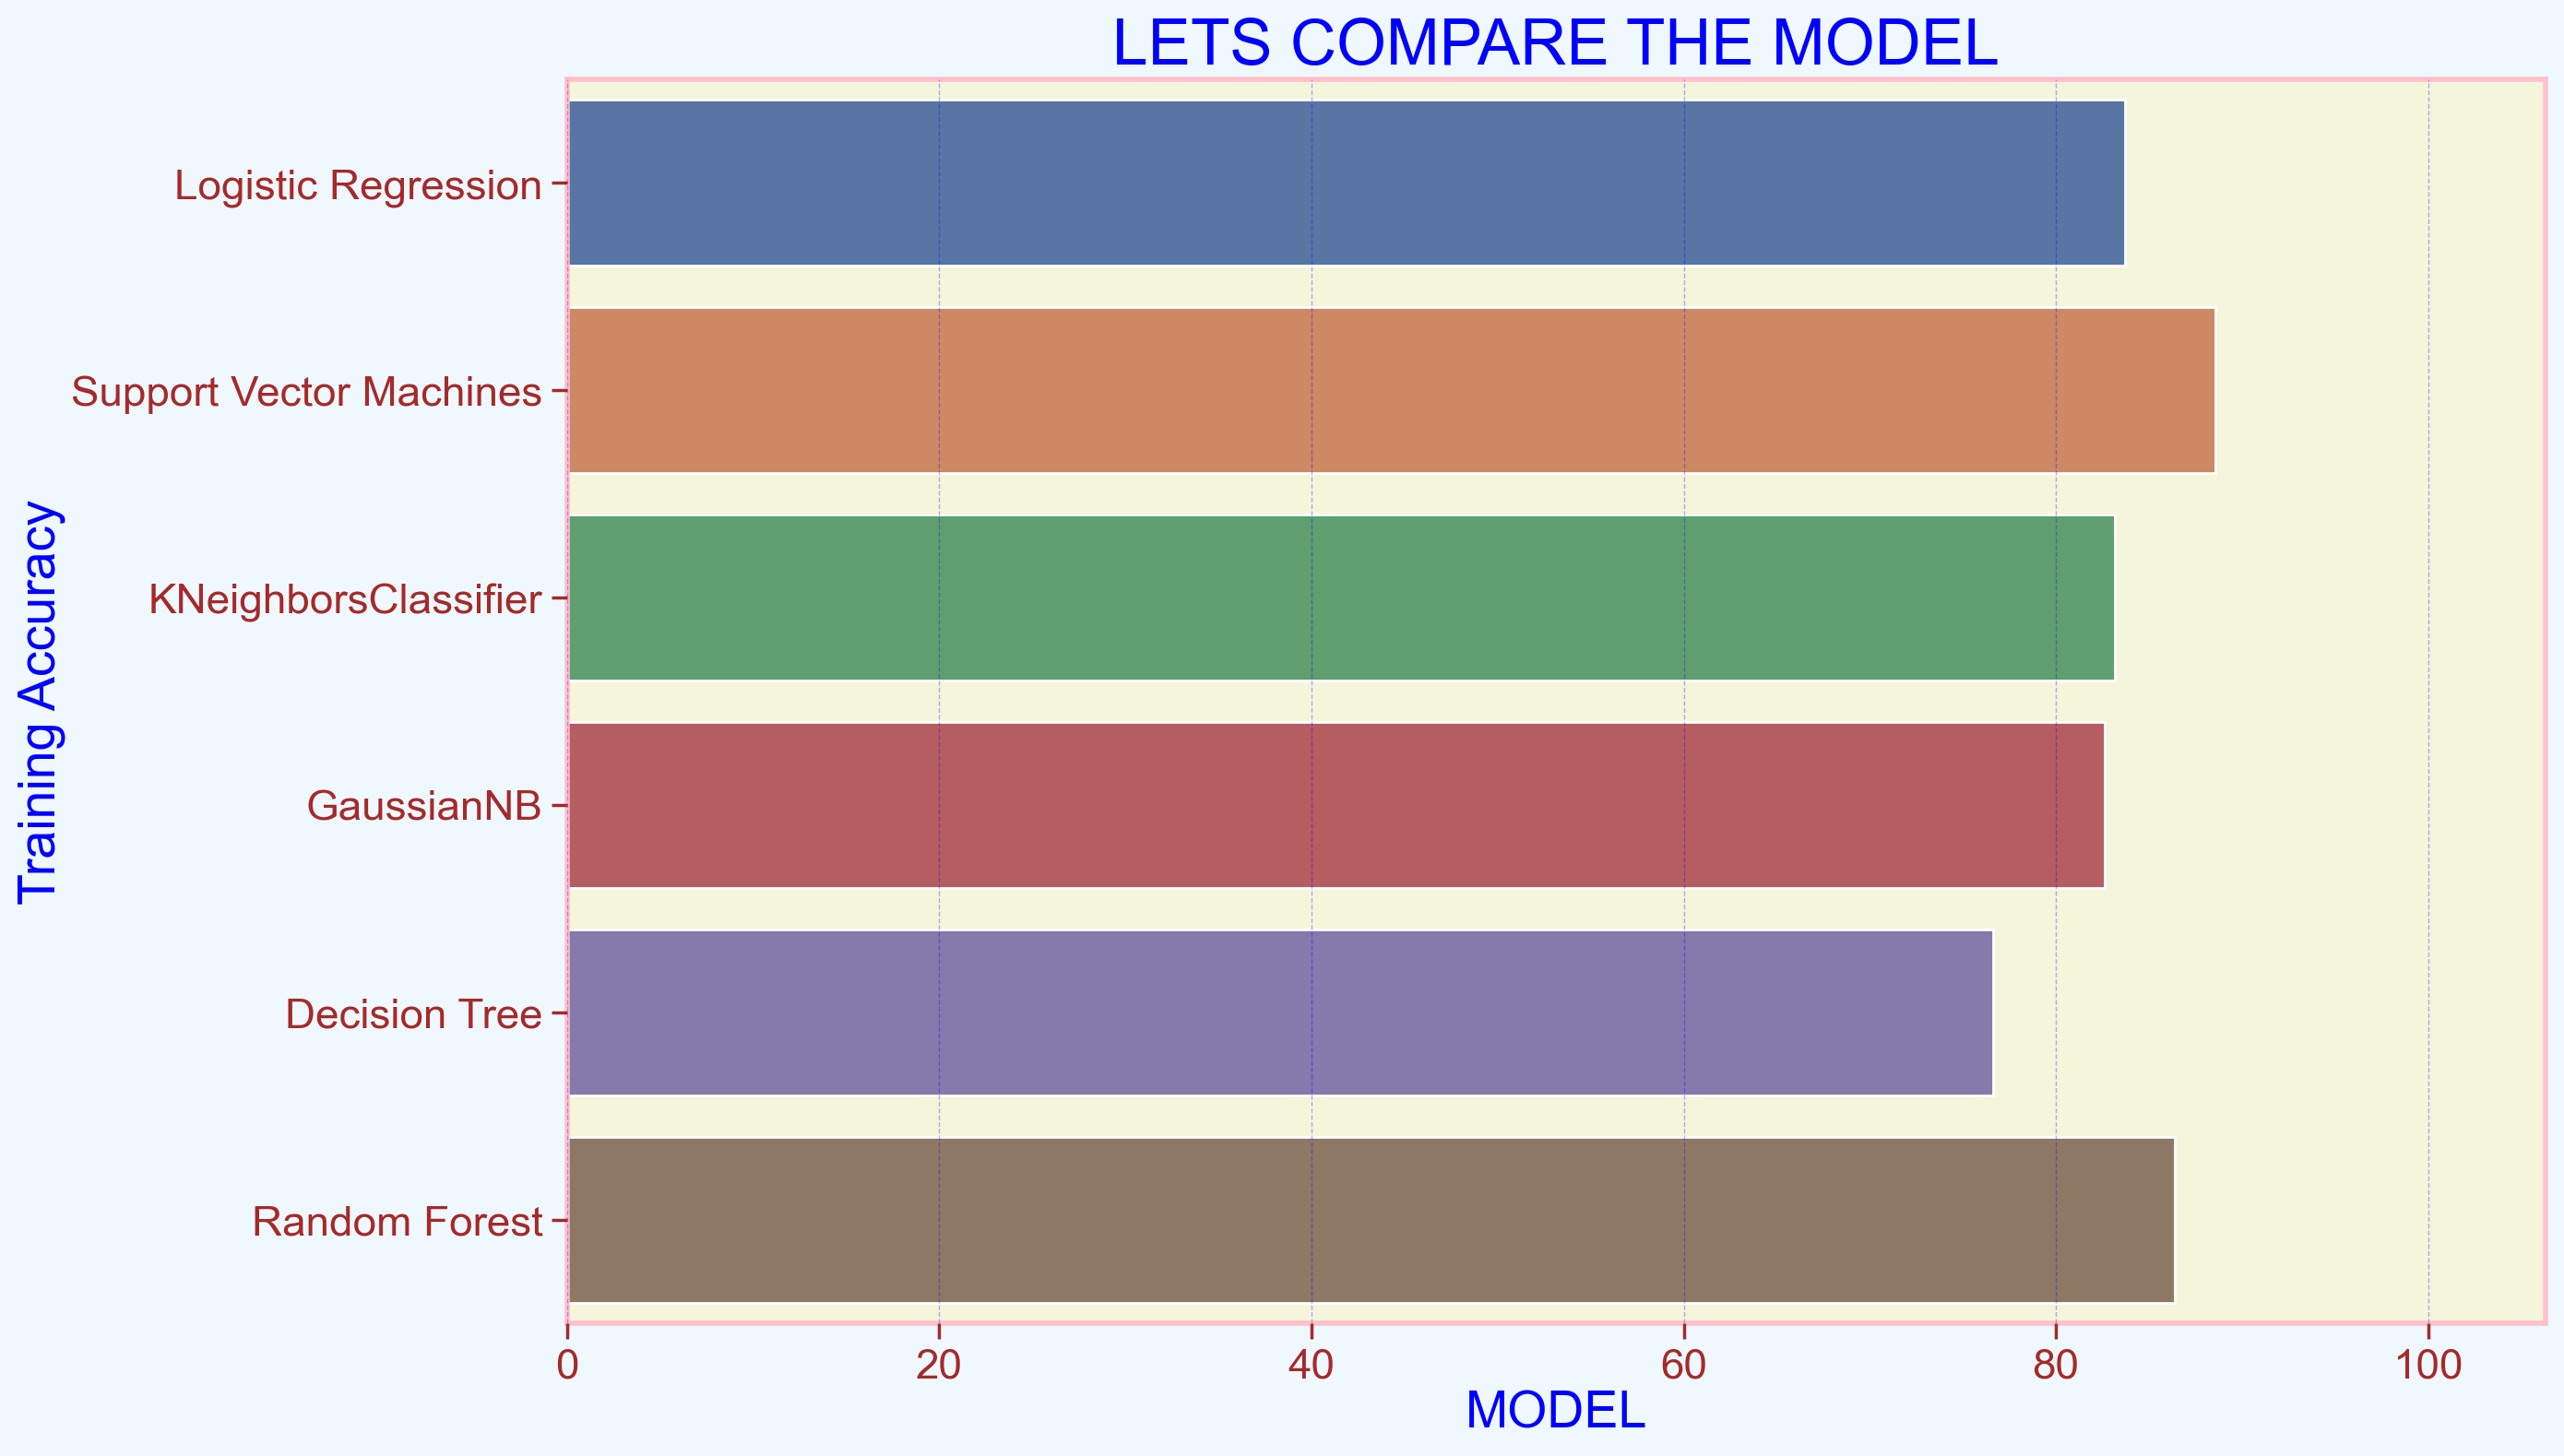

In [95]:
plt.rcParams['figure.figsize'] = (14,8)
plt.rcParams['font.size'] = 10
plt.rcParams['axes.xmargin'] = .2
plt.rcParams["axes.ymargin"] = .2
import seaborn as sns
sns.barplot(y= 'Model', x= 'Model Accuracy Score', data= models)
plt.title('LETS COMPARE THE MODEL')
plt.xlabel('MODEL')
plt.ylabel('Training Accuracy');


In [96]:
prediction1 = random_forest.predict(X_test)
print(prediction1)

[1 1 1 1 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 1 0 1
 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1 0 0
 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0
 0 0 1 1 0 0 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 1 0 0
 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0]


In [97]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction1})
cross_checking.sample(15).style.background_gradient(
                cmap='coolwarm').set_properties(**{
                'font-family': 'Lucida Calligraphy',
                'color': 'LigntGreen',
                'font-size': '15px'
                })